<a href="https://colab.research.google.com/github/AwkwaBear/EE628/blob/main/(Reward_Tweak)_Folded_Cascode_LDO_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Design and Optimization of Analog LDO Using sg13g2 PDK with Relational Graph Neural Network and Reinforcement Learning


|Name|
|:--:|
|Vikas Shukla |
|Zion McDowell|
|Jie Zhao|
|Anthony Gasbarro|


# Install Dependencies and Setup Environment
***You can collapse this section if you are rerunning in an existing instance***


- sg13g2 [Process Development Kit]
- Ngspice [Circuit Simulation Tool]
- Conda [Python Development Virtual Environment]
- Pytorch [Machine Learning Framework]
- PyG [Graph Neural Network Library]
- Tabulate [Data Table Export Interface Library]

Note: that after the installation of these packages, **you may need to restart the runtime to use these newly installed packages**.

In [ ]:
import os

# install conda.
CONDA_PREFIX = os.environ.get('CONDA_PREFIX', None)
if not CONDA_PREFIX:
  !python -m pip install condacolab
  import condacolab
  condacolab.install()

✨🍰✨ Everything looks OK!


### Install Other Python Tools

In [ ]:
# Install Pytorch with cpu-only option.
!conda install pytorch==2.2.1 torchvision==0.17.1 torchaudio==2.2.1 cpuonly -c pytorch

# Install Pytorch with CUDA GPU Option
# !conda install pytorch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1 pytorch-cuda=11.7 -c pytorch -c nvidia


# Check the version of Python (should be larger than 3.7) and Pytorch.
import torch
import sys
print("Python version")
print (sys.version)

!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"

# Install PyG to enable graph neural networks. We need to manually guide Colab to install the correct version of PyG based on which Pytorch version we have installed
# (https://colab.research.google.com/drive/17VFsRZeZa7rgtrQ39-RMiYIE0ePrSlgN?authuser=1#scrollTo=rFwf_0DrvXLv). In this case it is 1.13.1 with cpu-only option.
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-2.2.1+cpu.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-2.2.1+cpu.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-2.2.1+cpu.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-2.2.1+cpu.html
!pip install torch-geometric

# Installing torch versions for GPU Use.
# !pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.13.1+11.7.html
# !pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.13.1+11.7.html
# !pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.13.1+11.7.html
# !pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.13.1+11.7.html
# !pip install torch-geometric

# Check the version of PyG.
import torch_geometric
print(torch_geometric.__version__)

# Install Gymnasium for the RL environment.
!pip install gymnasium

# Check Gymnasium version.
import gymnasium as gym
print(gym.__version__)

# Install tabulate for showing simulation results nicely during the runtime later.
!pip install tabulate

# Similarly, check tabulate version.
import tabulate
print(tabulate.__version__)

Channels:
 - pytorch
 - conda-forge
Platform: linux-64
Solving environment: | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Python version
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.2.1
None
Looking in links: https://pytorch-geometric.com/whl/torch-2.2.1+cpu.html
Looking in links: https://pytorch-geometric.com/whl/torch-2.2.1+cpu.html
Looking in links: https://pytorch-geometric.com/whl/torch-2.2.1+cpu.html
Looking in links: https://pytorch-geometric.com/whl/torch-2.2.1+cpu.html


/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


2.5.2
0.29.1
0.9.0


In [ ]:
# # Install Pytorch with cpu-only option.
# !conda install pytorch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1 cpuonly -c pytorch

# # Install Pytorch with CUDA GPU Option
# # !conda install pytorch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1 pytorch-cuda=11.7 -c pytorch -c nvidia


# # Check the version of Python (should be larger than 3.7) and Pytorch.
# import torch
# import sys
# print("Python version")
# print (sys.version)

# !python -c "import torch; print(torch.__version__)"
# !python -c "import torch; print(torch.version.cuda)"

# # Install PyG to enable graph neural networks. We need to manually guide Colab to install the correct version of PyG based on which Pytorch version we have installed
# # (https://colab.research.google.com/drive/17VFsRZeZa7rgtrQ39-RMiYIE0ePrSlgN?authuser=1#scrollTo=rFwf_0DrvXLv). In this case it is 1.13.1 with cpu-only option.
# !pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-2.0.0+cpu.html
# !pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.13.1+cpu.html
# !pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.13.1+cpu.html
# !pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.13.1+cpu.html
# !pip install torch-geometric

# # Installing torch versions for GPU Use.
# # !pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.13.1+11.7.html
# # !pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.13.1+11.7.html
# # !pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.13.1+11.7.html
# # !pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.13.1+11.7.html
# # !pip install torch-geometric

# # Check the version of PyG.
# import torch_geometric
# print(torch_geometric.__version__)

# # Install Gymnasium for the RL environment.
# !pip install gymnasium

# # Check Gymnasium version.
# import gymnasium as gym
# print(gym.__version__)

# # Install tabulate for showing simulation results nicely during the runtime later.
# !pip install tabulate

# # Similarly, check tabulate version.
# import tabulate
# print(tabulate.__version__)

### Install IHP Open PDK

In [ ]:
# clone pdk
!git clone https://github.com/IHP-GmbH/IHP-Open-PDK.git

fatal: destination path 'IHP-Open-PDK' already exists and is not an empty directory.


### Install OpenVaf (Verilog-A Compiler)

In [ ]:
# install openvaf and compile models
!wget https://openva.fra1.cdn.digitaloceanspaces.com/openvaf_23_5_0_linux_amd64.tar.gz
!tar -xf openvaf_23_5_0_linux_amd64.tar.gz
!./openvaf ./IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/openvaf/psp103_nqs.va
!cp ./IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/openvaf/psp103_nqs.osdi .


--2024-04-13 08:36:28--  https://openva.fra1.cdn.digitaloceanspaces.com/openvaf_23_5_0_linux_amd64.tar.gz
Resolving openva.fra1.cdn.digitaloceanspaces.com (openva.fra1.cdn.digitaloceanspaces.com)... 104.18.42.227, 172.64.145.29, 2606:4700:4400::6812:2ae3, ...
Connecting to openva.fra1.cdn.digitaloceanspaces.com (openva.fra1.cdn.digitaloceanspaces.com)|104.18.42.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from openva.fra1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 54596847 (52M) [application/gzip]
Saving to: ‘openvaf_23_5_0_linux_amd64.tar.gz.3’

openvaf_23_5_0_linu 100%[===================>]  52.07M  64.0MB/s    in 0.8s    

2024-04-13 08:36:29 (64.0 MB/s) - ‘openvaf_23_5_0_linux_amd64.tar.gz.3’ saved [54596847/54596847]

Finished building psp103_nqs.va in 6.05s


### Install Ngspice


In [ ]:
# clone ngspice
!apt install bison flex libx11-dev libx11-6 libxaw7-dev libreadline6-dev autoconf libtool automake -y
!git clone https://git.code.sf.net/p/ngspice/ngspice

# compile ngspice
!cd ngspice && ./compile_linux.sh

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libreadline-dev' instead of 'libreadline6-dev'
autoconf is already the newest version (2.71-2).
automake is already the newest version (1:1.16.5-1.3).
bison is already the newest version (2:3.8.2+dfsg-1build1).
flex is already the newest version (2.6.4-8build2).
libreadline-dev is already the newest version (8.1.2-1).
libtool is already the newest version (2.4.6-15build2).
libxaw7-dev is already the newest version (2:1.0.14-1).
libx11-6 is already the newest version (2:1.7.5-1ubuntu0.3).
libx11-dev is already the newest version (2:1.7.5-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
fatal: destination path 'ngspice' already exists and is not an empty directory.
Running libtoolize
libtoolize: putting auxiliary files in '.'.
libtoolize: copying file './ltmain.sh'
libtoolize: putting macros in AC_CONFIG_MACRO_DIRS, 'm4'.
libtoolize: copying file '

### Setting up directories for files

In [ ]:
!mkdir ldo
!mkdir ldo/simulations
!mkdir ldo/saved_weights
!mkdir ldo/saved_memories

mkdir: cannot create directory ‘ldo’: File exists
mkdir: cannot create directory ‘ldo/simulations’: File exists
mkdir: cannot create directory ‘ldo/saved_weights’: File exists
mkdir: cannot create directory ‘ldo/saved_memories’: File exists


# After Restarting Environment, Start From Here


## Setup Spice Initial Conditions

### Spiceinit configuration

Setting up Ngspice initialization for g13g2. Also do use 8 threads to speed up simulations.

In [ ]:
%%writefile /content/ldo/simulations/.spiceinit
* ngspice initialization for SG13G2
* assert BSIM compatibility mode with "nf" vs. "W"
set ngbehavior=hsa
* "nomodcheck" speeds up loading time
set ng_nomodcheck
set num_threads=8
set enable_noisy_r

Overwriting /content/ldo/simulations/.spiceinit


### Write Netlist

In [ ]:
%%writefile /content/ldo/simulations/ldo_tb.spice
** sch_path: content/ldo/xschem/ldo_tb.sch
**.subckt ldo_tb Vreg Vreg1
*.opin Vreg
*.opin Vreg1

.lib "/content/IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/models/cornerMOSlv.lib" mos_tt
.lib "/content/IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/models/cornerRES.lib" res_typ
.lib "/content/IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/models/cornerCAP.lib" cap_typ

****.include IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/models/cornerMOSlv.lib mos_tt
****.include IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/models/cornerRES.lib res_typ
****.include IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/models/cornerCAP.lib cap_typ

Vref Vref GND Vref
.save i(Vref)
Vb net1 GND Vb
.save i(Vb)
IL Vreg net2 dc IL PULSE(10u IL 0 10n 10n 50u 100u 0)
Vdd Vdd GND ac 1 dc Vdd
.save i(Vdd)


x1 Vdd Vreg Vref net1 GND Vreg ldo
**** LDO instantiation ==> INST.NAME = X1, MACRO NAME = ldo******

**REPLACED MODEL BELOW
**XCL Vreg GND sky130_fd_pr__cap_mim_m3_1 W=30 L=30 MF=M_CL m=M_CL
XCL Vreg GND cap_cmim cap_cmim W=60e-06 L=60e-06 MF=M_CL m=M_CL

Rdummy net2 GND 1 m=1
Vref1 Vref1 GND Vref
.save i(Vref1)
Vb1 net3 GND Vb
.save i(Vb1)
IL1 Vreg1 GND IL
Vdd1 Vdd1 GND Vdd
.save i(Vdd1)
x2 Vdd1 net4 Vref1 net3 GND Vreg1 ldo

**REPLACED MODEL BELOW
**XCL1 Vreg1 GND sky130_fd_pr__cap_mim_m3_1 W=30 L=30 MF=M_CL m=M_CL
XCL1 Vreg1 GND cap_cmim W=60e-06 L=60e-06 MF=M_CL m=M_CL

**cap_cmim W=30 L=30 MF=M_CL m=M_CL

Vprobe2 probe net4 dc 0
.save i(Vprobe2)
Vprobe1 probe Vreg1 dc 0 ac 1
.save i(Vprobe1)
Iprobe1 GND probe dc 0 ac 0

**** begin user architecture code

**ADDED WHOLE LIBRARY FOR MOS, RES, and CAP


* Not loading the entire design corner which takes too long
*.lib /usr/local/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice tt



* Instead just load tt corner which is faster
.param mc_mm_switch=0
.param mc_pr_switch=0

**Commentted out individual imports below
*.include /usr/local/share/pdk/sky130A/libs.tech/ngspice/corners/tt.spice
*.include /usr/local/share/pdk/sky130A/libs.tech/ngspice/r+c/res_typical__cap_typical.spice
*.include /usr/local/share/pdk/sky130A/libs.tech/ngspice/r+c/res_typical__cap_typical__lin.spice
*.include /usr/local/share/pdk/sky130A/libs.tech/ngspice/corners/tt/specialized_cells.spice

.control
* save all voltage and current
save all
.options savecurrents
set filetype=ascii
set units=degrees

********************Vikas Added control *********
pre_osdi /content/psp103_nqs.osdi

********************** From Boris File***********


**TODO REPLACE LIBRARIES AND MODELS BELOW
.include /content/ldo/simulations/ldo_tb_analysis.spice
**.include /content/sky130_ldo/simulations/ldo_tb_analysis.spice
.endc

**Replaced filename with tb_vars.spice which is written in next cell
.include /content/ldo/simulations/ldo_tb_vars.spice
**.include /content/sky130_ldo/simulations/ldo_tb_analysis.spice

**** end user architecture code
**.ends


* expanding   symbol:  ldo.sym # of pins=6
* sym_path: /fs1/eecg/tcc/lizongh2/sky130_ldo/xschem/ldo.sym
* sch_path: /fs1/eecg/tcc/lizongh2/sky130_ldo/xschem/ldo.sch
.subckt ldo Vdd Vfb Vref Vb Vss Vreg
*.iopin Vb
*.iopin Vss
*.opin Vreg
*.iopin Vref
*.ipin Vdd
*.iopin Vfb
x1 Vdd net1 Vfb Vref Vb Vss diff_pair

**REPLACED PMOS model below
**XM6 Vreg net1 Vdd Vdd sky130_fd_pr__pfet_g5v0d10v5 L=L_pass W=W_pass ng=1 ad='int((ng+1)/2) * W/ng * 0.29'
***** Vikas - Removed undefined params ng, ad, and as
XM6 Vreg net1 Vdd Vdd sg13_lv_pmos L=L_pass W=W_pass mfact=M_Pass
+ ng=1 ad='int((ng+1)/2) * W/ng * 0.29'
+ as='int((ng+2)/2) * W/ng * 0.29' pd='2*int((ng+1)/2) * (W/ng + 0.29)' ps='2*int((ng+2)/2) * (W/ng + 0.29)'
+ nrd='0.29 / W' nrs='0.29 / W' sa=0 sb=0 sd=0 mult=M_pass m=M_pass

**REPLACED CAPACITOR model below
XCfb net2 Vreg cap_cmim W=60e-06 L=60e-06 MF=M_Cfb m=M_Cfb
**XCfb net2 Vreg sky130_fd_pr__cap_mim_m3_1 W=10 L=10 MF=M_Cfb m=M_Cfb


**REPLACED RESISTOR model below ** Rsil Model**
XRfb net2 net1 rsil w=2.5e-6 l=0.25e-5 m=M_Rfb R=7.0 Imax=0.3e-6

**rhigh W=2.5e-6 m=M_Rfb R=1360.0 Imax=0.3e-6 L=3 mult=M_Rfb m=M_Rfb
**XRfb net2 net1 Vss sky130_fd_pr__res_high_po_0p35 L=3 mult=M_Rfb m=M_Rfb
.ends


* expanding   symbol:  diff_pair.sym # of pins=6
* sym_path: /fs1/eecg/tcc/lizongh2/sky130_ldo/xschem/diff_pair.sym
* sch_path: /fs1/eecg/tcc/lizongh2/sky130_ldo/xschem/diff_pair.sch

.subckt diff_pair Vdd vout vinp vinm Vb Vss
*.iopin Vdd
*.ipin vinm
*.ipin vinp
*.iopin Vb
*.opin vout
*.iopin Vss


**XM1 net1 vinp net2 Vss sky130_fd_pr__nget_g5v0d10v5 L=L_M1 W=W_M1 ng=1 ad='int((ng+1)/2) * W/ng * 0.29'

**REPLACED NMOS MODEL BELOW
XM1 net1 vinp net2 Vss sg13_lv_nmos L=L_M1 W=W_M1 ng=1 ad='int((ng+1)/2) * W/ng * 0.29'
+ as='int((ng+2)/2) * W/ng * 0.29' pd='2*int((ng+1)/2) * (W/ng + 0.29)' ps='2*int((ng+2)/2) * (W/ng + 0.29)'
+ nrd='0.29 / W' nrs='0.29 / W' sa=0 sb=0 sd=0 mult=1 m=1


**XM2 vout vinm net2 Vss sky130_fd_pr__nget_g5v0d10v5 L=L_M2 W=W_M2 ng=1 ad='int((ng+1)/2) * W/ng * 0.29'

**REPLACED NMOS MODEL BELOW
XM2 vout vinm net2 Vss sg13_lv_nmos L=L_M2 W=W_M2
+ ng=1 ad='int((ng+1)/2) * W/ng * 0.29'
+ as='int((ng+2)/2) * W/ng * 0.29' pd='2*int((ng+1)/2) * (W/ng + 0.29)' ps='2*int((ng+2)/2) * (W/ng + 0.29)'
+ nrd='0.29 / W' nrs='0.29 / W' sa=0 sb=0 sd=0 mult=1 m=1

*XM3 vout net1 Vdd Vdd sky130_fd_pr__pfet_g5v0d10v5 L=L_M3 W=W_M3 ng=1 ad='int((ng+1)/2) * W/ng * 0.29'

**REPLACED PMOS MODEL BELOW
XM3 vout net1 Vdd Vdd sg13_lv_pmos L=L_M3 W=W_M3
+ ng=1 ad='int((ng+1)/2) * W/ng * 0.29'
+ as='int((ng+2)/2) * W/ng * 0.29' pd='2*int((ng+1)/2) * (W/ng + 0.29)' ps='2*int((ng+2)/2) * (W/ng + 0.29)'
+ nrd='0.29 / W' nrs='0.29 / W' sa=0 sb=0 sd=0 mult=1 m=1

**XM4 net1 net1 Vdd Vdd sky130_fd_pr__pfet_g5v0d10v5 L=L_M4 W=W_M4 ng=1 ad='int((ng+1)/2) * W/ng * 0.29'

**REPLACED PMOS MODEL BELOW
XM4 net1 net1 Vdd Vdd sg13_lv_pmos L=L_M4 W=W_M4
+ ng=1 ad='int((ng+1)/2) * W/ng * 0.29'
+ as='int((ng+2)/2) * W/ng * 0.29' pd='2*int((ng+1)/2) * (W/ng + 0.29)' ps='2*int((ng+2)/2) * (W/ng + 0.29)'
+ nrd='0.29 / W' nrs='0.29 / W' sa=0 sb=0 sd=0 mult=1 m=1

**XM5 net2 Vb Vss Vss sky130_fd_pr__nget_g5v0d10v5 L=L_M5 W=W_M5 ng=1 ad='int((ng+1)/2) * W/ng * 0.29'

**REPLACED NMOS MODEL BELOW
XM5 net2 Vb Vss Vss sg13_lv_nmos L=L_M5 W=W_M5
+ ng=1 ad='int((ng+1)/2) * W/ng * 0.29'
+ as='int((ng+2)/2) * W/ng * 0.29' pd='2*int((ng+1)/2) * (W/ng + 0.29)' ps='2*int((ng+2)/2) * (W/ng + 0.29)'
+ nrd='0.29 / W' nrs='0.29 / W' sa=0 sb=0 sd=0 mult=1 m=1
.ends

.GLOBAL GND
.end


Overwriting /content/ldo/simulations/ldo_tb.spice


### Spice Params

Write the netlist parameters to `ldo_tb_vars.spice`. Noted that the numbers we provided here are final optimization results given by the DDPG. These numbers can be some randomly sampled values within the action range.

In [ ]:
%%writefile /content/ldo/simulations/ldo_tb_vars.spice
.param W_M1=6e-6 L_M1=0.52e-6
.param W_M2=W_M1 L_M2=L_M1
.param W_M3=8e-6 L_M3=0.52e-6
.param W_M4=W_M3 L_M4=L_M3
.param W_M5=5e-6 L_M5=0.5e-6
.param W_pass=1250e-6 L_pass=0.26e-6 M_pass=200
.param Vb=0.419
.param M_Rfb=1 M_Cfb=5
.param M_CL=10
.param Vdd=1.8
.param Vref=1.2
.param IL=10m

Overwriting /content/ldo/simulations/ldo_tb_vars.spice


### Spice Testbench Analysis

Write the testbench analysis to `ldo_tb_analysis.spice`. Noticed that we commented out line regulation simulations to save simulation time. We did not embed any line regulation specifications in our reward function yet, but you can run the simulations afterward with line regulation test to see how it performs.

In [ ]:
%%writefile /content/ldo/simulations/ldo_tb_analysis.spice
* high precision simulation
*.OPTIONS maxord=1
.OPTIONS itl1=200
.OPTIONS itl2=200
.OPTIONS itl4=200


* Loop stability
* http://education.ingenazure.com/ac-stability-analysis-ngspice/
alter IL1 dc=10u
let runs=2
let run=0

alter @Vprobe1[acmag]=1
alter @Iprobe1[acmag]=0

dowhile run<runs
set run=$&run
set temp=27

ac dec 10 1 10G

alter @Vprobe1[acmag]=0
alter @Iprobe1[acmag]=1

let run=run+1
end

let ip11 = ac1.i(Vprobe1)
let ip12 = ac1.i(Vprobe2)
let ip21 = ac2.i(Vprobe1)
let ip22 = ac2.i(Vprobe2)
let vprb1 = ac1.v(probe)
let vprb2 = ac2.v(probe)

*** Middlebrook
let mb = 1/(vprb1+ip22)-1
*** Tian that is preferred
let av = 1/(1/(2*(ip11*vprb2-vprb1*ip21)+vprb1+ip21)-1)

plot vdb(mb) vp(mb)
plot vdb(av) vp(av)

wrdata /content/ldo/simulations/ldo_tb_loop_gain_minload mag(av) vp(av)

* at max load
reset all
alter IL1 dc=10m
let runs=2
let run=0

alter @Vprobe1[acmag]=1
alter @Iprobe1[acmag]=0

dowhile run<runs
set run=$&run
set temp=27

ac dec 10 1 10G

alter @Vprobe1[acmag]=0
alter @Iprobe1[acmag]=1

let run=run+1
end

let ip11 = ac3.i(Vprobe1)
let ip12 = ac3.i(Vprobe2)
let ip21 = ac4.i(Vprobe1)
let ip22 = ac4.i(Vprobe2)
let vprb1 = ac3.v(probe)
let vprb2 = ac4.v(probe)

*** Middlebrook
let mb = 1/(vprb1+ip22)-1
*** Tian that is preferred
let av = 1/(1/(2*(ip11*vprb2-vprb1*ip21)+vprb1+ip21)-1)

plot vdb(mb) vp(mb)
plot vdb(av) vp(av)

wrdata /content/ldo/simulations/ldo_tb_loop_gain_maxload mag(av) vp(av)

* DC sweep
dc Vdd 1.2 2.2 0.01
plot v(Vdd) v(Vreg)
wrdata /content/ldo/simulations/ldo_tb_dc v(Vreg)

.options method=gear
* Transient analysis with load regulation
* do not miss the space between the square bracket and number
tran 10n 100u
plot @Rdummy[i]
plot Vreg
wrdata /content/ldo/simulations/ldo_tb_load_reg Vreg
wrdata /content/ldo/simulations/ldo_tb_load_reg_current @Rdummy[i]

* Transient analysis with line regulation
* at minimum load current 10uA
*alter @IL[PULSE] [ 10u 10u 0 10n 10n 100u 100u 0 ]
*alter @Vdd[PULSE] [ 2 3 0 1u 1u 25u 50u 0 ]
*tran 10n 100u
*plot Vdd
*plot @Rdummy[i]
*plot Vreg
*wrdata /content/ldo/simulations/ldo_tb_line_reg_minload Vreg
*wrdata /content/ldo/simulations/ldo_tb_line_reg_Vdd Vdd

* at maximum load current 10mA
*alter @IL[PULSE] [ 10m 10m 0 10n 10n 100u 100u 0 ]
*tran 10n 100u
*plot @Rdummy[i]
*plot Vreg
*wrdata /content/ldo/simulations/ldo_tb_line_reg_maxload Vreg

* PSRR with max load
ac dec 10 1 10G
plot vdb(Vreg)
wrdata /content/ldo/simulations/ldo_tb_psrr_maxload mag(Vreg) vp(Vreg)

* PSRR with min load
alter IL dc=10u
ac dec 10 1 10G
plot vdb(Vreg)
wrdata /content/ldo/simulations/ldo_tb_psrr_minload mag(Vreg) vp(Vreg)

* OP
op
*.option post brief nomod
alter IL dc=10u
.include /content/ldo/simulations/ldo_tb_dev_params.spice




Overwriting /content/ldo/simulations/ldo_tb_analysis.spice


If you examine the `ldo_tb_analysis.spice` file, you will notice that we need to incorporate a file named `ldo_tb_dev_params.spice` in it. This is a script that assists in the extraction of all potentially useful device attributes during `OP` analysis. To automate the generation of this file, we have created some scripts that will be presented subsequently.

Initially, we require a script that can describe a circuit topology and its constituent circuit components, along with all other electrical properties and specifications that we desire. `ckt_graphs.py` fulfills this role. We utilize `ckt_hierarchy` to describe the circuit components, except for resistors, as we were unable to extract the resistance value directly from the resistor model in this PDK after the OP analysis. Instead, we calculate the resistance values using the sheet resistance and resistor geometric parameters. Class attributes such as `edge_type` and `edge_index` are used to construct the RGCN. `action_space_low` and `action_space_high` define the action space. Finally, the desirable circuit specifications are included at the end.

### Class GraphLDO ckt_graphs.py

In [ ]:
''' ckt_graphs.py '''

import torch
import numpy as np

class GraphLDO:
    """

        Here is a graph discription for the simple LDO:


                       Vdd
             _______________________________________
             |            |                         |
           M4____________M3                         |
             |____|       |                         |
             |            |-------------------------M6
             |            |           |_Rfb__Cfb____|
           Vreg-M1_____M2-Vref                      |_______________Vreg
                 |                                        |        |
            Vb---M5                             |--------------|   |
                 |                              |       CL     |   IL
                 |                              |    decap     |   |
                 |                              |--------------|   |
                  -------------------------------------------------------
                        GND

    node 0 will be M1
    node 1 will be M2
    node 2 will be M3
    node 3 will be M4
    node 4 will be M5
    node 5 will be M6
    node 6 will be Vb
    node 7 will be Vdd
    node 8 will be GND
    node 9 will be Rfb
    node 10 will be Cfb
    node 11 will be CL decap

    """
    def __init__(self):

        self.device = torch.device(
            "cuda:0" if torch.cuda.is_available() else "cpu"
        )

        # we do not include R here since, it is not straight forward to get the resistance from resistor
        # in SKY130 PDK
        # self.ckt_hierarchy = (('M1','x1.x1.XM1','nfet_g5v0d10v5','m'),
        #               ('M2','x1.x1.XM2','nfet_g5v0d10v5','m'),
        #               ('M3','x1.x1.XM3','pfet_g5v0d10v5','m'),
        #               ('M4','x1.x1.XM4','pfet_g5v0d10v5','m'),
        #               ('M5','x1.x1.XM5','nfet_g5v0d10v5','m'),
        #               ('M6','x1.XM6','pfet_g5v0d10v5','m'),
        #               ('Vb','','Vb','v'),

        #               ('Cfb','x1.XCfb','cap_mim_m3_1','c'),
        #               ('CL','XCL','cap_mim_m3_1','c')
        #              )

## Below is modified to replace pmos,nmos, and capacitors from skywater to IHP
        self.ckt_hierarchy = (('M1','x1.x1.XM1','lv_nmos','m'),
                      ('M2','x1.x1.XM2','lv_nmos','m'),
                      ('M3','x1.x1.XM3','lv_pmos','m'),
                      ('M4','x1.x1.XM4','lv_pmos','m'),
                      ('M5','x1.x1.XM5','lv_nmos','m'),
                      ('M6','x1.XM6','lv_pmos','m'),
                      ('Vb','','Vb','v'),
                      ('Cfb','x1.XCfb','cap_cmim','c'),
                      ('CL','XCL','cap_cmim','c')
                     )

        self.op = {'M1':{},
                'M2':{},
                'M3':{},
                'M4':{},
                'M5':{},
                'M6':{},
                'Vb':{},
                'Cfb':{},
                'CL':{}
                 }

        self.edge_index = torch.tensor([
            [0,1], [1,0], [0,2], [2,0], [0,3], [3,0], [0,4], [4,0], [0,5], [5,0], [0,10], [10,0], [0,11], [11,0],
            [1,2], [2,1], [1,4], [4,1], [1,5], [5,1], [1,9], [9,1],
            [2,3], [3,2], [2,5], [5,2], [2,7], [7,2], [2,9], [9,2],
            [3,7], [7,3],
            [4,6], [6,4], [4,8], [8,4],
            [5,7], [7,5], [5,9], [9,5],
            [5,10], [10,5], [5,11], [11,5],
            [9,10], [10,9],
            [10,11], [11,10],
            [11,8], [8,11]
            ], dtype=torch.long).t().to(self.device)

        # sorted based on if it is the small signal path
        # small signal path: 0; biasing path: 1
        self.edge_type = torch.tensor([
            0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
            0, 0, 1, 1, 0, 0, 0, 0,
            0, 0, 0, 0, 1, 1, 0, 0,
            1, 1,
            1, 1, 1, 1,
            1, 1, 0, 0, 0, 0, 0, 0,
            0, 0,
            0, 0,
            1, 1,
            ]).to(self.device)

        self.num_relations = 2
        self.num_nodes = 12
        self.num_node_features = 13
        self.obs_shape = (self.num_nodes, self.num_node_features)

        """Select an action from the input state."""
        L_CL = 30e-6 # each unit cap is 30um by 30um
        W_CL = 30e-6
        M_CL_low = 20
        M_CL_high = 300 # copies of unit cap
        ########Calculation of CL based on PSP capacitance calculaion -Ctotal= L_CL*W_CL*1.5e-3+2(L_CL+W_CL)*0.40e-12) - Cunit =1.5e-3
        self.CL_low = M_CL_low * (L_CL*W_CL*1.5e-3+2*(L_CL+W_CL)*40e-12)
        self.CL_high = M_CL_high * (L_CL*W_CL*1.5e-3+2*(L_CL+W_CL)*40e-12)

        self.W_Rfb = 2e-6 # W: 0.35um
        self.L_Rfb = 0.25e-6 # L: 3um
        M_Rfb_low = 1
        M_Rfb_high = 50
        self.Rsheet = 7
        self.Rfb_low =  self.Rsheet * self.L_Rfb / self.W_Rfb / M_Rfb_high
        self.Rfb_high = self.Rsheet * self.L_Rfb / self.W_Rfb / M_Rfb_low

        W_Cfb = 30e-6
        L_Cfb = 30e-6
        M_Cfb_low = 1
        M_Cfb_high =20
        self.Cfb_low = M_Cfb_low * (L_Cfb*W_Cfb*2e-15+(L_Cfb+W_Cfb)*0.38e-15)
        self.Cfb_high = M_Cfb_high * (L_Cfb*W_Cfb*2e-15+(L_Cfb+W_Cfb)*0.38e-15)

        self.action_space_low = np.array([ 1e-6, 0.13e-6,
                                            1e-6, 0.13e-6,
                                            1e-6, 0.13e-6,
                                            800e-6, 0.13e-6, 100,
                                            0.35,
                                            M_Rfb_low, #Rfb
                                            M_Cfb_low, #Cfb
                                            M_CL_low, # CL
                                            ])

        self.action_space_high = np.array([100e-6, 4e-6,
                                            100e-6, 4e-6,
                                            100e-6, 4e-6,
                                            5000e-6, 2e-6, 2000,
                                            1,
                                            M_Rfb_high, #Rfb
                                            M_Cfb_high, #Cfb
                                            M_CL_high, # CL
                                            ])

        self.action_dim =len(self.action_space_low)
        self.action_shape = (self.action_dim,)

        """Some target specifications for the final design"""
        self.Vdrop_target = 0.6  # drop-out voltage

        self.PSRR_target_1kHz = 10**(-30/20) # in linear scale, equals -30dB
        self.PSRR_target_10kHz = 10**(-30/20) # in linear scale, equals -30dB
        self.PSRR_target_1MHz =  10**(-20/20) # in linear scale, equals -20dB
        self.PSRR_target_above_1MHz =  10**(-5/20) # in linear scale, equals -5dB
        self.PSRR_1kHz = 1e3 #  from DC to 1kHz
        self.PSRR_10kHz = 1e4 #  from DC to 10kHz
        self.PSRR_1MHz = 1e6  # from DC to 1 MHz

        self.phase_margin_target = 60 # 60 degree PM minimum, this is for the loop-gain
        self.Vreg = 1.2 # regulated output
        self.Vref = 1.2 # reference voltage
        self.GND = 0
        self.Vdd = 1.8

        self.Vload_reg_delta_target = self.Vreg * 0.02 # load regulartion variation is at most 2% of Vreg when it is switched from ILmin to ILmax
        self.Iq_target = 200e-6 #200uA quiescent current maximum
        self.Vline_reg_delta_target =  self.Vreg * 0.02  # line reg voltage to be around at most 2% of Vreg when it is at both ILmin and ILmax


### Device Params
Now, let's go back and introduce `dev_params.py`, which is capable of automatically generating the script `ldo_tb_dev_params.spice` based on the ckt_hierarchy defined in `ckt_graphs.py`. After the OP analysis is done, all the device parameters will be saved to a file called `ldo_tb_op`. Now, we can run `dev_params.py` to generate `ldo_tb_dev_params.spice`.

In [ ]:
''' dev_params.py '''
## Changed directory name to change `sky130_ldo` to  `ldo`
SPICE_NETLIST_DIR = '/content/ldo/simulations'

class DeviceParams(object):
    def __init__(self, ckt_hierarchy, warning_msg=False):
        self.ckt_hierarchy = ckt_hierarchy
##REPLACED WITH OUR SG13 MODELS BELOW
        self.dev_names_mos = (
            'lv_pmos',
            'lv_nmos'
            )
        # self.dev_names_mos = (
        #     'nfet3_01v8',
        #     'nfet3_01v8_lvt',
        #     'nfet3_03v3_nvt',
        #     'nfet3_05v0_nvt',
        #     'nfet3_20v0',
        #     'nfet3_g5v0d10v5',
        #     'nfet3_g5v0d16v0',
        #     'nfet_01v8',
        #     'nfet_01v8_esd',
        #     'nfet_01v8_lvt',
        #     'nfet_01v8lvt_nf'
        #     'nfet_01v8_nf',
        #     'nfet_03v3_nvt',
        #     'nfet_03v3_nvt_nf',
        #     'nfet_05v0_nvt',
        #     'nfet_05v0_nvt_nf',
        #     'nfet_20v0_iso',
        #     'nfet_20v0_nvt',
        #     'nfet_20v0_zvt',
        #     'nfet_g5v0d10v5',
        #     'nfet_g5v0d10v5_esd',
        #     'nfet_g5v0d10v5_nf',
        #     'nfet_g5v0d10v5_nvt_esd',
        #     'nfet_g5v0d16v0',
        #     'nfet_g5v0d16v0_nf',
        #     'pfet3_01v8',
        #     'pfet3_01v8',
        #     'pfet3_01v8',
        #     'pfet3_20v0',
        #     'pfet3_g5v0d10v5',
        #     'pfet3_g5v0d16v0',
        #     'pfet_01v8',
        #     'pfet_01v8_hvt',
        #     'pfet_01v8_hvt_nf',
        #     'pfet_01v8_lvt',
        #     'pfet_01v8_lvt_nf',
        #     'pfet_01v8_nf',
        #     'pfet_20v0',
        #     'pfet_g5v0d10v5',
        #     'pfet_g5v0d10v5_nf',
        #     'pfet_g5v0d16v0',
        #     'pfet_g5v0d16v0_nf'
        #     )
        self.dev_names_r = (
            'rhigh'
            )
        # self.dev_names_r = (
        #     'res_generic_l1',
        #     'res_generic_m1',
        #     'res_generic_m2',
        #     'res_generic_m3',
        #     'res_generic_m4',
        #     'res_generic_m5',
        #     'res_generic_nd',
        #     'res_generic_pd',
        #     'res_generic_po',
        #     'res_high_po',
        #     'res_high_po_0p35',
        #     'res_high_po_0p69',
        #     'res_high_po_1p41',
        #     'res_high_po_2p85',
        #     'res_high_po_5p73',
        #     'res_iso_pw',
        #     'res_xhigh_po',
        #     'res_xhigh_po_0p35',
        #     'res_xhigh_po_0p69',
        #     'res_xhigh_po_1p41',
        #     'res_xhigh_po_2p85',
        #     'res_xhigh_po_5p73'
        #     )
        self.dev_names_c = (
            'cap_cmim'
            )
        # self.dev_names_c = (
        #     'cap_mim_m3_1',
        #     'cap_mim_m3_2',
        #     'cap_var_hvt',
        #     'cap_var_lvt',
        #     'vpp_cap'
        #     )
## REPLACED print statement text to reflect IHP device names
        if warning_msg == True:
            for i in self.ckt_hierarchy:
                dev_name = i[2]
                dev_type = i[3]
                if dev_type == 'm' or dev_type == 'M':
                    if dev_name not in self.dev_names_mos:
                        print(f'This MOS is not in IHP PDK. A valid device name can be {self.dev_names_mos}.')
                elif dev_type == 'r' or dev_type == 'R':
                    if dev_name not in self.dev_names_r:
                        print(f'This resistor is not in IHP PDK A valid device name can be {self.dev_names_r}.')
                elif dev_type == 'c' or dev_type == 'C':
                    if dev_name not in self.dev_names_c:
                        print(f'This capacitor is not in IHP PDK. A valid device name can be {self.dev_names_c}.')
                elif dev_type == 'i' or dev_type == 'I':
                    None
                elif dev_type == 'v' or dev_type == 'V':
                    None
                else:
                    print('You have a device type that cannot be found here...')

        # 45 attributes for mos
        self.params_mos = (
            'gmb',
            'gm',
            'gds',
            'vdss',
            'vth',
            'ids',
            'idb',
            'isb',
           # 'gbd',
           # 'gbs',
            'ibe',
            'igidl',
            'igisl',
            'igs',
            'igd',
            'igb',
            'igcs',
            'vsb',
            'vgs',
            'vds',
            'cgg',
            'cgs',
            'cgd',
            'cbg',
            'cbd',
            'cbs',
            'cdg',
            'cdd',
            'cds',
            'csg',
            'csd',
            'css',
            'cgb',
            'cdb',
            'csb',
            'cbb',
           # 'capbd',
           # 'capbs',
           # 'qg',
           # 'qb',
           # 'qs',
           # 'qinv',
           # 'qdef',
           # 'gcrg',
           # 'gtau'
            )
        # 20 attributes for r
        self.params_r = (
            'r',
            'ac',
            'temp',
            'dtemp',
            'l',
            'w',
            'm',
            'tc',
            'tc1',
            'tc2',
            'scale',
            'noise',
            'i',
            'p',
            'sens_dc',
            'sens_real',
            'sens_imag',
            'sens_mag',
            'sens_ph',
            'sens_cplx'
            )
        # 18 attributes for c
        self.params_c = (
            'capacitance',
            'cap',
            'c',
            'ic',
            'temp',
            'dtemp',
            'w',
            'l',
            'm',
            'scale',
            'i',
            'p',
            'sens_dc',
            'sens_real',
            'sens_imag',
            'sens_mag',
            'sens_ph',
            'sens_cplx'
            )
        # 8 attributes for i source
        self.params_i = (
            'dc',
            'acmag',
            'acphase',
            'acreal',
            'acimag',
            'v',
            'p',
            'current'
            )
        # 7 attributes for v source
        self.params_v = (
            'dc',
            'acmag',
            'acphase',
            'acreal',
            'acimag',
            'i',
            'p',
            )

    def gen_dev_params(self, file_name):
        lines = []
        write_file = ''
        for i in self.ckt_hierarchy:
            symbol_name = i[0]
            subckt = i[1]
            dev_name = i[2]
            dev_type = i[3]

            if dev_type == 'm' or dev_type == 'M':
                for param in self.params_mos:
                    if subckt == '':
                        line = f'let {param}_{symbol_name}=@{dev_name}[{param}]'
                    else:
                        if dev_name in self.dev_names_mos:
  ##Changed prefix before `{dev_name}` from `sky130a__` to `nsg13_`
                            line = f'let {param}_{symbol_name}=@n.{subckt}.nsg13_{dev_name}[{param}]'
                        else:
                            line = f'let {param}_{symbol_name}=@n.{subckt}.{dev_name}[{param}]'
                    lines.append(line)
                    write_file = write_file + f'{param}_{symbol_name} '
                lines.append('')
            elif dev_type == 'r' or dev_type == 'R':
                for param in self.params_r:
                    if subckt == '':
                        line = f'let {param}_{symbol_name}=@{dev_name}[{param}]'
                    else:
                        if dev_name in self.dev_names_r:
                            raise ValueError('it is not straightforward to extract resistance info from this PDK, \
                                             so for resistance just use Rsheet * L / W for approximation. Remove the resistors from the ckt_hierarchy.')
                        else:
                            line = f'let {param}_{symbol_name}=@r.{subckt}.{dev_name}[{param}]'
                    lines.append(line)
                    write_file = write_file + f'{param}_{symbol_name} '
                lines.append('')
            elif dev_type == 'c' or dev_type == 'C':
                for param in self.params_c:
                    if subckt == '':
                        line = f'let {param}_{symbol_name}=@{dev_name}[{param}]'
                    else:
                        if dev_name in self.dev_names_c:
                            line = f'let {param}_{symbol_name}=@c.{subckt}.c1[{param}]'
                        else:
                            line = f'let {param}_{symbol_name}=@c.{subckt}.{dev_name}[{param}]'
                    lines.append(line)
                    write_file = write_file + f'{param}_{symbol_name} '
                lines.append('')
            elif dev_type == 'i' or dev_type == 'I':
                for param in self.params_i:
                    if subckt == '':
                        line = f'let {param}_{symbol_name}=@{dev_name}[{param}]'
                    else:
                        line = f'let {param}_{symbol_name}=@i.{subckt}.{dev_name}[{param}]'
                    lines.append(line)
                    write_file = write_file + f'{param}_{symbol_name} '
                lines.append('')
            elif dev_type == 'v' or dev_type == 'V':
                for param in self.params_v:
                    if subckt == '':
                        line = f'let {param}_{symbol_name}=@{dev_name}[{param}]'
                    else:
                        line = f'let {param}_{symbol_name}=@v.{subckt}.{dev_name}[{param}]'
                    lines.append(line)
                    write_file = write_file + f'{param}_{symbol_name} '
                lines.append('')
            else:
                None

        lines.append(f'write {file_name} ' + write_file)

        return lines



if __name__ == '__main__':
    ckt_hierarchy = GraphLDO().ckt_hierarchy
    dev_params_script = DeviceParams(ckt_hierarchy).gen_dev_params(file_name=f'{SPICE_NETLIST_DIR}/ldo_tb_op')

    with open(f'{SPICE_NETLIST_DIR}/ldo_tb_dev_params.spice', 'w') as f:
        for line in dev_params_script:
            f.write(f'{line}\n')


### Output Parser
The last piece we need to have is a parser that is able to quickly extract all the simulation results that we need. The following class `OutputParser` does this job.

In [ ]:
class OutputParser(DeviceParams):

    def __init__(self, CktGraph):
        self.ckt_hierarchy = CktGraph.ckt_hierarchy
        self.op = CktGraph.op
        super().__init__(self.ckt_hierarchy)

    def ac(self, file_name):
        # AC analysis result parser
        try:
            ldo_tb_ac = open(f'{SPICE_NETLIST_DIR}/{file_name}', 'r')
            lines_ac = ldo_tb_ac.readlines()
            freq = []
            Vout_mag = []
            Vout_ph = []
            for line in lines_ac:
                Vac = line.split(' ')
                Vac = [i for i in Vac if i != '']
                freq.append(float(Vac[0]))
                Vout_mag.append(float(Vac[1]))
                Vout_ph.append(float(Vac[3]))
            return freq, Vout_mag, Vout_ph
        except:
            print("Simulation errors, no .AC simulation results.")

    def dc(self, file_name):
        # DC analysis result parser
        try:
            ldo_tb_dc = open(f'{SPICE_NETLIST_DIR}/{file_name}', 'r')
            lines_dc = ldo_tb_dc.readlines()
            Vin_dc = []
            Vout_dc = []
            for line in lines_dc:
                Vdc = line.split(' ')
                Vdc = [i for i in Vdc if i != '']
                Vin_dc.append(float(Vdc[0]))
                Vout_dc.append(float(Vdc[1]))

            dx = Vin_dc[1] - Vin_dc[0]
            dydx = np.gradient(Vout_dc, dx)

            return Vin_dc, Vout_dc
        except:
            print("Simulation errors, no .OP simulation results.")

    def tran(self, file_name):
        # Transient analysis result parser
        try:
            ldo_tb_tran = open(f'{SPICE_NETLIST_DIR}/{file_name}', 'r')
            lines_tran = ldo_tb_tran.readlines()
            time = []
            Vout_tran = []
            for line in lines_tran:
                line = line.split(' ')
                line = [i for i in line if i != '']
                time.append(float(line[0]))
                Vout_tran.append(float(line[1]))

            return time, Vout_tran
        except:
                print("Simulation errors, no .TRAN simulation results.")


    def dcop(self, file_name):
        # DCOP analysis result parser
        try:
            ldo_tb_op = open(f'{SPICE_NETLIST_DIR}/{file_name}', 'r')
            # ldo_tb_op = open(f'{file_dir}', 'r')
            lines_op = ldo_tb_op.readlines()
            for index, line in enumerate(lines_op):
                if line == "Values:\n":
                    # print(f"{index}") # catch the index where the dcop values start
                    start_idx = index
            _lines_op = lines_op[start_idx+2:-1]
            lines_op = []
            for _line in _lines_op:
                lines_op.append(float(_line.split('\n')[0].split('\t')[1]))

            num_dev = len(self.ckt_hierarchy)
            num_dev_params_mos = len(self.params_mos)
            num_dev_params_r = len(self.params_r)
            num_dev_params_c = len(self.params_c)
            num_dev_params_i = len(self.params_i)
            num_dev_params_v = len(self.params_v)

            idx = 0
            for i in range(num_dev):
                dev_type = self.ckt_hierarchy[i][3]
                if dev_type == 'm' or dev_type == 'M':
                    for j in range(num_dev_params_mos):
                        param = self.params_mos[j]
                        self.op[list(self.op)[i]][param] = lines_op[idx+j]
                    idx = idx + num_dev_params_mos
                elif dev_type == 'r' or dev_type == 'R':
                    for j in range(num_dev_params_r):
                        param = self.params_r[j]
                        self.op[list(self.op)[i]][param] = lines_op[idx+j]
                    idx = idx + num_dev_params_r
                elif dev_type == 'c' or dev_type == 'C':
                    for j in range(num_dev_params_c):
                        param = self.params_c[j]
                        self.op[list(self.op)[i]][param] = lines_op[idx+j]
                    idx = idx + num_dev_params_c
                elif dev_type == 'i' or dev_type == 'I':
                    for j in range(num_dev_params_i):
                        param = self.params_i[j]
                        self.op[list(self.op)[i]][param] = lines_op[idx+j]
                    idx = idx + num_dev_params_i
                elif dev_type == 'v' or dev_type == 'V':
                    for j in range(num_dev_params_v):
                        param = self.params_v[j]
                        self.op[list(self.op)[i]][param] = lines_op[idx+j]
                    idx = idx + num_dev_params_v
                else:
                    None

            return self.op
        except:
            print("Simulation errors, no .OP simulation results.")

### Test ngspice to see if it runs
With this been done, we should be able to at least run the circuit simulations on Colab (please ignore the displaying error as in Colab no plots will be shown from ngspice).

In [ ]:
!ngspice -b /content/ldo/simulations/ldo_tb.spice


Note: No compatibility mode selected!


Circuit: ** sch_path: content/ldo/xschem/ldo_tb.sch

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using SPARSE 1.3 as Direct Linear Solver
Note: il: dc value used for op instead of transient time=0 value.
Note: Starting dynamic gmin stepping
Note: Dynamic gmin stepping completed

No. of Data Rows : 101
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using SPARSE 1.3 as Direct Linear Solver
Note: il: dc value used for op instead of transient time=0 value.
Note: Starting dynamic gmin stepping
Note: Dynamic gmin stepping completed
 Reference value :  1.00000e+00
No. of Data Rows : 101

    You may use Gnuplot instead.


    You may use Gnuplot instead.

reset: too many args.
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using SPARSE 1.3 as Direct Linear Solver
Note: il: dc value used for op instead of transient time=0 value.
Note: Starting dynamic gmin stepping
Note: Dynamic gmin stepping completed

No. of Data Rows 

### Output Parser test for visualization
To visualize the final simulation results, the `OutputParser` becomes very handy here.

Text(0.5, 0, 'Time ($\\mathbf{\\mu s}$)')

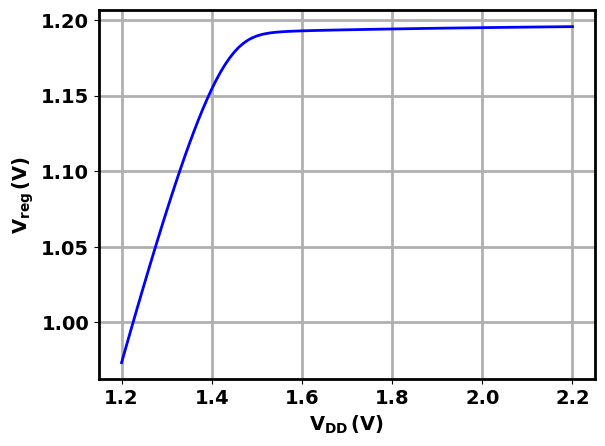

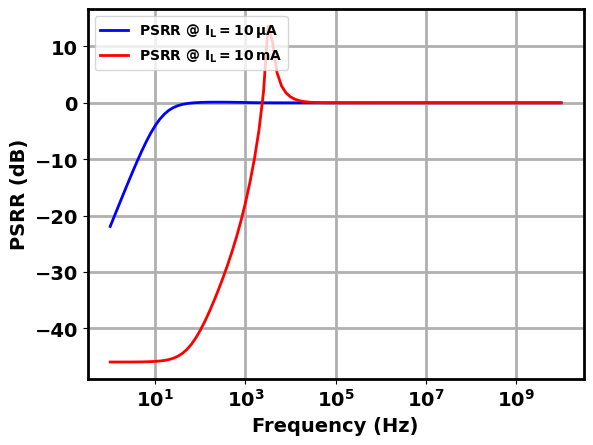

<Figure size 640x480 with 0 Axes>

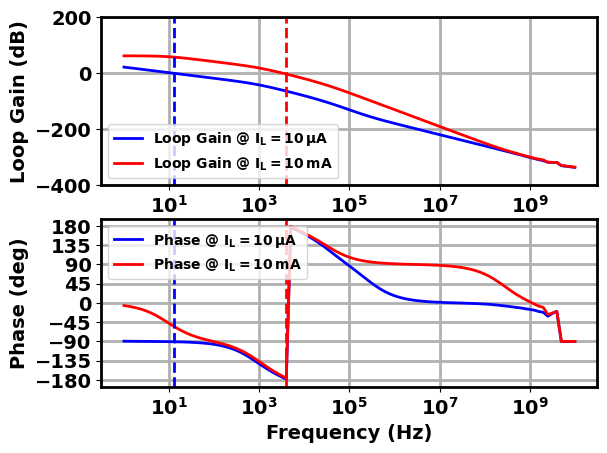

<Figure size 640x480 with 0 Axes>

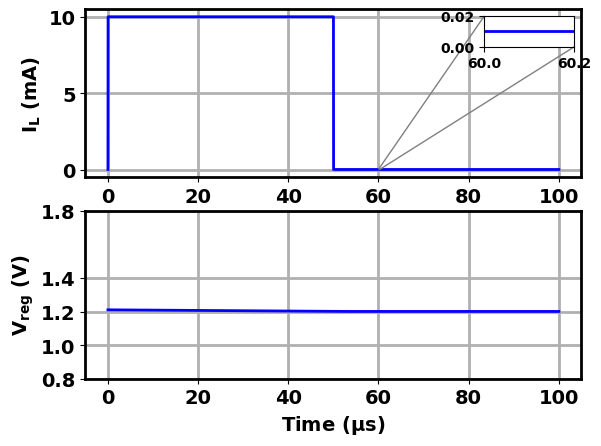

In [ ]:
import matplotlib.pyplot as plt
plt.style.use(style='default')
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

sim_results = OutputParser(GraphLDO())
dc_results = sim_results.dc(file_name='ldo_tb_dc')

# plot DC response
plt.figure('DC')
Vin = dc_results[0]
Vout = [max(dc_results[1][i], 0) for i in range(len(dc_results[1]))]
plt.plot(Vin, Vout, 'b')
plt.xlabel('$\mathbf{V_{DD}\,(V)}$', fontweight='bold', fontsize=14)
plt.xticks(fontsize=14, weight='bold')
plt.ylabel('$\mathbf{V_{reg}\,(V)}$', fontweight='bold', fontsize=14)
plt.yticks(fontsize=14, fontweight='bold')
plt.grid(linewidth=2)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)

# plot PSRR AC response
psrr_results_minload = sim_results.ac(file_name='ldo_tb_psrr_minload')
psrr_results_maxload = sim_results.ac(file_name='ldo_tb_psrr_maxload')
freq = psrr_results_minload[0]
psrr_minload = 20*np.log10(psrr_results_minload[1])
psrr_maxload = 20*np.log10(psrr_results_maxload[1])

plt.figure('PSRR')
plt.plot(freq, psrr_minload, 'b', label='PSRR @ $\mathbf{I_{L}=10\,\mu A}$')
plt.plot(freq, psrr_maxload, 'r', label='PSRR @ $\mathbf{I_{L}=10\,mA}$')
plt.xlabel('Frequency (Hz)', fontweight='bold', fontsize=14)
plt.xticks(fontsize=14, weight='bold')
plt.ylabel('PSRR (dB)', fontweight='bold', fontsize=14)
plt.yticks(fontsize=14, fontweight='bold')
plt.legend(loc='upper left', prop=dict(weight='bold'))
plt.grid(linewidth=2)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.set_xscale('log')

# plot loop stability
loop_gain_minload_results = sim_results.ac(file_name='ldo_tb_loop_gain_minload')
freq = loop_gain_minload_results[0]
loop_gain_minload = 20*np.log10(loop_gain_minload_results[1])
loop_gain_phase_minload = loop_gain_minload_results[2]
loop_gain_maxload_results = sim_results.ac(file_name='ldo_tb_loop_gain_maxload')
loop_gain_maxload = 20*np.log10(loop_gain_maxload_results[1])
loop_gain_phase_maxload = loop_gain_maxload_results[2]

plt.figure('Loop Gain')
fig, axs = plt.subplots(2)
axs[0].plot(freq, loop_gain_minload, 'b', label='Loop Gain @ $\mathbf{I_{L}=10\,\mu A}$')
axs[0].plot(freq, loop_gain_maxload, 'r', label='Loop Gain @ $\mathbf{I_{L}=10\,mA}$')
axs[0].set_ylabel('Loop Gain (dB)', fontweight='bold', fontsize=14)
axs[0].xaxis.set_tick_params(labelsize='14')
axs[0].yaxis.set_tick_params(labelsize='14')
axs[0].spines['bottom'].set_linewidth(2)
axs[0].spines['left'].set_linewidth(2)
axs[0].spines['right'].set_linewidth(2)
axs[0].spines['top'].set_linewidth(2)
axs[0].grid(linewidth=2)
axs[0].legend(loc='lower left', prop=dict(weight='bold'))
axs[0].set_yticks(axs[0].get_yticks()[::1])
idx_minload = [i for i in range(len(loop_gain_minload)) if loop_gain_minload[i] <=0][0]
idx_maxload = [i for i in range(len(loop_gain_maxload)) if loop_gain_maxload[i] <=0][0]
axs[0].axvline(x=freq[idx_minload], ls='--', color='b')
axs[0].axvline(x=freq[idx_maxload], ls='--', color='r')
axs[0].set_xscale('log')

axs[1].plot(freq, loop_gain_phase_minload, 'b', label='Phase @ $\mathbf{I_{L}=10\,\mu A}$')
axs[1].plot(freq, loop_gain_phase_maxload, 'r', label='Phase @ $\mathbf{I_{L}=10\,mA}$')
axs[1].set_ylabel('Phase (deg)', fontweight='bold', fontsize=14)
axs[1].xaxis.set_tick_params(labelsize='14')
axs[1].yaxis.set_tick_params(labelsize='14')
axs[1].spines['bottom'].set_linewidth(2)
axs[1].spines['left'].set_linewidth(2)
axs[1].spines['right'].set_linewidth(2)
axs[1].spines['top'].set_linewidth(2)
axs[1].grid(linewidth=2)
axs[1].legend(loc='upper left', prop=dict(weight='bold'))
axs[1].set_yticks(np.array([-180, -135, -90, -45, 0, 45, 90, 135, 180]))
axs[1].axvline(x=freq[idx_minload], ls='--', color='b')
axs[1].axvline(x=freq[idx_maxload], ls='--', color='r')
axs[1].set_xscale('log')
axs[1].set_xlabel('Frequency (Hz)', fontweight='bold', fontsize=14)

# load regulation
load_reg_results = sim_results.tran(file_name='ldo_tb_load_reg')
time = 1e6 * np.array(load_reg_results[0])
load_reg = load_reg_results[1]
load_reg_current_results = sim_results.tran(file_name='ldo_tb_load_reg_current')
load_reg_current = 1e3 * np.array(load_reg_current_results[1])

plt.figure('Load Reg')
fig, axs = plt.subplots(2)
axs[0].plot(time, load_reg_current, 'b', label='Load current')
axs[0].set_ylabel('$\mathbf{I_{L}}$ (mA)', fontweight='bold', fontsize=14)
axs[0].xaxis.set_tick_params(labelsize='14')
axs[0].yaxis.set_tick_params(labelsize='14')
axs[0].spines['bottom'].set_linewidth(2)
axs[0].spines['left'].set_linewidth(2)
axs[0].spines['right'].set_linewidth(2)
axs[0].spines['top'].set_linewidth(2)
axs[0].grid(linewidth=2)
axins = zoomed_inset_axes(axs[0], 100, loc=1) # zoom = 100
axins.plot(time, load_reg_current, color='b')
axins.set_xlim(60, 60.2) # Limit the region for zoom
axins.set_ylim(0, 0.02)
mark_inset(axs[0], axins, loc1=2, loc2=4, fc="none", ec="0.5")

axs[1].plot(time, load_reg, 'b', label='Vreg')
axs[1].set_ylabel('$\mathbf{V_{reg}}$ (V)', fontweight='bold', fontsize=14)
axs[1].xaxis.set_tick_params(labelsize='14')
axs[1].yaxis.set_tick_params(labelsize='14')
axs[1].spines['bottom'].set_linewidth(2)
axs[1].spines['left'].set_linewidth(2)
axs[1].spines['right'].set_linewidth(2)
axs[1].spines['top'].set_linewidth(2)
axs[1].grid(linewidth=2)
axs[1].set_yticks(np.array([0.8, 1.0, 1.2, 1.4, 1.8]))
axs[1].set_xlabel('Time ($\mathbf{\mu s}$)', fontweight='bold', fontsize=14)



## Setting up RL environment
Shown below are the RGCN architecture of the actor and critic of DDPG agent. We used 4 layers of RGCN in both actor and critic followed by a linear layer to generate the output.

In [ ]:
import torch
from torch.nn import LazyLinear
from torch_geometric.nn import RGCNConv
import torch.nn.functional as F

class Actor(torch.nn.Module):
    def __init__(self, CktGraph):
        super().__init__()
        self.num_node_features = CktGraph.num_node_features
        self.action_dim = CktGraph.action_dim
        self.device = CktGraph.device
        self.edge_index = CktGraph.edge_index
        self.edge_type = CktGraph.edge_type
        self.num_nodes = CktGraph.num_nodes
        self.num_relations = CktGraph.num_relations

        self.in_channels = self.num_node_features
        self.out_channels = self.action_dim
        self.conv1 = RGCNConv(self.in_channels, 32, self.num_relations,
                              num_bases=32)
        self.conv2 = RGCNConv(32, 32, self.num_relations,
                              num_bases=32)
        self.conv3 = RGCNConv(32, 16, self.num_relations,
                              num_bases=32)
        self.conv4 = RGCNConv(16, 16, self.num_relations,
                              num_bases=32)
        self.lin1 = LazyLinear(self.out_channels)

    def forward(self, state):
        if len(state.shape) == 2:  # if it is not batched graph data (only one data)
            state = state.reshape(1, state.shape[0], state.shape[1])

        batch_size = state.shape[0]
        edge_index = self.edge_index
        edge_type = self.edge_type
        device = self.device

        actions = torch.tensor(()).to(device)
        for i in range(batch_size):
            x = state[i]
            x = F.relu(self.conv1(x, edge_index, edge_type))
            x = F.relu(self.conv2(x, edge_index, edge_type))
            x = F.relu(self.conv3(x, edge_index, edge_type))
            x = F.relu(self.conv4(x, edge_index, edge_type))
            x = self.lin1(torch.flatten(x))
            x = torch.tanh(x).reshape(1, -1)
            actions = torch.cat((actions, x), axis=0)

        return actions


class Critic(torch.nn.Module):
    def __init__(self, CktGraph):
        super().__init__()
        self.num_node_features = CktGraph.num_node_features
        self.action_dim = CktGraph.action_dim
        self.device = CktGraph.device
        self.edge_index = CktGraph.edge_index
        self.edge_type = CktGraph.edge_type
        self.num_nodes = CktGraph.num_nodes
        self.num_relations = CktGraph.num_relations

        self.in_channels = self.num_node_features + self.action_dim
        self.out_channels = 1
        self.conv1 = RGCNConv(self.in_channels, 32, self.num_relations,
                              num_bases=32)
        self.conv2 = RGCNConv(32, 32, self.num_relations,
                              num_bases=32)
        self.conv3 = RGCNConv(32, 16, self.num_relations,
                              num_bases=32)
        self.conv4 = RGCNConv(16, 16, self.num_relations,
                              num_bases=32)
        self.lin1 = LazyLinear(self.out_channels)

    def forward(self, state, action):
        batch_size = state.shape[0]
        edge_index = self.edge_index
        edge_type = self.edge_type
        device = self.device

        action = action.repeat_interleave(self.num_nodes, 0).reshape(
            batch_size, self.num_nodes, -1)
        data = torch.cat((state, action), axis=2)

        values = torch.tensor(()).to(device)
        for i in range(batch_size):
            x = data[i]
            x = F.relu(self.conv1(x, edge_index, edge_type))
            x = F.relu(self.conv2(x, edge_index, edge_type))
            x = F.relu(self.conv3(x, edge_index, edge_type))
            x = F.relu(self.conv4(x, edge_index, edge_type))
            x = self.lin1(torch.flatten(x)).reshape(1, -1)
            values = torch.cat((values, x), axis=0)

        return values


/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


### Action Normalizer

In [ ]:
class ActionNormalizer():
    """Rescale and relocate the actions."""
    def __init__(self, action_space_low, action_space_high):

        self.action_space_low = action_space_low
        self.action_space_high = action_space_high

    def action(self, action: np.ndarray) -> np.ndarray:
        """Change the range (-1, 1) to (low, high)."""
        low = self.action_space_low
        high = self.action_space_high

        scale_factor = (high - low) / 2
        reloc_factor = high - scale_factor

        action = action * scale_factor + reloc_factor
        action = np.clip(action, low, high)

        return action

    def reverse_action(self, action: np.ndarray) -> np.ndarray:
        """Change the range (low, high) to (-1, 1)."""
        low = self.action_space_low
        high = self.action_space_high

        scale_factor = (high - low) / 2
        reloc_factor = high - scale_factor

        action = (action - reloc_factor) / scale_factor
        action = np.clip(action, -1.0, 1.0)

        return action

### Replay Buffer
Another important building block of DDPG is the replay buffer. Past experiences of the agent are important to guide exploration. It is not always good to use only recent experience. Ideally, it is beneficial to have the agent learn from more past experience in each step. However, a larger batch size may lead to a slower learning process. In this work, we chose a batch size of 128 and a total memory size of 1e5.

In [ ]:
from typing import List, Tuple, Dict

class ReplayBuffer:
    """A simple numpy replay buffer."""

    def __init__(self, CktGraph, size: int, batch_size: int = 32):

        self.num_node_features = CktGraph.num_node_features
        self.action_dim = CktGraph.action_dim
        self.num_nodes = CktGraph.num_nodes

        """Initializate."""
        self.obs_buf = np.zeros(
            [size, self.num_nodes, self.num_node_features], dtype=np.float32)
        self.next_obs_buf = np.zeros(
            [size, self.num_nodes, self.num_node_features], dtype=np.float32)
        self.acts_buf = np.zeros([size, self.action_dim], dtype=np.float32)
        self.rews_buf = np.zeros([size], dtype=np.float32)
        self.done_buf = np.zeros([size], dtype=np.float32)
        self.max_size, self.batch_size = size, batch_size
        self.ptr, self.size, = 0, 0

    def store(
        self,
        obs: np.ndarray,
        act: np.ndarray,
        rew: float,
        next_obs: np.ndarray,
        done: bool,
    ):
        """Store the transition in buffer."""
        self.obs_buf[self.ptr] = obs
        self.next_obs_buf[self.ptr] = next_obs
        self.acts_buf[self.ptr] = act
        self.rews_buf[self.ptr] = rew
        self.done_buf[self.ptr] = done
        self.ptr = (self.ptr + 1) % self.max_size
        self.size = min(self.size + 1, self.max_size)

    def sample_batch(self) -> Dict[str, np.ndarray]:
        """Randomly sample a batch of experiences from memory."""
        idxs = np.random.choice(self.size, size=self.batch_size, replace=False)
        return dict(obs=self.obs_buf[idxs],
                    next_obs=self.next_obs_buf[idxs],
                    acts=self.acts_buf[idxs],
                    rews=self.rews_buf[idxs],
                    done=self.done_buf[idxs])

    def __len__(self) -> int:
        return self.size

### Truncated Wrapper Function
As discussed previously, the truncated Gaussian noise is used to help DDPG agent explore the action space. `trunc_normal` is the final wrapper function that we will use.

In [ ]:
import math
from torch import Tensor

def _no_grad_trunc_normal_(tensor, mean, std, a, b):
    # Method based on https://people.sc.fsu.edu/~jburkardt/presentations/truncated_normal.pdf
    # Code adapted from https://zhuanlan.zhihu.com/p/521318833
    def norm_cdf(x):
        # Computes standard normal cumulative distribution function
        return (1. + math.erf(x / np.sqrt(2.))) / 2.

    if (mean < a - 2 * std) or (mean > b + 2 * std):
        warnings.warn("mean is more than 2 std from [a, b] in nn.init.trunc_normal_. "
                      "The distribution of values may be incorrect.",
                      stacklevel=2)

    with torch.no_grad():
        # Values are generated by using a truncated uniform distribution and
        # then using the inverse CDF for the normal distribution.
        # Get upper and lower cdf values
        l = norm_cdf((a - mean) / std)
        u = norm_cdf((b - mean) / std)

        # Uniformly fill tensor with values from [l, u], then translate to
        # [2l-1, 2u-1].
        tensor.uniform_(2 * l - 1, 2 * u - 1)

        # Use inverse cdf transform for normal distribution to get truncated
        # standard normal
        tensor.erfinv_()

        # Transform to proper mean, std
        tensor.mul_(std * math.sqrt(2.))
        tensor.add_(mean)

        # Clamp to ensure it's in the proper range
        tensor.clamp_(min=a, max=b)
        return tensor

def trunc_normal_(tensor: Tensor, mean: float = 0., std: float = 1., a: float = -2., b: float = 2.) -> Tensor:
    r"""Fills the input Tensor with values drawn from a truncated
    normal distribution. The values are effectively drawn from the
    normal distribution :math:`\mathcal{N}(\text{mean}, \text{std}^2)`
    with values outside :math:`[a, b]` redrawn until they are within
    the bounds. The method used for generating the random values works
    best when :math:`a \leq \text{mean} \leq b`.

    Args:
        tensor: an n-dimensional `torch.Tensor`
        mean: the mean of the normal distribution
        std: the standard deviation of the normal distribution
        a: the minimum cutoff value
        b: the maximum cutoff value

    Examples:
        >>> w = torch.empty(3, 5)
        >>> nn.init.trunc_normal_(w)
    """
    return _no_grad_trunc_normal_(tensor, mean, std, a, b)

def trunc_normal(mean, std, a=-1, b=1):
    """
    wrapper of <trunc_normal_> to work with np.array

    """

    output = np.zeros(len(mean))

    for i in range(len(mean)):
        output[i] = trunc_normal_(torch.empty(1), mean[i], std, a, b)[0]

    return output

### DDPG Agent
Now, we put everything together as the DDPG agent, which is primarily based on the code here: https://github.com/MrSyee/pg-is-all-you-need/blob/master/03.DDPG.ipynb

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import torch.optim as optim

class DDPGAgent:
    """DDPGAgent interacting with environment.

    Attribute:
        env (gym.Env): openAI Gym environment
        actor (nn.Module): target actor model to select actions
        actor_target (nn.Module): actor model to predict next actions
        actor_optimizer (Optimizer): optimizer for training actor
        critic (nn.Module): critic model to predict state values
        critic_target (nn.Module): target critic model to predict state values
        critic_optimizer (Optimizer): optimizer for training critic
        memory (ReplayBuffer): replay memory to store transitions
        batch_size (int): batch size for sampling
        gamma (float): discount factor
        tau (float): parameter for soft target update
        initial_random_steps (int): initial random action steps
        noise: noise generator for exploration
        device (torch.device): cpu / gpu
        transition (list): temporory storage for the recent transition
        total_step (int): total step numbers
        is_test (bool): flag to show the current mode (train / test)
    """

    def __init__(
        self,
        env,
        CktGraph,
        memory_size: int,
        batch_size: int,
        noise_sigma: float,
        noise_sigma_min: float,
        noise_sigma_decay: float,
        noise_type: str,
        gamma: float = 0.99,
        tau: float = 5e-3,
        initial_random_steps: int = 1e4,
    ):
        super().__init__()
        """Initialize."""
        self.noise_sigma = noise_sigma
        self.noise_sigma_min = noise_sigma_min
        self.noise_sigma_decay = noise_sigma_decay

        self.action_dim = CktGraph.action_dim

        self.env = env
        self.memory = ReplayBuffer(CktGraph, memory_size, batch_size)
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau
        self.initial_random_steps = initial_random_steps

        self.episode = 0

        self.device = CktGraph.device
        print(self.device)

        # networks
        self.actor = Actor(CktGraph).to(self.device)
        self.actor_target = Actor(CktGraph).to(self.device)
        self.actor_target.load_state_dict(self.actor.state_dict())

        self.critic = Critic(CktGraph).to(self.device)
        self.critic_target = Critic(CktGraph).to(self.device)
        self.critic_target.load_state_dict(self.critic.state_dict())

        # optimizer
        self.actor_optimizer = optim.Adam(
            self.actor.parameters(), lr=3e-4, weight_decay=1e-4)
        self.critic_optimizer = optim.Adam(
            self.critic.parameters(), lr=3e-4, weight_decay=1e-4)

        # transition to store in memory
        self.transition = list()

        # total steps count
        self.total_step = 0

        self.noise_type = noise_type

        # mode: train / test
        self.is_test = False

    def select_action(self, state: np.ndarray) -> np.ndarray:
        """Select an action from the input state."""

        if self.is_test == False:

            if self.total_step < self.initial_random_steps: # if initial random action should be conducted
                print('*** Random actions ***')
                # in (-1, 1)
                selected_action = np.random.uniform(-1, 1, self.action_dim)
            else:
                print(f'*** Actions with Noise sigma = {self.noise_sigma} ***')

                selected_action = self.actor(
                    torch.FloatTensor(state).to(self.device)
                ).detach().cpu().numpy()  # in (-1, 1)
                selected_action = selected_action.flatten()

                # add noise for exploration during training (also testing)
                if self.noise_type == 'uniform':
                    print(""" uniform distribution noise """)
                    selected_action = np.random.uniform(np.clip(
                        selected_action-self.noise_sigma, -1, 1), np.clip(selected_action+self.noise_sigma, -1, 1))

                if self.noise_type == 'truncnorm':
                    print(""" truncated normal distribution noise """)
                    selected_action = trunc_normal(selected_action, self.noise_sigma)
                    selected_action = np.clip(selected_action, -1, 1)

                self.noise_sigma = max(
                    self.noise_sigma_min, self.noise_sigma*self.noise_sigma_decay)

        else:
            selected_action = self.actor(
                torch.FloatTensor(state).to(self.device)
            ).detach().cpu().numpy()  # in (-1, 1)
            selected_action = selected_action.flatten()

        print(f'selected action: {selected_action}')
        self.transition = [state, selected_action]

        return selected_action

    def step(self, action: np.ndarray) -> Tuple[np.ndarray, np.float64, bool]:
        """Take an action and return the response of the env."""
        next_state, reward, terminated, truncated, _ = self.env.step(action)

        if self.is_test == False:
            self.transition += [reward, next_state, terminated]
            self.memory.store(*self.transition)

        return next_state, reward, terminated, truncated, _

    def update_model(self) -> torch.Tensor:
        print("*** Update the model by gradient descent. ***")
        """Update the model by gradient descent."""
        device = self.device  # for shortening the following lines

        samples = self.memory.sample_batch()
        state = torch.FloatTensor(samples["obs"]).to(device)
        next_state = torch.FloatTensor(samples["next_obs"]).to(device)
        action = torch.FloatTensor(samples["acts"]).to(device)
        reward = torch.FloatTensor(samples["rews"].reshape(-1, 1)).to(device)
        done = torch.FloatTensor(samples["done"].reshape(-1, 1)).to(device)

        masks = 1 - done
        next_action = self.actor_target(next_state)
        next_value = self.critic_target(next_state, next_action)
        curr_return = reward + self.gamma * next_value * masks

        # train critic
        values = self.critic(state, action)
        critic_loss = F.mse_loss(values, curr_return)

        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()

        # train actor
        actor_loss = -self.critic(state, self.actor(state)).mean()

        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # target update
        self._target_soft_update()

        return actor_loss.data, critic_loss.data

    def train(self, num_steps: int, plotting_interval: int = 10):
        """Train the agent."""
        self.is_test = False

        state, _ = self.env.reset()
        actor_losses = []
        critic_losses = []
        scores = []
        score = 0

        for self.total_step in range(1, num_steps + 1):
            print(f'*** Step: {self.total_step} | Episode: {self.episode} ***')

            action = self.select_action(state)
            next_state, reward, terminated, truncated, _ = self.step(action)

            state = next_state
            score += reward

            if terminated or truncated:
                state, _ = self.env.reset()
                self.episode = self.episode + 1
                scores.append(score)
                score = 0

            # if training is ready
            if (
                len(self.memory) >= self.batch_size
                and self.total_step > self.initial_random_steps
            ):
                actor_loss, critic_loss = self.update_model()
                actor_losses.append(actor_loss.detach().cpu().numpy())
                critic_losses.append(critic_loss.detach().cpu().numpy())

            # plotting
            if self.total_step % plotting_interval == 0:
                self._plot(
                    self.total_step,
                    scores,
                    actor_losses,
                    critic_losses,
                )

        self.env.close()

    def test(self):
        """Test the agent."""
        self.is_test = True

        state, info = self.env.reset()
        truncated = False
        terminated = False
        score = 0

        performance_list = []
        while truncated == False or terminated == False:
            action = self.select_action(state)
            next_state, reward, terminated, truncated, info = self.step(action)
            performance_list.append([action, info])

            state = next_state
            score += reward

        print(f"score: {score}")
        print(f"info: {info}")
        self.env.close()

        return performance_list

    def _target_soft_update(self):
        """Soft-update: target = tau*local + (1-tau)*target."""
        tau = self.tau

        for t_param, l_param in zip(
            self.actor_target.parameters(), self.actor.parameters()
        ):
            t_param.data.copy_(tau * l_param.data + (1.0 - tau) * t_param.data)

        for t_param, l_param in zip(
            self.critic_target.parameters(), self.critic.parameters()
        ):
            t_param.data.copy_(tau * l_param.data + (1.0 - tau) * t_param.data)

    def _plot(
        self,
        step: int,
        scores: List[float],
        actor_losses: List[float],
        critic_losses: List[float],
    ):
        """Plot the training progresses."""
        def subplot(loc: int, title: str, values: List[float]):
            plt.subplot(loc)
            plt.title(title)
            plt.plot(values)

        subplot_params = [
            (131, f"step {step}", scores),
            (132, "actor_loss", actor_losses),
            (133, "critic_loss", critic_losses),
        ]

        clear_output(True)
        plt.figure(figsize=(30, 5))
        for loc, title, values in subplot_params:
            subplot(loc, title, values)
        plt.show()


### Write values to standardize transistor attributes
After we finalize the DDPG agent, we can define our LDO circuit environment with `gymnasium`. The following class `LDOEnv` strictly follows the `gymnasium` API and could be easily integrated with other baseline RL algorithms.

Noted that we need to have the mean and std to normalize transistor's attributes used in the observation matrix $X$. In the code below, you can run some initial experiments with class method `_init_random_sim` to obatin such information. To save your time, we have provided them here in the following and saved it as the file `ldo_tb_op_mean_std.json`.

In [ ]:
%%writefile /content/ldo/simulations/ldo_tb_op_mean_std.json
{"OP_M_mean": {"gmb": 0.00025193620694663964, "gm": 0.0007470884447514287, "gds": 0.15955492259158777, "vdss": 0.30224245936007293, "vth": 0.9545911425579414, "ids": 0.00013245487950278235, "idb": -1.5136372609244624e-11, "isb": -1.5258342672942113e-13, "ibe": 5.3876366651014213e-08, "igidl": 0.0, "igisl": 0.0, "igs": 0.0, "igd": 0.0, "igb": 0.0, "igcs": 0.0, "vsb": -0.15092105898442346, "vgs": 1.3170085079744986, "vds": 0.6036861237364942, "cgg": 1.1501217816935506e-11, "cgs": -5.22280196825814e-12, "cgd": -4.0138097213820005e-12, "cbg": -2.5448338736961174e-12, "cbd": -2.5179305489729453e-12, "cbs": -4.340246130689528e-13, "cdg": -4.325562394919275e-12, "cdd": 4.3683752086402425e-12, "cds": 1.5072135236944852e-12, "csg": -4.630821548320106e-12, "csd": 2.1633650617147026e-12, "css": 4.149613057632612e-12, "cgb": -2.264606127295359e-12, "cdb": -1.5500263374154512e-12, "csb": -1.6821565710272068e-12, "cbb": 5.4967890357380175e-12}, "OP_M_std": {"gmb": 0.00024756528858728226, "gm": 0.0007104729511229423, "gds": 0.7435683027401271, "vdss": 0.17774585049215175, "vth": 0.07721630119732137, "ids": 0.00010601762366679949, "idb": 5.5977070406135605e-11, "isb": 2.480654087132613e-13, "ibe": 4.377011636129801e-07, "igidl": 0.0, "igisl": 0.0, "igs": 0.0, "igd": 0.0, "igb": 0.0, "igcs": 0.0, "vsb": 0.24566216639057203, "vgs": 0.2868046916634973, "vds": 0.5628339054400677, "cgg": 3.516490616546036e-11, "cgs": 1.6528188234740815e-11, "cgd": 1.6745457268941073e-11, "cbg": 9.833992879396874e-12, "cbd": 1.0439776215575249e-11, "cbs": 2.486132451535244e-12, "cdg": 1.5747257535240447e-11, "cdd": 1.8124817907704897e-11, "cds": 4.8886254868342284e-12, "csg": 1.593060616028576e-11, "csd": 9.049686590881142e-12, "css": 1.2977744677620661e-11, "cgb": 9.303863546928554e-12, "cdb": 5.441803240158292e-12, "csb": 5.554343862856118e-12, "cbb": 1.5861121684998846e-11}}

Overwriting /content/ldo/simulations/ldo_tb_op_mean_std.json


### Set up LDOEnv

In [ ]:
import torch
import numpy as np
import os
import json
from tabulate import tabulate
import gymnasium as gym
from gymnasium import spaces

CktGraph = GraphLDO

class LDOEnv(gym.Env, CktGraph, DeviceParams):

    def __init__(self):
        gym.Env.__init__(self)
        CktGraph.__init__(self)
        DeviceParams.__init__(self, self.ckt_hierarchy)

        self.CktGraph = CktGraph()
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=self.obs_shape, dtype=np.float64)
        self.action_space = spaces.Box(low=-1, high=1, shape=self.action_shape, dtype=np.float64)

    def _initialize_simulation(self):
        self.W_M1, self.L_M1, \
        self.W_M3, self.L_M3, \
        self.W_M5, self.L_M5, \
        self.W_pass, self.L_pass, self.M_pass, \
        self.Vb, \
        self.M_Rfb, self.M_Cfb, \
        self.M_CL, = \
        np.array([6e-6, 0.26e-6,
                  6e-6, 0.26e-6,
                  5e-6, 0.26e-6,
                  1250e-6, 0.26e-6, 125,
                  0.40,
                  1,
                  1,
                  10])

        """Run the initial simulations."""
        action = np.array([self.W_M1, self.L_M1, \
                          self.W_M3, self.L_M3, \
                          self.W_M5, self.L_M5, \
                          self.W_pass, self.L_pass, self.M_pass, \
                          self.Vb, \
                          self.M_Rfb, \
                          self.M_Cfb, \
                          self.M_CL])

        self.do_simulation(action)

    def _do_simulation(self, action: np.array):
        """
         W_M1 = W_M2, L_M1 = L_M2
         W_M3 = W_M4, L_M3 = L_M4

        """
        W_M1, L_M1, \
        W_M3, L_M3, \
        W_M5, L_M5,  \
        W_pass, L_pass, M_pass, \
        Vb, \
        M_Rfb, M_Cfb, \
        M_CL = action

        M_pass = int(M_pass)
        M_Rfb = int(M_Rfb)
        M_Cfb = int(M_Cfb)
        M_CL = int(M_CL)

        # update netlist
        try:
            # open the netlist of the testbench
            ldo_tb_vars = open(f'{SPICE_NETLIST_DIR}/ldo_tb_vars.spice', 'r')
            lines = ldo_tb_vars.readlines()
            print('UPDATING NETLIST NOW')

            lines[0] = f'.param W_M1={W_M1} L_M1={L_M1}\n'
            lines[1] = f'.param W_M2=W_M1 L_M2=L_M1\n'
            lines[2] = f'.param W_M3={W_M3} L_M3={L_M3}\n'
            lines[3] = f'.param W_M4=W_M3 L_M4=L_M3\n'
            lines[4] = f'.param W_M5={W_M5} L_M5={L_M5}\n'
            lines[5] = f'.param W_pass={W_pass} L_pass={L_pass} M_pass={M_pass}\n'
            lines[6] = f'.param Vb={Vb}\n'
            lines[7] = f'.param M_Rfb={M_Rfb} M_Cfb={M_Cfb}\n'
            lines[8] = f'.param M_CL={M_CL}\n'

            print('FINISHED UPDATING NETLIST NOW')

            ldo_tb_vars = open(f'{SPICE_NETLIST_DIR}/ldo_tb_vars.spice', 'w')
            ldo_tb_vars.writelines(lines)
            ldo_tb_vars.close()

            print('*** Simulations for Loop Stability, load regulation, DC and PSRR ***')
            os.system(f'cd {SPICE_NETLIST_DIR}; ngspice -b -o ldo_tb.log ldo_tb.spice')
            print('*** Simulations Done! ***')
        except:
            print('ERROR')

    def do_simulation(self, action):
        self._do_simulation(action)
        self.sim_results = OutputParser(self.CktGraph)
        self.op_results = self.sim_results.dcop(file_name='ldo_tb_op')

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self._initialize_simulation()
        observation = self._get_obs()
        info = self._get_info()
        return observation, info

    def close(self):
        return None

    def step(self, action):
        action = ActionNormalizer(action_space_low=self.action_space_low, action_space_high = \
                                       self.action_space_high).action(action) # convert [-1.1] range back to normal range
        action = action.astype(object)

        print(f"action: {action}")

        self.W_M1, self.L_M1, \
        self.W_M3, self.L_M3, \
        self.W_M5, self.L_M5, \
        self.W_pass, self.L_pass, self.M_pass, \
        self.Vb, \
        self.M_Rfb, self.M_Cfb, \
        self.M_CL  = action

        ''' run simulations '''
        self.do_simulation(action)

        ''' get observation '''
        observation = self._get_obs()
        info = self._get_info()

        reward = self.reward

        terminated = False

        print(tabulate(
            [
                ['Drop-out voltage (mV)', self.Vdrop*1e3, self.Vdrop_target*1e3],
                ['Load regulation (mV)', self.Vload_reg_delta*1e3, self.Vload_reg_delta_target*1e3],

                ['PSRR worst maxload (dB) < 10kHz', 20*np.log10(self.PSRR_maxload_worst_10kHz), 20*np.log10(self.PSRR_target_10kHz)],
                ['PSRR worst maxload (dB) < 1MHz', 20*np.log10(self.PSRR_maxload_worst_1MHz), 20*np.log10(self.PSRR_target_1MHz)],
                ['PSRR worst maxload (dB) > 1MHz', 20*np.log10(self.PSRR_maxload_worst_above_1MHz), 20*np.log10(self.PSRR_target_above_1MHz)],

                ['PSRR worst minload (dB) < 10kHz', 20*np.log10(self.PSRR_minload_worst_10kHz), 20*np.log10(self.PSRR_target_10kHz)],
                ['PSRR worst minload (dB) < 1MHz', 20*np.log10(self.PSRR_minload_worst_1MHz), 20*np.log10(self.PSRR_target_1MHz)],
                ['PSRR worst minload (dB) > 1MHz', 20*np.log10(self.PSRR_minload_worst_above_1MHz), 20*np.log10(self.PSRR_target_above_1MHz)],

                ['Loop-gain PM (deg) at max load', self.phase_margin_maxload, self.phase_margin_target],
                ['Loop-gain PM (deg) at min load', self.phase_margin_minload, self.phase_margin_target],

                ['Iq (uA)', self.Iq*1e6, self.Iq_target*1e6],
                ['CL (pF)', self.op_results['CL']['c']*1e12, ''],

                ['Vdrop score', self.Vdrop_score, 0],
                ['Load regulation score', self.load_reg_score, 0],

                ['PSRR worst maxload (dB) < 10kHz score', self.PSRR_maxload_worst_10kHz_score, 0],
                ['PSRR worst maxload (dB) < 1MHz score', self.PSRR_maxload_worst_1MHz_score, 0],
                ['PSRR worst maxload (dB) > 1MHz score', self.PSRR_maxload_worst_above_1MHz_score, 0],

                ['PSRR worst minload (dB) < 10kHz score', self.PSRR_minload_worst_10kHz_score, 0],
                ['PSRR worst minload (dB) < 1MHz score', self.PSRR_minload_worst_1MHz_score, 0],
                ['PSRR worst minload (dB) > 1MHz score', self.PSRR_minload_worst_above_1MHz_score, 0],

                ['PM score minload', self.phase_margin_minload_score, 0],
                ['PM score maxload', self.phase_margin_maxload_score, 0],
                ['Iq score', self.Iq_score, 0],

                ['CL area score', self.CL_area_score, 0],
                ['Reward', reward, 10]
                ],
            headers=['param', 'num', 'target'], tablefmt='orgtbl', numalign='right', floatfmt=".2f"
            ))

        return observation, reward, terminated, False, info

    def _get_obs(self):
        # pick some .OP params from the dict:
        try:
            f = open(f'{SPICE_NETLIST_DIR}/ldo_tb_op_mean_std.json')
            self.op_mean_std = json.load(f)
            self.op_mean = self.op_mean_std['OP_M_mean']
            self.op_std = self.op_mean_std['OP_M_std']
            self.op_mean = np.array([self.op_mean['ids'], self.op_mean['gm'], self.op_mean['gds'], self.op_mean['vth'], self.op_mean['vdss'], self.op_mean['vds'], self.op_mean['vgs']])
            self.op_std = np.array([self.op_std['ids'], self.op_std['gm'], self.op_std['gds'], self.op_std['vth'], self.op_std['vdss'], self.op_std['vds'], self.op_std['vgs']])
        except:
            print('You need to run <_random_op_sims> to generate mean and std for transistor .OP parameters')

        self.OP_M1 = self.op_results['M1']
        self.OP_M1_norm = (np.array([self.OP_M1['ids'],
                                self.OP_M1['gm'],
                                self.OP_M1['gds'],
                                self.OP_M1['vth'],
                                self.OP_M1['vdss'],
                                self.OP_M1['vds'],
                                self.OP_M1['vgs']
                                ]) - self.op_mean)/self.op_std
        self.OP_M2 = self.op_results['M2']
        self.OP_M2_norm = (np.array([self.OP_M2['ids'],
                                self.OP_M2['gm'],
                                self.OP_M2['gds'],
                                self.OP_M2['vth'],
                                self.OP_M2['vdss'],
                                self.OP_M2['vds'],
                                self.OP_M2['vgs']
                                ]) - self.op_mean)/self.op_std
        self.OP_M3 = self.op_results['M3']
        self.OP_M3_norm = (np.abs([self.OP_M3['ids'],
                                self.OP_M3['gm'],
                                self.OP_M3['gds'],
                                self.OP_M3['vth'],
                                self.OP_M3['vdss'],
                                self.OP_M3['vds'],
                                self.OP_M3['vgs']
                                ]) - self.op_mean)/self.op_std
        self.OP_M4 = self.op_results['M4']
        self.OP_M4_norm = (np.abs([self.OP_M4['ids'],
                                self.OP_M4['gm'],
                                self.OP_M4['gds'],
                                self.OP_M4['vth'],
                                self.OP_M4['vdss'],
                                self.OP_M4['vds'],
                                self.OP_M4['vgs']
                                ]) - self.op_mean)/self.op_std
        self.OP_M5 = self.op_results['M5']
        self.OP_M5_norm = (np.abs([self.OP_M5['ids'],
                                self.OP_M5['gm'],
                                self.OP_M5['gds'],
                                self.OP_M5['vth'],
                                self.OP_M5['vdss'],
                                self.OP_M5['vds'],
                                self.OP_M5['vgs']
                                ]) - self.op_mean)/self.op_std
        self.OP_M6 = self.op_results['M6']
        self.OP_M6_norm = (np.array([self.OP_M6['ids'],
                                self.OP_M6['gm'],
                                self.OP_M6['gds'],
                                self.OP_M6['vth'],
                                self.OP_M6['vdss'],
                                self.OP_M6['vds'],
                                self.OP_M6['vgs']
                                ]) - self.op_mean)/self.op_std

        self.OP_Vb = self.op_results['Vb']['dc']

        # normalize all passive components
        self.Rfb =  self.Rsheet * self.L_Rfb / self.W_Rfb / self.M_Rfb
        self.OP_Rfb_norm = ActionNormalizer(action_space_low=self.Rfb_low, action_space_high=self.Rfb_high).reverse_action(self.Rfb) # convert to (-1, 1)

        self.OP_Cfb_norm = ActionNormalizer(action_space_low=self.Cfb_low, action_space_high=self.Cfb_high).reverse_action(self.op_results['Cfb']['c']) # convert to (-1, 1)
        self.OP_CL_norm = ActionNormalizer(action_space_low=self.CL_low, action_space_high=self.CL_high).reverse_action(self.op_results['CL']['c']) # convert to (-1, 1)

        # state shall be in the order of node (node0, node1, ...)
        observation = np.array([
                               [0,0,0,      0,0,0,      self.OP_M1_norm[0],self.OP_M1_norm[1],self.OP_M1_norm[2],self.OP_M1_norm[3],self.OP_M1_norm[4],self.OP_M1_norm[5],self.OP_M1_norm[6]],
                               [0,0,0,      0,0,0,      self.OP_M2_norm[0],self.OP_M2_norm[1],self.OP_M2_norm[2],self.OP_M2_norm[3],self.OP_M2_norm[4],self.OP_M2_norm[5],self.OP_M2_norm[6]],
                               [0,0,0,      0,0,0,      self.OP_M3_norm[0],self.OP_M3_norm[1],self.OP_M3_norm[2],self.OP_M3_norm[3],self.OP_M3_norm[4],self.OP_M3_norm[5],self.OP_M3_norm[6]],
                               [0,0,0,      0,0,0,      self.OP_M4_norm[0],self.OP_M4_norm[1],self.OP_M4_norm[2],self.OP_M4_norm[3],self.OP_M4_norm[4],self.OP_M4_norm[5],self.OP_M4_norm[6]],
                               [0,0,0,      0,0,0,      self.OP_M5_norm[0],self.OP_M5_norm[1],self.OP_M5_norm[2],self.OP_M5_norm[3],self.OP_M5_norm[4],self.OP_M5_norm[5],self.OP_M5_norm[6]],
                               [0,0,0,      0,0,0,      self.OP_M6_norm[0],self.OP_M6_norm[1],self.OP_M6_norm[2],self.OP_M6_norm[3],self.OP_M6_norm[4],self.OP_M6_norm[5],self.OP_M6_norm[6]],
                               [self.Vb,0,0,        0,0,0,      0,0,0,0,0,0,0],
                               [0,self.Vdd,0,       0,0,0,      0,0,0,0,0,0,0],
                               [0,0,self.GND,       0,0,0,      0,0,0,0,0,0,0],
                               [0,0,0,      self.OP_Rfb_norm,0,0,        0,0,0,0,0,0,0],
                               [0,0,0,      0,self.OP_Cfb_norm,0,        0,0,0,0,0,0,0],
                               [0,0,0,      0,0,self.OP_CL_norm,      0,0,0,0,0,0,0],
                               ])
        # clip the obs for better regularization
        observation = np.clip(observation, -5, 5)

        return observation

    def _get_info(self):
        '''Evaluate the performance'''
        ''' DC performance '''
        self.dc_results = self.sim_results.dc(file_name='ldo_tb_dc')
        idx = int(self.Vdd/0.01 - 1/0.01) # since I sweep Vdc from 1V - 3V to avoid some bad DC points
        self.Vdrop =  abs(self.Vdd - self.dc_results[1][idx])

        self.Vdrop_score = np.min([(self.Vdrop_target - self.Vdrop) / (self.Vdrop_target + self.Vdrop), 0])

        """ Load regulation """
        _, self.load_reg = self.sim_results.tran(file_name='ldo_tb_load_reg')
        idx_1 = int(len(self.load_reg)/4)
        idx_2 = len(self.load_reg) - 1
        self.Vload_reg_delta = abs(self.load_reg[idx_2] - self.load_reg[idx_1])

        self.load_reg_score = np.min([(self.Vload_reg_delta_target - self.Vload_reg_delta) / (self.Vload_reg_delta_target + self.Vload_reg_delta), 0])

        ''' PSRR performance at max load current '''
        self.psrr_results_maxload = self.sim_results.ac(file_name='ldo_tb_psrr_maxload')
        freq = self.psrr_results_maxload[0]
        # @ 10 kHz
        idx_10kHz = int(10 * np.log10(self.PSRR_10kHz))
        # @ 1 MHz
        idx_1MHz = int(10 * np.log10(self.PSRR_1MHz))
        self.PSRR_maxload_worst_10kHz = max(self.psrr_results_maxload[1][:idx_10kHz]) # in linear scale
        self.PSRR_maxload_worst_1MHz = max(self.psrr_results_maxload[1][:idx_1MHz]) # in linear scale
        self.PSRR_maxload_worst_above_1MHz = max(self.psrr_results_maxload[1][idx_1MHz:]) # in linear scale

        # @ 10 kHz
        if 20*np.log10(self.PSRR_maxload_worst_10kHz) > 0:
            self.PSRR_maxload_worst_10kHz_score = -1
        else:
            self.PSRR_maxload_worst_10kHz_score =  np.min([(self.PSRR_target_10kHz - self.PSRR_maxload_worst_10kHz) / (self.PSRR_maxload_worst_10kHz + self.PSRR_target_10kHz), 0])
            self.PSRR_maxload_worst_10kHz_score =  self.PSRR_maxload_worst_10kHz_score * 0.5 # give a weights


        # @ 1MHz
        if 20*np.log10(self.PSRR_maxload_worst_1MHz) > 0:
            self.PSRR_maxload_worst_1MHz_score = -1
        else:
            self.PSRR_maxload_worst_1MHz_score =  np.min([(self.PSRR_target_1MHz - self.PSRR_maxload_worst_1MHz) / (self.PSRR_maxload_worst_1MHz + self.PSRR_target_1MHz), 0])

        # beyond 1 MHz
        if 20*np.log10(self.PSRR_maxload_worst_above_1MHz) > 0:
            self.PSRR_maxload_worst_above_1MHz_score = -1
        else:
            self.PSRR_maxload_worst_above_1MHz_score =  np.min([(self.PSRR_target_above_1MHz - self.PSRR_maxload_worst_above_1MHz) / (self.PSRR_maxload_worst_above_1MHz + self.PSRR_target_above_1MHz), 0])

        ''' PSRR performance at min load current '''
        self.psrr_results_minload = self.sim_results.ac(file_name='ldo_tb_psrr_minload')
        freq = self.psrr_results_minload[0]

        # @ 10 kHz
        idx_10kHz = int(10 * np.log10(self.PSRR_10kHz))
        # @ 1 MHz
        idx_1MHz = int(10 * np.log10(self.PSRR_1MHz))
        self.PSRR_minload_worst_10kHz = max(self.psrr_results_minload[1][:idx_10kHz]) # in linear scale
        self.PSRR_minload_worst_1MHz = max(self.psrr_results_minload[1][:idx_1MHz]) # in linear scale
        self.PSRR_minload_worst_above_1MHz = max(self.psrr_results_minload[1][idx_1MHz:]) # in linear scale

        # @ 10 kHz
        if 20*np.log10(self.PSRR_minload_worst_10kHz) > 0:
            self.PSRR_minload_worst_10kHz_score = -1
        else:
            self.PSRR_minload_worst_10kHz_score =  np.min([(self.PSRR_target_10kHz - self.PSRR_minload_worst_10kHz) / (self.PSRR_minload_worst_10kHz + self.PSRR_target_10kHz), 0])
            self.PSRR_minload_worst_10kHz_score =  self.PSRR_minload_worst_10kHz_score * 0.5 # give a weights

        # @ 1MHz
        if 20*np.log10(self.PSRR_minload_worst_1MHz) > 0:
            self.PSRR_minload_worst_1MHz_score = -1
        else:
            self.PSRR_minload_worst_1MHz_score =  np.min([(self.PSRR_target_1MHz - self.PSRR_minload_worst_1MHz) / (self.PSRR_minload_worst_1MHz + self.PSRR_target_1MHz), 0])

        # beyond 1 MHz
        if 20*np.log10(self.PSRR_minload_worst_above_1MHz) > 0:
            self.PSRR_minload_worst_above_1MHz_score = -1
        else:
            self.PSRR_minload_worst_above_1MHz_score =  np.min([(self.PSRR_target_above_1MHz - self.PSRR_minload_worst_above_1MHz) / (self.PSRR_minload_worst_above_1MHz + self.PSRR_target_above_1MHz), 0])

        ''' Loop-gain phase margin at max load current'''
        self.loop_gain_results_maxload = self.sim_results.ac(file_name='ldo_tb_loop_gain_maxload')
        freq = self.loop_gain_results_maxload[0]
        self.loop_gain_mag_maxload = 20*np.log10(self.loop_gain_results_maxload[1])
        self.loop_gain_phase_maxload = self.loop_gain_results_maxload[2] # in degree
        if self.loop_gain_mag_maxload[0] < 0: # if DC gain is smaller than 0 dB
            self.phase_margin_maxload = 0 # phase margin becomes meaningless
        else:
            try:
                idx = [i for i,j in enumerate(self.loop_gain_mag_maxload[:-1] * self.loop_gain_mag_maxload[1:]) if j<0][0]+1
                phase_margin_maxload = np.min(self.loop_gain_phase_maxload[:idx]) + 180
            except: # this rarely happens: unity gain is larger than the frequency sweep
                idx = len(self.loop_gain_phase_maxload)
                phase_margin_maxload = np.min(self.loop_gain_phase_maxload[:idx]) + 180
            if phase_margin_maxload > 180 or phase_margin_maxload < 0:
                self.phase_margin_maxload = 0
            else:
                self.phase_margin_maxload = phase_margin_maxload

        ''' Loop-gain phase margin at min load current'''
        self.loop_gain_results_minload = self.sim_results.ac(file_name='ldo_tb_loop_gain_minload')
        freq = self.loop_gain_results_minload[0]
        self.loop_gain_mag_minload = 20*np.log10(self.loop_gain_results_minload[1])
        self.loop_gain_phase_minload = self.loop_gain_results_minload[2] # in degree
        if self.loop_gain_mag_minload[0] < 0: # if DC gain is smaller than 0 dB
            self.phase_margin_minload = 0 # phase margin becomes meaningless
        else:
            try:
                idx = [i for i,j in enumerate(self.loop_gain_mag_minload[:-1] * self.loop_gain_mag_minload[1:]) if j<0][0]+1
                phase_margin_minload = np.min(self.loop_gain_phase_minload[:idx]) + 180
            except: # this rarely happens: unity gain is larger than the frequency sweep
                idx = len(self.loop_gain_phase_minload)
                phase_margin_minload = np.min(self.loop_gain_phase_minload[:idx]) + 180
            if phase_margin_minload > 180 or phase_margin_minload < 0:
                self.phase_margin_minload = 0
            else:
                self.phase_margin_minload = phase_margin_minload

        if self.phase_margin_minload < 45:
            self.phase_margin_minload_score = -2 # fight against the PSRR
        else:
            self.phase_margin_minload_score = np.min([(self.phase_margin_minload - self.phase_margin_target) / (self.phase_margin_minload + self.phase_margin_target), 0]) # larger PM is better

        if self.phase_margin_maxload < 45:
            self.phase_margin_maxload_score = -2
        else:
            self.phase_margin_maxload_score = np.min([(self.phase_margin_maxload - self.phase_margin_target) / (self.phase_margin_maxload + self.phase_margin_target), 0]) # larger PM is better

        """ Quiescent current exclude load current """
        self.Iq = self.OP_M3['ids'] + self.OP_M4['ids']
        self.Iq_score = np.min([(self.Iq_target - self.Iq) / (self.Iq_target + self.Iq), 0]) # smaller Iq is better

        """ Decap score """
        self.CL_area_score = (self.CL_low - self.op_results['CL']['c']) / (self.CL_low + self.op_results['CL']['c'])

        """ Total reward """
        self.reward = self.PSRR_maxload_worst_10kHz_score + self.PSRR_maxload_worst_1MHz_score + self.PSRR_maxload_worst_above_1MHz_score + \
            self.PSRR_minload_worst_10kHz_score +  self.PSRR_minload_worst_1MHz_score + self.PSRR_minload_worst_above_1MHz_score + \
                self.phase_margin_minload_score + self.phase_margin_maxload_score + \
                self.Iq_score + self.load_reg_score

        if self.reward >= 0:
            self.reward = self.reward + self.CL_area_score + 10

        return {
                'Drop-out voltage (mV)': self.Vdrop*1e3,
                'Load regulation (mV)': self.Vload_reg_delta*1e3,

                'PSRR worst maxload (dB) < 10kHz': 20*np.log10(self.PSRR_maxload_worst_10kHz),
                'PSRR worst maxload (dB) < 1MHz': 20*np.log10(self.PSRR_maxload_worst_1MHz),
                'PSRR worst maxload (dB) > 1MHz': 20*np.log10(self.PSRR_maxload_worst_above_1MHz),

                'PSRR worst minload (dB) < 10kHz': 20*np.log10(self.PSRR_minload_worst_10kHz),
                'PSRR worst minload (dB) < 1MHz': 20*np.log10(self.PSRR_minload_worst_1MHz),
                'PSRR worst minload (dB) > 1MHz': 20*np.log10(self.PSRR_minload_worst_above_1MHz),

                'Loop-gain PM (deg) at max load': self.phase_margin_maxload,
                'Loop-gain PM (deg) at min load': self.phase_margin_minload,
                'Iq (uA)': self.Iq*1e6,
                'CL (pF)': self.op_results['CL']['c']*1e12
            }


    def _init_random_sim(self, max_sims=100):
        '''

        This is NOT the same as the random step in the agent, here is basically
        doing some completely random design variables selection for generating
        some device parameters for calculating the mean and variance for each
        .OP device parameters (getting a statistical idea of, how each ckt parameter's range is like'),
        so that you can do the normalization for the state representations later.

        '''

        random_op_count = 0
        OP_M_lists = []
        OP_R_lists = []
        OP_C_lists = []
        OP_V_lists = []

        while random_op_count <= max_sims :
            print(f'* simulation #{random_op_count} *')
            action = np.random.uniform(self.action_space_low, self.action_space_high, self.action_dim)
            print(f'action: {action}')
            self._do_simulation(action)

            sim_results = OutputParser(self.CktGraph)
            op_results = sim_results.dcop(file_name='ldo_tb_op')

            OP_M_list = []
            OP_R_list = []
            OP_C_list = []
            OP_V_list = []

            for key in list(op_results):
                if key[0] == 'M' or key[0] == 'm':
                    OP_M = np.array([op_results[key][f'{item}'] for item in list(op_results[key])])
                    OP_M_list.append(OP_M)
                elif key[0] == 'R' or key[0] == 'r':
                    OP_R = np.array([op_results[key][f'{item}'] for item in list(op_results[key])])
                    OP_R_list.append(OP_R)
                elif key[0] == 'C' or key[0] == 'c':
                    OP_C = np.array([op_results[key][f'{item}'] for item in list(op_results[key])])
                    OP_C_list.append(OP_C)
                elif key[0] == 'V' or key[0] == 'v':
                    OP_V = np.array([op_results[key][f'{item}'] for item in list(op_results[key])])
                    OP_V_list.append(OP_V)
                else:
                    None

            OP_M_list = np.array(OP_M_list)
            OP_R_list = np.array(OP_R_list)
            OP_C_list = np.array(OP_C_list)
            OP_V_list = np.array(OP_V_list)

            OP_M_lists.append(OP_M_list)
            OP_R_lists.append(OP_R_list)
            OP_C_lists.append(OP_C_list)
            OP_V_lists.append(OP_V_list)

            random_op_count = random_op_count + 1

        OP_M_lists = np.array(OP_M_lists)
        OP_R_lists = np.array(OP_R_lists)
        OP_C_lists = np.array(OP_C_lists)
        OP_V_lists = np.array(OP_V_lists)

        if OP_M_lists.size != 0:
            OP_M_mean = np.mean(OP_M_lists.reshape(-1, OP_M_lists.shape[-1]), axis=0)
            OP_M_std = np.std(OP_M_lists.reshape(-1, OP_M_lists.shape[-1]),axis=0)
            OP_M_mean_dict = {}
            OP_M_std_dict = {}
            for idx, key in enumerate(self.params_mos):
                OP_M_mean_dict[key] = OP_M_mean[idx]
                OP_M_std_dict[key] = OP_M_std[idx]

        if OP_R_lists.size != 0:
            OP_R_mean = np.mean(OP_R_lists.reshape(-1, OP_R_lists.shape[-1]), axis=0)
            OP_R_std = np.std(OP_R_lists.reshape(-1, OP_R_lists.shape[-1]),axis=0)
            OP_R_mean_dict = {}
            OP_R_std_dict = {}
            for idx, key in enumerate(self. params_r):
                OP_R_mean_dict[key] = OP_R_mean[idx]
                OP_R_std_dict[key] = OP_R_std[idx]

        if OP_C_lists.size != 0:
            OP_C_mean = np.mean(OP_C_lists.reshape(-1, OP_C_lists.shape[-1]), axis=0)
            OP_C_std = np.std(OP_C_lists.reshape(-1, OP_C_lists.shape[-1]),axis=0)
            OP_C_mean_dict = {}
            OP_C_std_dict = {}
            for idx, key in enumerate(self.params_c):
                OP_C_mean_dict[key] = OP_C_mean[idx]
                OP_C_std_dict[key] = OP_C_std[idx]

        if OP_V_lists.size != 0:
            OP_V_mean = np.mean(OP_V_lists.reshape(-1, OP_V_lists.shape[-1]), axis=0)
            OP_V_std = np.std(OP_V_lists.reshape(-1, OP_V_lists.shape[-1]),axis=0)
            OP_V_mean_dict = {}
            OP_V_std_dict = {}
            for idx, key in enumerate(self.params_v):
                OP_V_mean_dict[key] = OP_V_mean[idx]
                OP_V_std_dict[key] = OP_V_std[idx]

        self.OP_M_mean_std = {
            'OP_M_mean': OP_M_mean_dict,
            'OP_M_std': OP_M_std_dict
            }

        with open(f'{SPICE_NETLIST_DIR}/ldo_tb_op_mean_std.json','w') as file:
            json.dump(self.OP_M_mean_std, file)



### Register Environment with Gymnasium
After we defined our `gymnasium` environment, we need to register it. It is fine to ignore the warning regarding the observation shape here since what we have is a matrix not a vector.

In [ ]:
""" Regsiter the environemnt to gymnasium """

from gymnasium.envs.registration import register
##Renamed below to IHPldo
env_id = 'IHPldo-v0'

env_dict = gym.envs.registration.registry.copy()

for env in env_dict:
    if env_id in env:
        print("Remove {} from registry".format(env))
        del gym.envs.registration.registry[env]

print("Register the environment")
register(
        id = env_id,
        entry_point = '__main__:LDOEnv',
        max_episode_steps = 50,
        )
env = gym.make(env_id)


Register the environment


## Start training
After all of these setups, we can finally run our experiments.

**WARNING: too large `num_steps` is going to take a substantial amount of training time. We do not encourage you to run long experiment here. For your reference, we used AMD Ryzen Threadripper 3970X 32-Core, 64-Thread with 256GB RAM to run 5000 simulations, and it took about 6-7 hours (wall-clock time) to finish. With the current hyperparameters we have, you are not going to see obvious convergence until around 3000 steps. Also, regular Colab user has a maximum runtime of 12 hours only.**

In [ ]:
""" Do the training """
# parameters
num_steps = 5 # increase this to 5000 if you want to duplicate the results we have
memory_size = 100000
batch_size = 128
noise_sigma = 2 # noise volume
noise_sigma_min = 0.01
noise_sigma_decay = 0.999 # if 1 means no decay
initial_random_steps = 0

agent = DDPGAgent(
    env,
    CktGraph(),
    memory_size,
    batch_size,
    noise_sigma,
    noise_sigma_min,
    noise_sigma_decay,
    initial_random_steps=initial_random_steps,
    noise_type='truncnorm',
)

# train the agent
agent.train(num_steps)

cpu
UPDATING NETLIST NOW
FINISHED UPDATING NETLIST NOW
*** Simulations for Loop Stability, load regulation, DC and PSRR ***


/usr/local/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


*** Simulations Done! ***
*** Step: 1 | Episode: 0 ***
*** Actions with Noise sigma = 2 ***
 truncated normal distribution noise 
selected action: [ 0.13559645 -0.00989813 -0.69448912  0.38571858 -0.7315926  -0.49444211
 -0.89510256 -0.82929647  0.13247448  0.69014984 -0.77322167  0.84211189
  0.8086074 ]
action: [5.721202448010445e-05 2.045847125947475e-06 1.6122788488864897e-05
 2.8113654601573943e-06 1.4286166518926616e-05 1.1082545262575146e-06
 0.0010202846229076389 2.8960780084133154e-07 1175.8507579565048
 0.8992986992001534 6.556069046258926 18.50006291270256 273.2050359249115]
UPDATING NETLIST NOW
FINISHED UPDATING NETLIST NOW
*** Simulations for Loop Stability, load regulation, DC and PSRR ***
*** Simulations Done! ***
| param                                 |     num | target   |
|---------------------------------------+---------+----------|
| Drop-out voltage (mV)                 |  199.95 | 600.0    |
| Load regulation (mV)                  |    0.06 | 24.0     |
| PSRR wo

# Pickle Training Results

In [ ]:
import pickle
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')

""" Replay the best results """
memory = agent.memory
rews_buf = memory.rews_buf[:num_steps]
best_design = np.argmax(rews_buf)
best_action = memory.acts_buf[best_design]
best_reward = np.max(rews_buf)
agent.env.step(best_action) # run the simulations

ckt_hierarchy = CktGraph().ckt_hierarchy
results = OutputParser(CktGraph())
op_results = results.dcop('ldo_tb_op')

# save agent's actor and critic network, and save reward buffer
save = True
if save == True:
    model_weight_actor = agent.actor.state_dict()
    save_name_actor = f"Actor_{CktGraph().__class__.__name__}_{date}_reward={best_reward:.2f}.pth"

    model_weight_critic = agent.critic.state_dict()
    save_name_critic = f"Critic_{CktGraph().__class__.__name__}_{date}_reward={best_reward:2f}.pth"

    torch.save(model_weight_actor, f'/content/ldo/saved_weights/{save_name_actor}')
    torch.save(model_weight_critic, f'/content/ldo/saved_weights/{save_name_critic}')
    print("Actor and Critic weights have been saved!")

    # save rews_buf
    # np.save(f'/content/ldo/saved_memories/rews_buf_{CktGraph().__class__.__name__}_{date}_reward={best_reward:.2f}', rews_buf)
    # print(f'/content/ldo/saved_memories/rews_buf_{CktGraph().__class__.__name__}_{date}_reward={best_reward:.2f}', rews_buf)

    np.save(f'/content/ldo/saved_memories/rews_buf_{CktGraph().__class__.__name__}', rews_buf)
    print(f'/content/ldo/saved_memories/rews_buf_{CktGraph().__class__.__name__}')
    print("reward buffers have been saved!")


action: [1.2838216483592982e-05 1.550571700632572e-06 2.2081751137971877e-05
 3.454020546078682e-06 1.253979820013046e-05 2.451298740208149e-06
 0.00238484748005867 1.2906577870249748e-06 1205.2013993263245
 0.6427108317613602 22.32885703444481 15.222278386354446
 199.57007706165314]
UPDATING NETLIST NOW
FINISHED UPDATING NETLIST NOW
*** Simulations for Loop Stability, load regulation, DC and PSRR ***
*** Simulations Done! ***
| param                                 |     num | target   |
|---------------------------------------+---------+----------|
| Drop-out voltage (mV)                 |  583.75 | 600.0    |
| Load regulation (mV)                  |    0.37 | 24.0     |
| PSRR worst maxload (dB) < 10kHz       |    7.39 | -30.0    |
| PSRR worst maxload (dB) < 1MHz        |    7.39 | -20.0    |
| PSRR worst maxload (dB) > 1MHz        |   -0.00 | -5.0     |
| PSRR worst minload (dB) < 10kHz       |    0.01 | -30.0    |
| PSRR worst minload (dB) < 1MHz        |    0.01 | -20.0    |
| 

# TODO Fix reward buffer

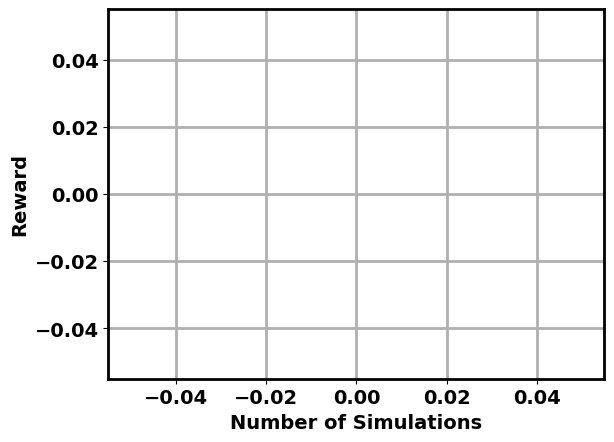

In [ ]:
""" Load reward buffer to plot reward vs simulations """
num_steps = 5000

with open('/content/ldo/saved_memories/rews_buf_GraphLDO.npy', 'rb') as memory_file:
    rews_buf = np.load(memory_file)

rews_buf = rews_buf[:num_steps]

""" Result visualizations and save these as pictures """
# plot average reward
window = 50
avg_rewards=[]
for k in range(len(rews_buf)):
    if k >= window:
        avg_reward = np.mean(rews_buf[k-window:k])
    else:
        avg_reward = np.inf
    avg_rewards.append(avg_reward)

plt.figure('Reward')
plt.plot(avg_rewards, 'b')
plt.xlabel('Number of Simulations', fontweight='bold', fontsize=14)
plt.xticks(fontsize=14, weight='bold')
plt.ylabel('Reward', fontweight='bold', fontsize=14)
plt.yticks(fontsize=14, fontweight='bold')
plt.grid(linewidth=2)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)

# Folded Cascode LDO

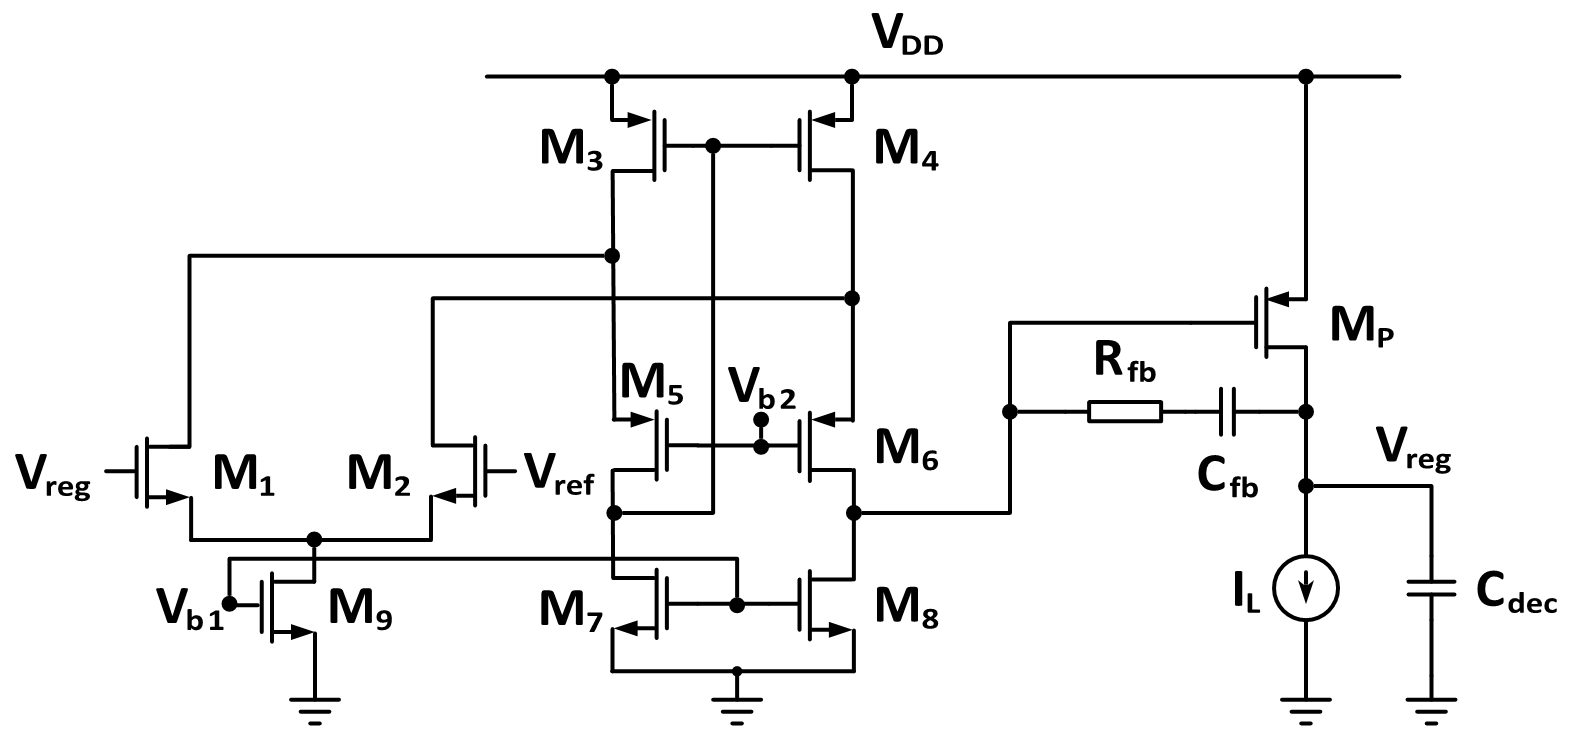

## Setup Spice Simulation

### Write Netlist

In [ ]:
%%writefile /content/ldo/simulations/ldo_folded_cascode_tb.spice
** sch_path: /content/ldo/xschem/ldo_folded_cascode_tb.sch
**.subckt ldo_folded_cascode_tb Vreg Vreg1
*.opin Vreg
*.opin Vreg1

.lib "/content/IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/models/cornerMOSlv.lib" mos_tt
.lib "/content/IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/models/cornerRES.lib" res_typ
.lib "/content/IHP-Open-PDK/ihp-sg13g2/libs.tech/ngspice/models/cornerCAP.lib" cap_typ



Vref Vref GND Vref
.save i(vref)
IL Vreg net2 dc IL PULSE(10u IL 0 10n 10n 50u 100u 0)
Vdd Vdd GND ac 1 dc Vdd
.save i(vdd)

**XCL Vreg GND sky130_fd_pr__cap_mim_m3_1 W=30 L=30 MF=M_CL m=M_CL
XCL Vreg GND cap_cmim cap_cmim W=60e-06 L=60e-06 MF=M_CL m=M_CL

Rdummy net2 GND 1 m=1
x1 Vdd Vreg net1 Vref net5 GND Vreg ldo_folded_cascode
Vref1 Vref1 GND Vref
.save i(vref1)
IL1 Vreg1 net3 dc IL PULSE(10u IL 0 10n 10n 50u 100u 0)
Vdd2 Vdd1 GND Vdd
.save i(vdd2)

**XCL1 Vreg1 GND sky130_fd_pr__cap_mim_m3_1 W=30 L=30 MF=M_CL m=M_CL
XCL1 Vreg1 GND cap_cmim cap_cmim W=60e-06 L=60e-06 MF=M_CL m=M_CL

Rdummy1 net3 GND 1 m=1
x2 Vdd1 net4 net6 Vref1 net7 GND Vreg1 ldo_folded_cascode
Vprobe2 probe net4 dc 0
.save i(vprobe2)
Vprobe1 probe Vreg1 dc 0 ac 1
.save i(vprobe1)
Iprobe1 GND probe dc 0 ac 0
Vb2 net1 GND Vb2
.save i(vb2)
Vb1 net5 GND Vb1
.save i(vb1)
Vb4 net6 GND Vb2
.save i(vb4)
Vb3 net7 GND Vb1
.save i(vb3)
**** begin user architecture code



.include /content/ldo/simulations/ldo_folded_cascode_tb_vars.spice

**.nodeset v(Vreg)=1.8
**.nodeset v(Vreg1)=1.8
.nodeset v(Vreg)=1.2
.nodeset v(Vreg1)=1.2



.control
* save all voltage and current
save all
.options savecurrents
set filetype=ascii
set units=degrees

********************Vikas Added control *********
pre_osdi /content/psp103_nqs.osdi

********************** From Boris File***********

.include /content/ldo/simulations/ldo_folded_cascode_tb_analysis.spice
.endc

.param mc_mm_switch=0
.param mc_pr_switch=0
**.include /usr/local/share/pdk/sky130A/libs.tech/ngspice/corners/tt.spice
**.include /usr/local/share/pdk/sky130A/libs.tech/ngspice/r+c/res_typical__cap_typical.spice
**.include /usr/local/share/pdk/sky130A/libs.tech/ngspice/r+c/res_typical__cap_typical__lin.spice
**.include /usr/local/share/pdk/sky130A/libs.tech/ngspice/corners/tt/specialized_cells.spice



**** end user architecture code
**.ends

* expanding   symbol:  ldo_folded_cascode.sym # of pins=7
** sym_path: /fs1/eecg/tcc/lizongh2/sky130_ldo/xschem/ldo_folded_cascode.sym
** sch_path: /fs1/eecg/tcc/lizongh2/sky130_ldo/xschem/ldo_folded_cascode.sch
.subckt ldo_folded_cascode Vdd Vfb Vb2 Vref Vb1 Vss Vreg
*.iopin Vss
*.opin Vreg
*.iopin Vref
*.ipin Vdd
*.iopin Vfb
*.iopin Vb2
*.iopin Vb1


**XM10 Vreg net1 Vdd Vdd sky130_fd_pr__pfet_g5v0d10v5 L=L_pass W=W_pass nf=1 ad='int((nf+1)/2) * W/nf * 0.29'

XM10 Vreg net1 Vdd Vdd sg13_lv_pmos L=L_pass W=W_pass mfact=M_Pass ng=1 ad='int((ng+1)/2) * W/ng * 0.29'
+ as='int((ng+2)/2) * W/ng * 0.29' pd='2*int((ng+1)/2) * (W/ng + 0.29)' ps='2*int((ng+2)/2) * (W/ng + 0.29)'
+ nrd='0.29 / W' nrs='0.29 / W' sa=0 sb=0 sd=0 mult=M_pass m=M_pass


x1 Vdd Vb2 Vfb Vref net1 Vb1 Vss diff_pair_folded_cascode

**XCfb net2 Vreg sky130_fd_pr__cap_mim_m3_1 W=10 L=10 MF=M_Cfb m=M_Cfb
XCfb net2 Vreg cap_cmim W=60e-06 L=60e-06 MF=M_Cfb m=M_Cfb

**REPLACED RESISTOR model below ** Rsil Model**
**XRfb net2 net1 Vss sky130_fd_pr__res_high_po_0p35 L=3 mult=M_Rfb m=M_Rfb
XRfb net2 net1 rsil w=2.5e-6 l=0.25e-5 m=M_Rfb R=7.0 Imax=0.3e-6
.ends


* expanding   symbol:  diff_pair_folded_cascode.sym # of pins=7
** sym_path: /fs1/eecg/tcc/lizongh2/sky130_ldo/xschem/diff_pair_folded_cascode.sym
** sch_path: /fs1/eecg/tcc/lizongh2/sky130_ldo/xschem/diff_pair_folded_cascode.sch
.subckt diff_pair_folded_cascode Vdd Vb2 vinp vinm vout Vb1 Vss
*.iopin Vdd
*.ipin vinm
*.ipin vinp
*.iopin Vb1
*.iopin Vss
*.iopin Vb2
*.opin vout


**original on line below
**XM1 net2 vinp net4 Vss sky130_fd_pr__nfet_g5v0d10v5 L=L_M1 W=W_M1 nf=1 ad='int((nf+1)/2) * W/nf * 0.29'

XM1 net2 vinp net4 Vss sg13_lv_nmos L=L_M1 W=W_M1 ng=1 ad='int((ng+1)/2) * W/ng * 0.29'
+ as='int((ng+2)/2) * W/ng * 0.29' pd='2*int((ng+1)/2) * (W/ng + 0.29)' ps='2*int((ng+2)/2) * (W/ng + 0.29)'
+ nrd='0.29 / W' nrs='0.29 / W' sa=0 sb=0 sd=0 mult=1 m=1

**original on line below
**XM2 net3 vinm net4 Vss sky130_fd_pr__nfet_g5v0d10v5 L=L_M2 W=W_M2 nf=1 ad='int((nf+1)/2) * W/nf * 0.29'

XM2 net3 vinm net4 Vss sg13_lv_nmos L=L_M2 W=W_M2 ng=1 ad='int((ng+1)/2) * W/ng * 0.29'
+ as='int((ng+2)/2) * W/ng * 0.29' pd='2*int((ng+1)/2) * (W/ng + 0.29)' ps='2*int((ng+2)/2) * (W/ng + 0.29)'
+ nrd='0.29 / W' nrs='0.29 / W' sa=0 sb=0 sd=0 mult=1 m=1

**original on line below
**XM4 net3 net1 Vdd Vdd sky130_fd_pr__pfet_g5v0d10v5 L=L_M4 W=W_M4 nf=1 ad='int((nf+1)/2) * W/nf * 0.29'

XM4 net3 net1 Vdd Vdd sg13_lv_pmos L=L_M4 W=W_M4 ng=1 ad='int((ng+1)/2) * W/ng * 0.29'
+ as='int((ng+2)/2) * W/ng * 0.29' pd='2*int((ng+1)/2) * (W/ng + 0.29)' ps='2*int((ng+2)/2) * (W/ng + 0.29)'
+ nrd='0.29 / W' nrs='0.29 / W' sa=0 sb=0 sd=0 mult=1 m=1

**original on line below
**XM3 net2 net1 Vdd Vdd sky130_fd_pr__pfet_g5v0d10v5 L=L_M3 W=W_M3 nf=1 ad='int((nf+1)/2) * W/nf * 0.29'

XM3 net2 net1 Vdd Vdd sg13_lv_pmos L=L_M3 W=W_M3 ng=1 ad='int((ng+1)/2) * W/ng * 0.29'
+ as='int((ng+2)/2) * W/ng * 0.29' pd='2*int((ng+1)/2) * (W/ng + 0.29)' ps='2*int((ng+2)/2) * (W/ng + 0.29)'
+ nrd='0.29 / W' nrs='0.29 / W' sa=0 sb=0 sd=0 mult=1 m=1


**original on line below
**XM9 net4 Vb1 Vss Vss sky130_fd_pr__nfet_g5v0d10v5 L=L_M9 W=W_M9 nf=1 ad='int((nf+1)/2) * W/nf * 0.29'

XM9 net4 Vb1 Vss Vss sg13_lv_nmos L=L_M9 W=W_M9 ng=1 ad='int((ng+1)/2) * W/ng * 0.29'
+ as='int((ng+2)/2) * W/ng * 0.29' pd='2*int((ng+1)/2) * (W/ng + 0.29)' ps='2*int((ng+2)/2) * (W/ng + 0.29)'
+ nrd='0.29 / W' nrs='0.29 / W' sa=0 sb=0 sd=0 mult=1 m=1

**original on line below
**XM6 vout Vb2 net3 Vdd sky130_fd_pr__pfet_g5v0d10v5 L=L_M6 W=W_M6 nf=1 ad='int((nf+1)/2) * W/nf * 0.29'

XM6 vout Vb2 net3 Vdd sg13_lv_pmos L=L_M6 W=W_M6 ng=1 ad='int((ng+1)/2) * W/ng * 0.29'
+ as='int((ng+2)/2) * W/ng * 0.29' pd='2*int((ng+1)/2) * (W/ng + 0.29)' ps='2*int((ng+2)/2) * (W/ng + 0.29)'
+ nrd='0.29 / W' nrs='0.29 / W' sa=0 sb=0 sd=0 mult=1 m=1

**original on line below
**XM5 net1 Vb2 net2 Vdd sky130_fd_pr__pfet_g5v0d10v5 L=L_M5 W=W_M5 nf=1 ad='int((nf+1)/2) * W/nf * 0.29'

XM5 net1 Vb2 net2 Vdd sg13_lv_pmos L=L_M5 W=W_M5 ng=1 ad='int((ng+1)/2) * W/ng * 0.29'
+ as='int((ng+2)/2) * W/ng * 0.29' pd='2*int((ng+1)/2) * (W/ng + 0.29)' ps='2*int((ng+2)/2) * (W/ng + 0.29)'
+ nrd='0.29 / W' nrs='0.29 / W' sa=0 sb=0 sd=0 mult=1 m=1

**original on line below
**XM7 net1 Vb1 Vss Vss sky130_fd_pr__nfet_g5v0d10v5 L=L_M7 W=W_M7 nf=1 ad='int((nf+1)/2) * W/nf * 0.29'

XM7 net1 Vb1 Vss Vss sg13_lv_nmos L=L_M7 W=W_M7 ng=1 ad='int((ng+1)/2) * W/ng * 0.29'
+ as='int((ng+2)/2) * W/ng * 0.29' pd='2*int((ng+1)/2) * (W/ng + 0.29)' ps='2*int((ng+2)/2) * (W/ng + 0.29)'
+ nrd='0.29 / W' nrs='0.29 / W' sa=0 sb=0 sd=0 mult=1 m=1

**original on line below
**XM8 vout Vb1 Vss Vss sky130_fd_pr__nfet_g5v0d10v5 L=L_M8 W=W_M8 nf=1 ad='int((nf+1)/2) * W/nf * 0.29'

XM8 vout Vb1 Vss Vss sg13_lv_nmos L=L_M8 W=W_M8 ng=1 ad='int((ng+1)/2) * W/ng * 0.29'
+ as='int((ng+2)/2) * W/ng * 0.29' pd='2*int((ng+1)/2) * (W/ng + 0.29)' ps='2*int((ng+2)/2) * (W/ng + 0.29)'
+ nrd='0.29 / W' nrs='0.29 / W' sa=0 sb=0 sd=0 mult=1 m=1
.ends

.GLOBAL GND
.end


Overwriting /content/ldo/simulations/ldo_folded_cascode_tb.spice


### Spice Params
Circuit variables `ldo_folded_cascode_tb_analysis.spice`. The number provided below is the optimal design generated from our training, you may have a different optimal design generated from your training session.

In [ ]:
%%writefile /content/ldo/simulations/ldo_folded_cascode_tb_vars.spice
.param W_M1=8e-6 L_M1=1.2e-6
.param W_M2=W_M1 L_M2=L_M1
.param W_M3=12e-6 L_M3=1.2e-6
.param W_M4=W_M3 L_M4=L_M3
.param W_M5=6e-6 L_M5=1.2e-6
.param W_M6=W_M5 L_M6=L_M5
.param W_M7=7e-6 L_M7=1.2e-6
.param W_M8=W_M7 L_M8=L_M7
.param W_M9=14e-6 L_M9=1.2e-6
.param W_pass=1500e-6 L_pass=0.26e-6 M_pass=200
.param Vb1=0.370
.param Vb2=0.670
.param M_Rfb=1
.param M_Cfb=5
.param M_CL=10
.param Vdd=1.8
.param Vref=1.2
.param IL=1m


Overwriting /content/ldo/simulations/ldo_folded_cascode_tb_vars.spice


### Spice Testbench Analysis
Simulation setups for the circuit `ldo_folded_cascode_tb_analysis.spice`.

In [ ]:
%%writefile /content/ldo/simulations/ldo_folded_cascode_tb_analysis.spice
* high precision simulation
*.OPTIONS maxord=1
.OPTIONS itl1=200
.OPTIONS itl2=200
.OPTIONS itl4=200

* Loop stability
* http://education.ingenazure.com/ac-stability-analysis-ngspice/
alter IL1 dc=10u
let runs=2
let run=0

alter @Vprobe1[acmag]=1
alter @Iprobe1[acmag]=0

dowhile run<runs
set run=$&run
set temp=27

ac dec 10 1 10G

alter @Vprobe1[acmag]=0
alter @Iprobe1[acmag]=1

let run=run+1
end

let ip11 = ac1.i(Vprobe1)
let ip12 = ac1.i(Vprobe2)
let ip21 = ac2.i(Vprobe1)
let ip22 = ac2.i(Vprobe2)
let vprb1 = ac1.v(probe)
let vprb2 = ac2.v(probe)

*** Middlebrook
let mb = 1/(vprb1+ip22)-1
*** Tian that is preferred
let av = 1/(1/(2*(ip11*vprb2-vprb1*ip21)+vprb1+ip21)-1)

plot vdb(mb) vp(mb)
plot vdb(av) vp(av)

wrdata /content/ldo/simulations/ldo_folded_cascode_tb_loop_gain_minload mag(av) vp(av)

* at max load
reset all
alter IL1 dc=10m
let runs=2
let run=0

alter @Vprobe1[acmag]=1
alter @Iprobe1[acmag]=0

dowhile run<runs
set run=$&run
set temp=27

ac dec 10 1 10G

alter @Vprobe1[acmag]=0
alter @Iprobe1[acmag]=1

let run=run+1
end

let ip11 = ac3.i(Vprobe1)
let ip12 = ac3.i(Vprobe2)
let ip21 = ac4.i(Vprobe1)
let ip22 = ac4.i(Vprobe2)
let vprb1 = ac3.v(probe)
let vprb2 = ac4.v(probe)

*** Middlebrook
let mb = 1/(vprb1+ip22)-1
*** Tian that is preferred
let av = 1/(1/(2*(ip11*vprb2-vprb1*ip21)+vprb1+ip21)-1)

plot vdb(mb) vp(mb)
plot vdb(av) vp(av)

wrdata /content/ldo/simulations/ldo_folded_cascode_tb_loop_gain_maxload mag(av) vp(av)

* DC sweep
dc Vdd 1 2.5 0.01
plot v(Vdd) v(Vreg)
wrdata /content/ldo/simulations/ldo_folded_cascode_tb_dc v(Vreg)

* Transient analysis with load regulation
* do not miss the space between the square bracket and number
tran 10n 100u
plot @Rdummy[i]
plot Vreg
wrdata /content/ldo/simulations/ldo_folded_cascode_tb_load_reg Vreg
wrdata /content/ldo/simulations/ldo_folded_cascode_tb_load_reg_current @Rdummy[i]


* Transient analysis with line regulation
* at minimum load current 10uA
*alter @IL[PULSE] [ 10u 10u 0 10n 10n 100u 100u 0 ]
*alter @Vdd[PULSE] [ 2 3 0 1u 1u 25u 50u 0 ]
*tran 10n 100u
*plot Vdd
*plot @Rdummy[i]
*plot Vreg
*wrdata /content/ldo/simulations/ldo_folded_cascode_tb_line_reg_minload Vreg
*wrdata /content/ldo/simulations/ldo_folded_cascode_tb_line_reg_Vdd Vdd

* at maximum load current 10mA
*alter @IL[PULSE] [ 10m 10m 0 10n 10n 100u 100u 0 ]
*tran 10n 100u
*plot @Rdummy[i]
*plot Vreg
*wrdata /content/ldo/simulations/ldo_folded_cascode_tb_line_reg_maxload Vreg

* PSRR with max load
alter Vdd ac=1
alter Vprobe1 ac=0
ac dec 10 1 10G
plot vdb(Vreg)
wrdata /content/ldo/simulations/ldo_folded_cascode_tb_psrr_maxload mag(Vreg) vp(Vreg)

* PSRR with min load
alter IL dc=10u
ac dec 10 1 10G
plot vdb(Vreg)
wrdata /content/ldo/simulations/ldo_folded_cascode_tb_psrr_minload mag(Vreg) vp(Vreg)

* OP
op
alter IL dc=10u
.include /content/ldo/simulations/ldo_folded_cascode_tb_dev_params.spice

Overwriting /content/ldo/simulations/ldo_folded_cascode_tb_analysis.spice


### Class GraphLDOFoldedCascode ckt_graphs.py
Class `GraphLDOFoldedCascode` to define the circuit and specifications. We used the same reward and specifications for this LDO.

In [ ]:
class GraphLDOFoldedCascode:
    # here is the description for the two-stage op-amp
    """

        Here is a graph discription for the folded cascode EA LDO:


                                     Vdd
      ___________________________________________________________________________________________________________________
                                                                            |                |                          |
                                                                            |                |                          |
                                                                            M3---------------M4                         |
                             |----------------------------------------------|     |          |                          |
                             |             |--------------------------------|-----|----------|                          |
                             |             |                               M5-----|---Vb2---M6                          |
                             |             |                                |_____|          |                          |
                        Vreg-M1__________M2-Vref                            |                |-------------------------M10
                                     |                                      M7------Vb1-----M8       |_Rfb__Cfb__|--------------------------------Vreg
          Vb1-----------------------M9                                      |                |                                |            |
                                     |                                      |                |                                CL          IL
      ----------------------------------------------------------------------------------------------------------------------------------------------
                                      GND



    node 0 will be M1
    node 1 will be M2
    node 2 will be M3
    node 3 will be M4
    node 4 will be M5
    node 5 will be M6
    node 6 will be M7
    node 7 will be M8
    node 8 will be M9
    node 9 will be M10
    node 10 will be Vb1
    node 11 will be Vb2
    node 12 will be Rfb
    node 13 will be Cfb
    node 14 will be CL decap
    node 15 will be Vdd
    node 16 will be GND

    """
    def __init__(self):
        # self.device = torch.device(
        #     "cuda:0" if torch.cuda.is_available() else "cpu"
        # )

        self.device = torch.device(
           "cpu"
        )

        self.ckt_hierarchy = (('M1','x1.x1.XM1','lv_nmos','m'),
                      ('M2','x1.x1.XM2','lv_nmos','m'),
                      ('M3','x1.x1.XM3','lv_pmos','m'),
                      ('M4','x1.x1.XM4','lv_pmos','m'),
                      ('M5','x1.x1.XM5','lv_pmos','m'),
                      ('M6','x1.x1.XM6','lv_pmos','m'),
                      ('M7','x1.x1.XM7','lv_nmos','m'),
                      ('M8','x1.x1.XM8','lv_nmos','m'),
                      ('M9','x1.x1.XM9','lv_nmos','m'),
                      ('M10','x1.XM10','lv_pmos','m'),
                      ('Vb1','','Vb1','v'),
                      ('Vb2','','Vb2','v'),

                      ('Cfb','x1.XCfb','cap_cmim','c'),
                      ('CL','XCL','cap_cmim','c')
                     )

        self.op = {'M1':{},
                'M2':{},
                'M3':{},
                'M4':{},
                'M5':{},
                'M6':{},
                'M7':{},
                'M8':{},
                'M9':{},
                'M10':{},
                'Vb1':{},
                'Vb2':{},

                'Cfb':{},
                'CL':{}
                 }

        self.edge_index = torch.tensor([
          [0,1], [1,0], [0,2], [2,0], [0,4], [4,0], [0,8], [8,0], [0,9], [9,0], [0,13], [13,0], [0,14], [14,0],
          [1,3], [3,1], [1,5], [5,1], [1,8], [8,1],
          [2,3], [3,2], [2,4], [4,2], [2,6], [6,2], [2,15], [15,2],
          [3,4], [4,3], [3,5], [5,3], [3,6], [6,3], [3,15], [15,3],
          [4,5], [5,4], [4,6], [6,4], [4,11], [11,4],
          [5,7], [7,5], [5,9], [9,5], [5,11], [11,5], [5,12], [12,5],
          [6,7], [7,6], [6,8], [8,6], [6,10], [10,6], [6,16], [16,6],
          [7,9], [9,7], [7,12], [12,7], [7,8], [8,7], [7,16], [16,7],
          [8,10], [10,8], [8,16], [16,8],
          [9,12], [12,9], [9,13], [13,9], [9,14], [14,9], [9,15], [15,9],
          [12,13], [13,12],
          [13,14], [14,13],
          [14,16], [16,14],
            ], dtype=torch.long).t().to(self.device)

        # sorted based on if it is the small signal path
        # small signal path: 0; biasing path: 1
        self.edge_type = torch.tensor([
            0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 1, 1,
            0, 0, 0, 0, 0, 0, 1, 1,
            0, 0, 0, 0, 0, 0, 1, 1,
            1, 1, 0, 0, 1, 1,
            0, 0, 0, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 1, 1, 1,
            0, 0, 0, 0, 1, 1, 1, 1,
            1, 1, 1, 1,
            0, 0, 0, 0, 0, 0, 1, 1,
            0, 0,
            0, 0,
            1, 1,
            ]).to(self.device)

        self.num_relations = 2
        self.num_nodes = 17
        self.num_node_features = 14
        self.obs_shape = (self.num_nodes, self.num_node_features)

        """Select an action from the input state."""

        L_CL = 30e-6 # each unit cap is 30um by 30um
        W_CL = 30e-6
        M_CL_low = 20
        M_CL_high = 300 # copies of unit cap
        ########Calculation of CL based on PSP capacitance calculaion -Ctotal= L_CL*W_CL*1.5e-3+2(L_CL+W_CL)*0.40e-12) - Cunit =1.5e-3
        self.CL_low = M_CL_low * (L_CL*W_CL*1.5e-3+2*(L_CL+W_CL)*40e-12)
        self.CL_high = M_CL_high * (L_CL*W_CL*1.5e-3+2*(L_CL+W_CL)*40e-12)

        self.W_Rfb = 2e-6 # W: 5um
        self.L_Rfb = 0.25e-6 # L: 3um
        M_Rfb_low = 1
        M_Rfb_high = 50
        self.Rsheet = 7
        self.Rfb_low =  self.Rsheet * self.L_Rfb / self.W_Rfb / M_Rfb_high
        self.Rfb_high = self.Rsheet * self.L_Rfb / self.W_Rfb / M_Rfb_low

        W_Cfb = 30e-6
        L_Cfb = 30e-6
        M_Cfb_low = 1
        M_Cfb_high = 20
        self.Cfb_low = M_Cfb_low * (L_Cfb*W_Cfb*2e-15+(L_Cfb+W_Cfb)*0.38e-15)
        self.Cfb_high = M_Cfb_high * (L_Cfb*W_Cfb*2e-15+(L_Cfb+W_Cfb)*0.38e-15)

        # self.action_space_low = np.array([ 0.5e-6, 0.26e-6, #M1 width,length in microns
        #                                   0.5e-6, 0.26e-6, #M3 width,length in microns
        #                                   0.5e-6, 0.26e-6, #M5 width,length in microns
        #                                   0.5e-6, 0.26e-6, #M7 width,length in microns
        #                                   0.5e-6, 0.26e-6, #M9 width,length in microns
        #                                   500e-6, 0.26e-6, 100, #M10 (width, length, multiplier) in micron
        #                                   0.2, 0.1, # Vb1, Vb2,
        #                                   M_Rfb_low, #Rfb
        #                                   M_Cfb_low, #Cfb
        #                                   M_CL_low]) # CL

        # self.action_space_high = np.array([100e-6, 4e-6, #M1 width,length in microns
        #                                   100e-6, 4e-6, #M3 width,length in microns
        #                                   100e-6, 4e-6, #M5 width,length in microns
        #                                   100e-6, 4e-6, #M7 width,length in microns
        #                                   100e-6, 4e-6, #M9 width,length in microns
        #                                   5000e-6, 2e-6, 2000, #M10 (width, length, multiplier) in micron
        #                                   1.6, 1.2, # Vb1, Vb2,
        #                                   M_Rfb_high,
        #                                   M_Cfb_high,
        #                                   M_CL_high])

        ## Real code above, test code below
        self.action_space_low = np.array([ 4e-6, 0.52e-6, #M1 width,length in microns
                                          6e-6, 0.52e-6, #M3 width,length in microns
                                          3e-6, 0.52e-6, #M5 width,length in microns
                                          4e-6, 0.52e-6, #M7 width,length in microns
                                          7e-6, 0.52e-6, #M9 width,length in microns
                                          1000e-6, 0.26e-6, 100, #M10 (width, length, multiplier) in micron
                                          0.2, 0.4, # Vb1, Vb2,
                                          M_Rfb_low, #Rfb
                                          M_Cfb_low, #Cfb
                                          M_CL_low]) # CL

        self.action_space_high = np.array([12e-6, 2.6e-6, #M1 width,length in microns
                                          18e-6, 2.6e-6, #M3 width,length in microns
                                          9e-6, 2.6e-6, #M5 width,length in microns
                                          11e-6, 2.6e-6, #M7 width,length in microns
                                          21e-6, 2.6e-6, #M9 width,length in microns
                                          2000e-6, 2.6e-6, 200, #M10 (width, length, multiplier) in micron
                                          0.5, 1.0, # Vb1, Vb2,
                                          M_Rfb_high,
                                          M_Cfb_high,
                                          M_CL_high])

        self.action_dim = len(self.action_space_low)
        self.action_shape = (self.action_dim,)

        """Some target specifications for the final design"""
        self.Vdrop_target = 0.6  # drop-out voltage

        self.PSRR_target_1kHz = 10**(-30/20) # in linear scale, equals -30dB
        self.PSRR_target_10kHz = 10**(-30/20) # in linear scale, equals -30dB
        self.PSRR_target_1MHz =  10**(-20/20) # in linear scale, equals -20dB
        self.PSRR_target_above_1MHz =  10**(-5/20) # in linear scale, equals -5dB
        self.PSRR_1kHz = 1e3 #  from DC to 1kHz
        self.PSRR_10kHz = 1e4 #  from DC to 10kHz
        self.PSRR_1MHz = 1e6  # from DC to 1 MHz

        self.phase_margin_target = 60 # 60 degree PM minimum, this is for the loop-gain
        self.Vreg = 1.2 # regulated output
        self.Vref = 1.2
        self.GND = 0
        self.Vdd = 1.8

        self.Vload_reg_delta_target = self.Vreg * 0.02 # load regulartion variation is at most 2% of Vreg when it is switched from ILmin to ILmax
        self.Iq_target = 300e-6 #quiescent current maximum
        self.Vline_reg_delta_target =  self.Vreg * 0.02  # line reg voltage to be around at most 2% of Vreg when it is at both ILmin and ILmax

### Generate scripts
Generate the scripts to automatically extrac transistor's attributes during the `OP` analysis.

In [ ]:
ckt_hierarchy = GraphLDOFoldedCascode().ckt_hierarchy
dev_params_script = DeviceParams(ckt_hierarchy).gen_dev_params(file_name=f'{SPICE_NETLIST_DIR}/ldo_folded_cascode_tb_op')

with open(f'{SPICE_NETLIST_DIR}/ldo_folded_cascode_tb_dev_params.spice', 'w') as f:
    for line in dev_params_script:
        f.write(f'{line}\n')

### Test LDO in ngspice

In [ ]:
!ngspice -b /content/ldo/simulations/ldo_folded_cascode_tb.spice


Note: No compatibility mode selected!


Circuit: ** sch_path: /content/ldo/xschem/ldo_folded_cascode_tb.sch

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using SPARSE 1.3 as Direct Linear Solver
Note: il: dc value used for op instead of transient time=0 value.
Note: Starting dynamic gmin stepping
Note: Dynamic gmin stepping completed

No. of Data Rows : 101
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using SPARSE 1.3 as Direct Linear Solver
Note: il: dc value used for op instead of transient time=0 value.
Note: Starting dynamic gmin stepping
Note: Dynamic gmin stepping completed
 Reference value :  1.00000e+00
No. of Data Rows : 101

    You may use Gnuplot instead.


    You may use Gnuplot instead.

reset: too many args.
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Using SPARSE 1.3 as Direct Linear Solver
Note: il1: dc value used for op instead of transient time=0 value.
Note: il: dc value used for op instead of transient time=0 value.
Note: Star

### Output Parser

"\nline_reg_minload_results = sim_results.tran(file_name='ldo_folded_cascode_tb_line_reg_minload')\nline_reg_maxload_results = sim_results.tran(file_name='ldo_folded_cascode_tb_line_reg_maxload')\nline_reg_Vdd_results = sim_results.tran(file_name='ldo_folded_cascode_tb_line_reg_Vdd')\n\ntime = 1e6 * np.array(line_reg_minload_results[0])\nload_reg_minload = line_reg_minload_results[1]\nload_reg_maxload = line_reg_maxload_results[1]\nline_reg_Vdd = line_reg_Vdd_results[1]\n\nplt.figure('Line Reg Minload')\nfig, axs = plt.subplots(2)\naxs[0].plot(time, line_reg_Vdd, 'b', label='$V_{DD}$')\naxs[0].set_ylabel('$\\mathbf{V_{DD}}$ (V)', fontweight='bold', fontsize=14)\naxs[0].xaxis.set_tick_params(labelsize='14')\naxs[0].yaxis.set_tick_params(labelsize='14')\naxs[0].spines['bottom'].set_linewidth(2)\naxs[0].spines['left'].set_linewidth(2)\naxs[0].spines['right'].set_linewidth(2)\naxs[0].spines['top'].set_linewidth(2)\naxs[0].grid(linewidth=2)\n\naxs[1].plot(time, load_reg_minload, 'b', label=

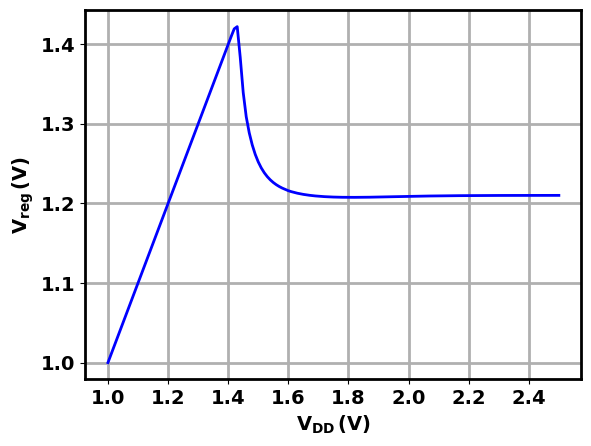

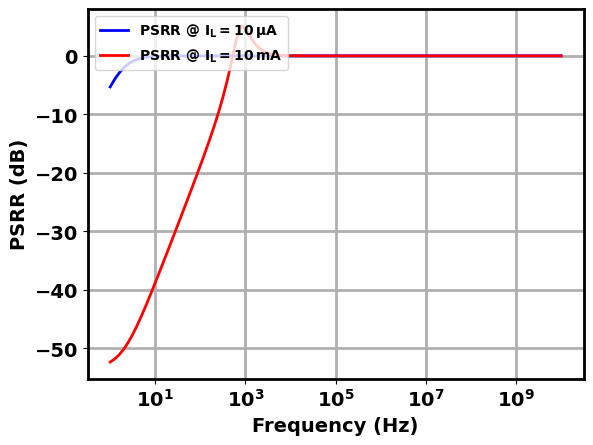

<Figure size 640x480 with 0 Axes>

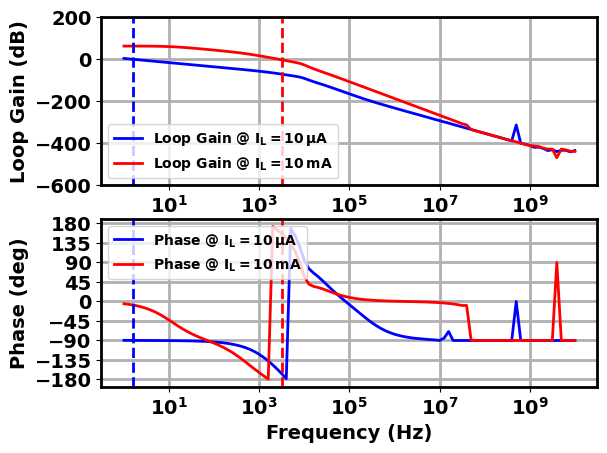

<Figure size 640x480 with 0 Axes>

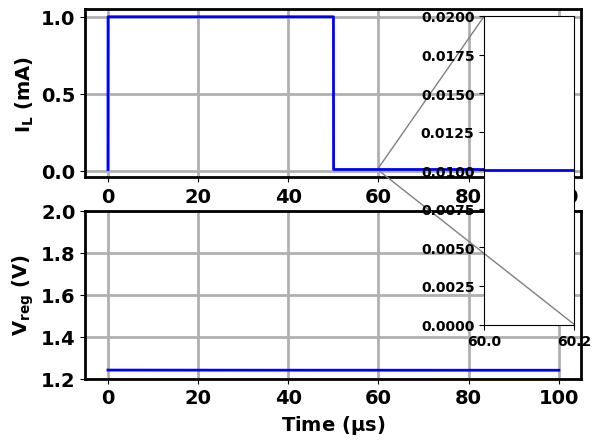

In [ ]:
sim_results = OutputParser(GraphLDOFoldedCascode())
dc_results = sim_results.dc(file_name='ldo_folded_cascode_tb_dc')

# plot DC response
plt.figure('DC')
Vin = dc_results[0]
Vout = [max(dc_results[1][i], 0) for i in range(len(dc_results[1]))]
plt.plot(Vin, Vout, 'b')
plt.xlabel('$\mathbf{V_{DD}\,(V)}$', fontweight='bold', fontsize=14)
plt.xticks(fontsize=14, weight='bold')
plt.ylabel('$\mathbf{V_{reg}\,(V)}$', fontweight='bold', fontsize=14)
plt.yticks(fontsize=14, fontweight='bold')
plt.grid(linewidth=2)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)

# plot PSRR AC response
psrr_results_minload = sim_results.ac(file_name='ldo_folded_cascode_tb_psrr_minload')
psrr_results_maxload = sim_results.ac(file_name='ldo_folded_cascode_tb_psrr_maxload')
freq = psrr_results_minload[0]
psrr_minload = 20*np.log10(psrr_results_minload[1])
psrr_maxload = 20*np.log10(psrr_results_maxload[1])

plt.figure('PSRR')
plt.plot(freq, psrr_minload, 'b', label='PSRR @ $\mathbf{I_{L}=10\,\mu A}$')
plt.plot(freq, psrr_maxload, 'r', label='PSRR @ $\mathbf{I_{L}=10\,mA}$')
plt.xlabel('Frequency (Hz)', fontweight='bold', fontsize=14)
plt.xticks(fontsize=14, weight='bold')
plt.ylabel('PSRR (dB)', fontweight='bold', fontsize=14)
plt.yticks(fontsize=14, fontweight='bold')
plt.legend(loc='upper left', prop=dict(weight='bold'))
plt.grid(linewidth=2)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.set_xscale('log')

# plot loop stability
loop_gain_minload_results = sim_results.ac(file_name='ldo_folded_cascode_tb_loop_gain_minload')
freq = loop_gain_minload_results[0]
loop_gain_minload = 20*np.log10(loop_gain_minload_results[1])
loop_gain_phase_minload = loop_gain_minload_results[2]
loop_gain_maxload_results = sim_results.ac(file_name='ldo_folded_cascode_tb_loop_gain_maxload')
loop_gain_maxload = 20*np.log10(loop_gain_maxload_results[1])
loop_gain_phase_maxload = loop_gain_maxload_results[2]

plt.figure('Loop Gain')
fig, axs = plt.subplots(2)
axs[0].plot(freq, loop_gain_minload, 'b', label='Loop Gain @ $\mathbf{I_{L}=10\,\mu A}$')
axs[0].plot(freq, loop_gain_maxload, 'r', label='Loop Gain @ $\mathbf{I_{L}=10\,mA}$')
axs[0].set_ylabel('Loop Gain (dB)', fontweight='bold', fontsize=14)
axs[0].xaxis.set_tick_params(labelsize='14')
axs[0].yaxis.set_tick_params(labelsize='14')
axs[0].spines['bottom'].set_linewidth(2)
axs[0].spines['left'].set_linewidth(2)
axs[0].spines['right'].set_linewidth(2)
axs[0].spines['top'].set_linewidth(2)
axs[0].grid(linewidth=2)
axs[0].legend(loc='lower left', prop=dict(weight='bold'))
axs[0].set_yticks(axs[0].get_yticks()[::1])
idx_minload = [i for i in range(len(loop_gain_minload)) if loop_gain_minload[i] <=0][0]
idx_maxload = [i for i in range(len(loop_gain_maxload)) if loop_gain_maxload[i] <=0][0]
axs[0].axvline(x=freq[idx_minload], ls='--', color='b')
axs[0].axvline(x=freq[idx_maxload], ls='--', color='r')
axs[0].set_xscale('log')

axs[1].plot(freq, loop_gain_phase_minload, 'b', label='Phase @ $\mathbf{I_{L}=10\,\mu A}$')
axs[1].plot(freq, loop_gain_phase_maxload, 'r', label='Phase @ $\mathbf{I_{L}=10\,mA}$')
axs[1].set_ylabel('Phase (deg)', fontweight='bold', fontsize=14)
axs[1].xaxis.set_tick_params(labelsize='14')
axs[1].yaxis.set_tick_params(labelsize='14')
axs[1].spines['bottom'].set_linewidth(2)
axs[1].spines['left'].set_linewidth(2)
axs[1].spines['right'].set_linewidth(2)
axs[1].spines['top'].set_linewidth(2)
axs[1].grid(linewidth=2)
axs[1].legend(loc='upper left', prop=dict(weight='bold'))
axs[1].set_yticks(np.array([-180, -135, -90, -45, 0, 45, 90, 135, 180]))
axs[1].axvline(x=freq[idx_minload], ls='--', color='b')
axs[1].axvline(x=freq[idx_maxload], ls='--', color='r')
axs[1].set_xscale('log')
axs[1].set_xlabel('Frequency (Hz)', fontweight='bold', fontsize=14)

# load regulation
load_reg_results = sim_results.tran(file_name='ldo_folded_cascode_tb_load_reg')
time = 1e6 * np.array(load_reg_results[0])
load_reg = load_reg_results[1]
load_reg_current_results = sim_results.tran(file_name='ldo_folded_cascode_tb_load_reg_current')
load_reg_current = 1e3 * np.array(load_reg_current_results[1])

plt.figure('Load Reg')
fig, axs = plt.subplots(2)
axs[0].plot(time, load_reg_current, 'b', label='Load current')
axs[0].set_ylabel('$\mathbf{I_{L}}$ (mA)', fontweight='bold', fontsize=14)
axs[0].xaxis.set_tick_params(labelsize='14')
axs[0].yaxis.set_tick_params(labelsize='14')
axs[0].spines['bottom'].set_linewidth(2)
axs[0].spines['left'].set_linewidth(2)
axs[0].spines['right'].set_linewidth(2)
axs[0].spines['top'].set_linewidth(2)
axs[0].grid(linewidth=2)
axins = zoomed_inset_axes(axs[0], 100, loc=1) # zoom = 100
axins.plot(time, load_reg_current, color='b')
axins.set_xlim(60, 60.2) # Limit the region for zoom
axins.set_ylim(0, 0.02)
mark_inset(axs[0], axins, loc1=2, loc2=4, fc="none", ec="0.5")

axs[1].plot(time, load_reg, 'b', label='Vreg')
axs[1].set_ylabel('$\mathbf{V_{reg}}$ (V)', fontweight='bold', fontsize=14)
axs[1].xaxis.set_tick_params(labelsize='14')
axs[1].yaxis.set_tick_params(labelsize='14')
axs[1].spines['bottom'].set_linewidth(2)
axs[1].spines['left'].set_linewidth(2)
axs[1].spines['right'].set_linewidth(2)
axs[1].spines['top'].set_linewidth(2)
axs[1].grid(linewidth=2)
axs[1].set_yticks(np.array([1.2, 1.4, 1.6, 1.8, 2.0]))
axs[1].set_xlabel('Time ($\mathbf{\mu s}$)', fontweight='bold', fontsize=14)

# line regulation, you can come back to the `ldo_folded_cascode_tb_analysis.spice`
# to enable the line regulation simulations
"""
line_reg_minload_results = sim_results.tran(file_name='ldo_folded_cascode_tb_line_reg_minload')
line_reg_maxload_results = sim_results.tran(file_name='ldo_folded_cascode_tb_line_reg_maxload')
line_reg_Vdd_results = sim_results.tran(file_name='ldo_folded_cascode_tb_line_reg_Vdd')

time = 1e6 * np.array(line_reg_minload_results[0])
load_reg_minload = line_reg_minload_results[1]
load_reg_maxload = line_reg_maxload_results[1]
line_reg_Vdd = line_reg_Vdd_results[1]

plt.figure('Line Reg Minload')
fig, axs = plt.subplots(2)
axs[0].plot(time, line_reg_Vdd, 'b', label='$V_{DD}$')
axs[0].set_ylabel('$\mathbf{V_{DD}}$ (V)', fontweight='bold', fontsize=14)
axs[0].xaxis.set_tick_params(labelsize='14')
axs[0].yaxis.set_tick_params(labelsize='14')
axs[0].spines['bottom'].set_linewidth(2)
axs[0].spines['left'].set_linewidth(2)
axs[0].spines['right'].set_linewidth(2)
axs[0].spines['top'].set_linewidth(2)
axs[0].grid(linewidth=2)

axs[1].plot(time, load_reg_minload, 'b', label='Vreg')
axs[1].set_ylabel('$\mathbf{V_{reg}}$ (V)', fontweight='bold', fontsize=14)
axs[1].xaxis.set_tick_params(labelsize='14')
axs[1].yaxis.set_tick_params(labelsize='14')
axs[1].spines['bottom'].set_linewidth(2)
axs[1].spines['left'].set_linewidth(2)
axs[1].spines['right'].set_linewidth(2)
axs[1].spines['top'].set_linewidth(2)
axs[1].grid(linewidth=2)
axs[1].set_xlabel('Time ($\mathbf{\mu s}$)', fontweight='bold', fontsize=14)

plt.figure('Line Reg Maxload')
fig, axs = plt.subplots(2)
axs[0].plot(time, line_reg_Vdd, 'b', label='$V_{DD}$')
axs[0].set_ylabel('$\mathbf{V_{DD}}$ (V)', fontweight='bold', fontsize=14)
axs[0].xaxis.set_tick_params(labelsize='14')
axs[0].yaxis.set_tick_params(labelsize='14')
axs[0].spines['bottom'].set_linewidth(2)
axs[0].spines['left'].set_linewidth(2)
axs[0].spines['right'].set_linewidth(2)
axs[0].spines['top'].set_linewidth(2)
axs[0].grid(linewidth=2)

axs[1].plot(time, load_reg_maxload, 'b', label='Vreg')
axs[1].set_ylabel('$\mathbf{V_{reg}}$ (V)', fontweight='bold', fontsize=14)
axs[1].xaxis.set_tick_params(labelsize='14')
axs[1].yaxis.set_tick_params(labelsize='14')
axs[1].spines['bottom'].set_linewidth(2)
axs[1].spines['left'].set_linewidth(2)
axs[1].spines['right'].set_linewidth(2)
axs[1].spines['top'].set_linewidth(2)
axs[1].grid(linewidth=2)
axs[1].set_xlabel('Time ($\mathbf{\mu s}$)', fontweight='bold', fontsize=14)
"""

### OP mean and Std

In [ ]:
%%writefile /content/ldo/simulations/ldo_folded_cascode_tb_op_mean_std.json
{"OP_M_mean": {"gmb": 0.00025193620694663964, "gm": 0.0007470884447514287, "gds": 0.15955492259158777, "vdss": 0.30224245936007293, "vth": 0.9545911425579414, "ids": 0.00013245487950278235, "idb": -1.5136372609244624e-11, "isb": -1.5258342672942113e-13, "ibe": 5.3876366651014213e-08, "igidl": 0.0, "igisl": 0.0, "igs": 0.0, "igd": 0.0, "igb": 0.0, "igcs": 0.0, "vsb": -0.15092105898442346, "vgs": 1.3170085079744986, "vds": 0.6036861237364942, "cgg": 1.1501217816935506e-11, "cgs": -5.22280196825814e-12, "cgd": -4.0138097213820005e-12, "cbg": -2.5448338736961174e-12, "cbd": -2.5179305489729453e-12, "cbs": -4.340246130689528e-13, "cdg": -4.325562394919275e-12, "cdd": 4.3683752086402425e-12, "cds": 1.5072135236944852e-12, "csg": -4.630821548320106e-12, "csd": 2.1633650617147026e-12, "css": 4.149613057632612e-12, "cgb": -2.264606127295359e-12, "cdb": -1.5500263374154512e-12, "csb": -1.6821565710272068e-12, "cbb": 5.4967890357380175e-12}, "OP_M_std": {"gmb": 0.00024756528858728226, "gm": 0.0007104729511229423, "gds": 0.7435683027401271, "vdss": 0.17774585049215175, "vth": 0.07721630119732137, "ids": 0.00010601762366679949, "idb": 5.5977070406135605e-11, "isb": 2.480654087132613e-13, "ibe": 4.377011636129801e-07, "igidl": 0.0, "igisl": 0.0, "igs": 0.0, "igd": 0.0, "igb": 0.0, "igcs": 0.0, "vsb": 0.24566216639057203, "vgs": 0.2868046916634973, "vds": 0.5628339054400677, "cgg": 3.516490616546036e-11, "cgs": 1.6528188234740815e-11, "cgd": 1.6745457268941073e-11, "cbg": 9.833992879396874e-12, "cbd": 1.0439776215575249e-11, "cbs": 2.486132451535244e-12, "cdg": 1.5747257535240447e-11, "cdd": 1.8124817907704897e-11, "cds": 4.8886254868342284e-12, "csg": 1.593060616028576e-11, "csd": 9.049686590881142e-12, "css": 1.2977744677620661e-11, "cgb": 9.303863546928554e-12, "cdb": 5.441803240158292e-12, "csb": 5.554343862856118e-12, "cbb": 1.5861121684998846e-11}}

Overwriting /content/ldo/simulations/ldo_folded_cascode_tb_op_mean_std.json


### Set up environment LDOFoldedCascodeEnv
Define the `gymnasium` environment for the circuit.

In [ ]:
CktGraph = GraphLDOFoldedCascode

class LDOFoldedCascodeEnv(gym.Env, CktGraph, DeviceParams):

    def __init__(self):
        gym.Env.__init__(self)
        CktGraph.__init__(self)
        DeviceParams.__init__(self, self.ckt_hierarchy)

        self.CktGraph = CktGraph()
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=self.obs_shape, dtype=np.float64)
        self.action_space = spaces.Box(low=-1, high=1, shape=self.action_shape, dtype=np.float64)

    def _initialize_simulation(self):
        self.W_M1, self.L_M1, \
        self.W_M3, self.L_M3, \
        self.W_M5, self.L_M5, \
        self.W_M7, self.L_M7, \
        self.W_M9, self.L_M9, \
        self.W_pass, self.L_pass, self.M_pass, \
        self.Vb1, self.Vb2,  \
        self.M_Rfb, \
        self.M_Cfb, \
        self.M_CL = \
        np.array([5e-6, 0.26e-6,
                  5e-6, 0.26e-6,
                  5e-6, 0.26e-6,
                  5e-6, 0.26e-6,
                  5e-6, 0.26e-6,
                  1500e-6, 0.26e-6, 125,
                  0.9, 0.35,
                  1,
                  1,
                10])

        """Run the initial simulations."""
        action = np.array([self.W_M1, self.L_M1, \
                self.W_M3, self.L_M3, \
                self.W_M5, self.L_M5, \
                self.W_M7, self.L_M7, \
                self.W_M9, self.L_M9, \
                self.W_pass, self.L_pass, self.M_pass, \
                self.Vb1, self.Vb2, \
                self.M_Rfb, \
                self.M_Cfb, \
                self.M_CL])
        self.do_simulation(action)

    def _do_simulation(self, action: np.array):
        W_M1, L_M1, \
        W_M3, L_M3, \
        W_M5, L_M5, \
        W_M7, L_M7, \
        W_M9, L_M9, \
        W_pass, L_pass, M_pass, \
        Vb1, Vb2, \
        M_Rfb, \
        M_Cfb, \
        M_CL = action

        M_pass = int(M_pass)
        M_Rfb = int(M_Rfb)
        M_Cfb = int(M_Cfb)
        M_CL = int(M_CL)

        # update netlist
        try:
            # open the netlist of the testbench
            ldo_folded_cascode_tb_vars = open(f'{SPICE_NETLIST_DIR}/ldo_folded_cascode_tb_vars.spice', 'r')
            lines = ldo_folded_cascode_tb_vars.readlines()

            lines[0] = f'.param W_M1={W_M1} L_M1={L_M1}\n'
            lines[1] = f'.param W_M2=W_M1 L_M2=L_M1\n'
            lines[2] = f'.param W_M3={W_M3} L_M3={L_M3}\n'
            lines[3] = f'.param W_M4=W_M3 L_M4=L_M3\n'
            lines[4] = f'.param W_M5={W_M5} L_M5={L_M5}\n'
            lines[5] = f'.param W_M6=W_M5 L_M6=L_M5\n'
            lines[6] = f'.param W_M7={W_M7} L_M7={L_M7}\n'
            lines[7] = f'.param W_M8=W_M7 L_M8=L_M7\n'
            lines[8] = f'.param W_M9={W_M9} L_M9={L_M9}\n'
            lines[9] = f'.param W_pass={W_pass} L_pass={L_pass} M_pass={M_pass}\n'
            lines[10] = f'.param Vb1={Vb1}\n'
            lines[11] = f'.param Vb2={Vb2}\n'
            lines[12] = f'.param M_Rfb={M_Rfb}\n'
            lines[13] = f'.param M_Cfb={M_Cfb}\n'
            lines[14] = f'.param M_CL={M_CL}\n'

            lines[16] = f'.param Vref={self.Vref}\n'

            ldo_folded_cascode_tb_vars = open(f'{SPICE_NETLIST_DIR}/ldo_folded_cascode_tb_vars.spice', 'w')
            ldo_folded_cascode_tb_vars.writelines(lines)
            ldo_folded_cascode_tb_vars.close()

            print('*** Simulations for Loop Stability, load regulation, DC and PSRR ***')
            os.system(f'cd {SPICE_NETLIST_DIR}; ngspice -b -o ldo_folded_cascode_tb.log ldo_folded_cascode_tb.spice')
            print('*** Simulations Done! ***')
        except:
            print('ERROR')

    def do_simulation(self, action):
        self._do_simulation(action)
        self.sim_results = OutputParser(self.CktGraph)
        self.op_results = self.sim_results.dcop(file_name='ldo_folded_cascode_tb_op')

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self._initialize_simulation()
        observation = self._get_obs()
        info = self._get_info()
        return observation, info

    def close(self):
        return None

    def step(self, action):
        action = ActionNormalizer(action_space_low=self.action_space_low, action_space_high = \
                                       self.action_space_high).action(action) # convert [-1.1] range back to normal range
        action = action.astype(object)

        print(f"action: {action}")

        self.W_M1, self.L_M1, \
        self.W_M3, self.L_M3, \
        self.W_M5, self.L_M5, \
        self.W_M7, self.L_M7, \
        self.W_M9, self.L_M9, \
        self.W_pass, self.L_pass, self.M_pass, \
        self.Vb1, self.Vb2,  \
        self.M_Rfb, \
        self.M_Cfb, \
        self.M_CL = action

        ''' run simulations '''
        self.do_simulation(action)

        '''get observation'''
        observation = self._get_obs()
        info = self._get_info()

        reward = self.reward

        terminated = False

        print(tabulate(
            [
                ['Drop-out voltage (mV)', self.Vdrop*1e3, self.Vdrop_target*1e3],
                ['Load regulation (mV)', self.Vload_reg_delta*1e3, self.Vload_reg_delta_target*1e3],

                ['PSRR worst maxload (dB) < 10kHz', 20*np.log10(self.PSRR_maxload_worst_10kHz), 20*np.log10(self.PSRR_target_10kHz)],
                ['PSRR worst maxload (dB) < 1MHz', 20*np.log10(self.PSRR_maxload_worst_1MHz), 20*np.log10(self.PSRR_target_1MHz)],
                ['PSRR worst maxload (dB) > 1MHz', 20*np.log10(self.PSRR_maxload_worst_above_1MHz), 20*np.log10(self.PSRR_target_above_1MHz)],

                ['PSRR worst minload (dB) < 10kHz', 20*np.log10(self.PSRR_minload_worst_10kHz), 20*np.log10(self.PSRR_target_10kHz)],
                ['PSRR worst minload (dB) < 1MHz', 20*np.log10(self.PSRR_minload_worst_1MHz), 20*np.log10(self.PSRR_target_1MHz)],
                ['PSRR worst minload (dB) > 1MHz', 20*np.log10(self.PSRR_minload_worst_above_1MHz), 20*np.log10(self.PSRR_target_above_1MHz)],

                ['Loop-gain PM (deg) at max load', self.phase_margin_maxload, self.phase_margin_target],
                ['Loop-gain PM (deg) at min load', self.phase_margin_minload, self.phase_margin_target],

                ['Iq (uA)', self.Iq*1e6, self.Iq_target*1e6],
                ['CL (pF)', self.op_results['CL']['c']*1e12, ''],

                ['Vdrop score', self.Vdrop_score, '0'],
                ['Load regulation score', self.load_reg_score, '0'],

                ['PSRR worst maxload (dB) < 10kHz score', self.PSRR_maxload_worst_10kHz_score, '0'],
                ['PSRR worst maxload (dB) < 1MHz score', self.PSRR_maxload_worst_1MHz_score, '0'],
                ['PSRR worst maxload (dB) > 1MHz score', self.PSRR_maxload_worst_above_1MHz_score, '0'],

                ['PSRR worst minload (dB) < 10kHz score', self.PSRR_minload_worst_10kHz_score, '0'],
                ['PSRR worst minload (dB) < 1MHz score', self.PSRR_minload_worst_1MHz_score, '0'],
                ['PSRR worst minload (dB) > 1MHz score', self.PSRR_minload_worst_above_1MHz_score, '0'],

                ['PM score minload', self.phase_margin_minload_score, '0'],
                ['PM score maxload', self.phase_margin_maxload_score, '0'],
                ['Iq score', self.Iq_score, '0'],

                ['CL area score', self.CL_area_score, '0'],
                ['Reward', reward, '10']
                ],
            headers=['param', 'num', 'target'], tablefmt='orgtbl', numalign='right', floatfmt=".2f"
            ))

        return observation, reward, terminated, False, info

    def _get_obs(self):
        # pick some .OP params from the dict:
        try:
            f = open(f'{SPICE_NETLIST_DIR}/ldo_folded_cascode_tb_op_mean_std.json')
            self.op_mean_std = json.load(f)
            self.op_mean = self.op_mean_std['OP_M_mean']
            self.op_std = self.op_mean_std['OP_M_std']
            self.op_mean = np.array([self.op_mean['ids'], self.op_mean['gm'], self.op_mean['gds'], self.op_mean['vth'], self.op_mean['vdss'], self.op_mean['vds'], self.op_mean['vgs']])
            self.op_std = np.array([self.op_std['ids'], self.op_std['gm'], self.op_std['gds'], self.op_std['vth'], self.op_std['vdss'], self.op_std['vds'], self.op_std['vgs']])
        except:
            print('You need to run <_random_op_sims> to generate mean and std for transistor .OP parameters')

        self.OP_M1 = self.op_results['M1']
        self.OP_M1_norm = (np.array([self.OP_M1['ids'],
                                self.OP_M1['gm'],
                                self.OP_M1['gds'],
                                self.OP_M1['vth'],
                                self.OP_M1['vdss'],
                                self.OP_M1['vds'],
                                self.OP_M1['vgs']
                                ]) - self.op_mean)/self.op_std
        self.OP_M2 = self.op_results['M2']
        self.OP_M2_norm = (np.array([self.OP_M2['ids'],
                                self.OP_M2['gm'],
                                self.OP_M2['gds'],
                                self.OP_M2['vth'],
                                self.OP_M2['vdss'],
                                self.OP_M2['vds'],
                                self.OP_M2['vgs']
                                ]) - self.op_mean)/self.op_std
        self.OP_M3 = self.op_results['M3']
        self.OP_M3_norm = (np.abs([self.OP_M3['ids'],
                                self.OP_M3['gm'],
                                self.OP_M3['gds'],
                                self.OP_M3['vth'],
                                self.OP_M3['vdss'],
                                self.OP_M3['vds'],
                                self.OP_M3['vgs']
                                ]) - self.op_mean)/self.op_std
        self.OP_M4 = self.op_results['M4']
        self.OP_M4_norm = (np.abs([self.OP_M4['ids'],
                                self.OP_M4['gm'],
                                self.OP_M4['gds'],
                                self.OP_M4['vth'],
                                self.OP_M4['vdss'],
                                self.OP_M4['vds'],
                                self.OP_M4['vgs']
                                ]) - self.op_mean)/self.op_std
        self.OP_M5 = self.op_results['M5']
        self.OP_M5_norm = (np.abs([self.OP_M5['ids'],
                                self.OP_M5['gm'],
                                self.OP_M5['gds'],
                                self.OP_M5['vth'],
                                self.OP_M5['vdss'],
                                self.OP_M5['vds'],
                                self.OP_M5['vgs']
                                ]) - self.op_mean)/self.op_std
        self.OP_M6 = self.op_results['M6']
        self.OP_M6_norm = (np.array([self.OP_M6['ids'],
                                self.OP_M6['gm'],
                                self.OP_M6['gds'],
                                self.OP_M6['vth'],
                                self.OP_M6['vdss'],
                                self.OP_M6['vds'],
                                self.OP_M6['vgs']
                                ]) - self.op_mean)/self.op_std
        self.OP_M7 = self.op_results['M7']
        self.OP_M7_norm = (np.array([self.OP_M7['ids'],
                                self.OP_M7['gm'],
                                self.OP_M7['gds'],
                                self.OP_M7['vth'],
                                self.OP_M7['vdss'],
                                self.OP_M7['vds'],
                                self.OP_M7['vgs']
                                ]) - self.op_mean)/self.op_std
        self.OP_M8 = self.op_results['M8']
        self.OP_M8_norm = (np.array([self.OP_M8['ids'],
                                self.OP_M8['gm'],
                                self.OP_M8['gds'],
                                self.OP_M8['vth'],
                                self.OP_M8['vdss'],
                                self.OP_M8['vds'],
                                self.OP_M8['vgs']
                                ]) - self.op_mean)/self.op_std
        self.OP_M9 = self.op_results['M9']
        self.OP_M9_norm = (np.array([self.OP_M9['ids'],
                                self.OP_M9['gm'],
                                self.OP_M9['gds'],
                                self.OP_M9['vth'],
                                self.OP_M9['vdss'],
                                self.OP_M9['vds'],
                                self.OP_M9['vgs']
                                ]) - self.op_mean)/self.op_std
        self.OP_M10 = self.op_results['M10']
        self.OP_M10_norm = (np.array([self.OP_M10['ids'],
                                self.OP_M10['gm'],
                                self.OP_M10['gds'],
                                self.OP_M10['vth'],
                                self.OP_M10['vdss'],
                                self.OP_M10['vds'],
                                self.OP_M10['vgs']
                                ]) - self.op_mean)/self.op_std

        # it is not straightforward to extract resistance info from sky130 resistor, using the following approximation instead
        # normalize all passive components
        self.Rfb =  self.Rsheet * self.L_Rfb / self.W_Rfb / self.M_Rfb
        self.OP_Rfb_norm = ActionNormalizer(action_space_low=self.Rfb_low, action_space_high=self.Rfb_high).reverse_action(self.Rfb) # convert to (-1, 1)
        self.OP_Cfb_norm = ActionNormalizer(action_space_low=self.Cfb_low, action_space_high=self.Cfb_high).reverse_action(self.op_results['Cfb']['c']) # convert to (-1, 1)
        self.OP_CL_norm = ActionNormalizer(action_space_low=self.CL_low, action_space_high=self.CL_high).reverse_action(self.op_results['CL']['c']) # convert to (-1, 1)

        # state shall be in the order of node (node0, node1, ...)
        observation = np.array([
                               [0,0,0,0,      0,0,0,      self.OP_M1_norm[0],self.OP_M1_norm[1],self.OP_M1_norm[2],self.OP_M1_norm[3],self.OP_M1_norm[4],self.OP_M1_norm[5],self.OP_M1_norm[6]],
                               [0,0,0,0,      0,0,0,      self.OP_M2_norm[0],self.OP_M2_norm[1],self.OP_M2_norm[2],self.OP_M2_norm[3],self.OP_M2_norm[4],self.OP_M2_norm[5],self.OP_M2_norm[6]],
                               [0,0,0,0,      0,0,0,      self.OP_M3_norm[0],self.OP_M3_norm[1],self.OP_M3_norm[2],self.OP_M3_norm[3],self.OP_M3_norm[4],self.OP_M3_norm[5],self.OP_M3_norm[6]],
                               [0,0,0,0,      0,0,0,      self.OP_M4_norm[0],self.OP_M4_norm[1],self.OP_M4_norm[2],self.OP_M4_norm[3],self.OP_M4_norm[4],self.OP_M4_norm[5],self.OP_M4_norm[6]],
                               [0,0,0,0,      0,0,0,      self.OP_M5_norm[0],self.OP_M5_norm[1],self.OP_M5_norm[2],self.OP_M5_norm[3],self.OP_M5_norm[4],self.OP_M5_norm[5],self.OP_M5_norm[6]],
                               [0,0,0,0,      0,0,0,      self.OP_M6_norm[0],self.OP_M6_norm[1],self.OP_M6_norm[2],self.OP_M6_norm[3],self.OP_M6_norm[4],self.OP_M6_norm[5],self.OP_M6_norm[6]],
                               [0,0,0,0,      0,0,0,      self.OP_M7_norm[0],self.OP_M7_norm[1],self.OP_M7_norm[2],self.OP_M7_norm[3],self.OP_M7_norm[4],self.OP_M7_norm[5],self.OP_M7_norm[6]],
                               [0,0,0,0,      0,0,0,      self.OP_M8_norm[0],self.OP_M8_norm[1],self.OP_M8_norm[2],self.OP_M8_norm[3],self.OP_M8_norm[4],self.OP_M8_norm[5],self.OP_M8_norm[6]],
                               [0,0,0,0,      0,0,0,      self.OP_M9_norm[0],self.OP_M9_norm[1],self.OP_M9_norm[2],self.OP_M9_norm[3],self.OP_M9_norm[4],self.OP_M9_norm[5],self.OP_M9_norm[6]],
                               [0,0,0,0,      0,0,0,      self.OP_M10_norm[0],self.OP_M10_norm[1],self.OP_M10_norm[2],self.OP_M10_norm[3],self.OP_M10_norm[4],self.OP_M10_norm[5],self.OP_M10_norm[6]],

                               [0,0,self.Vb1,0,   0,0,0,    0,0,0,0,0,0,0],
                               [0,0,0,self.Vb2,   0,0,0,    0,0,0,0,0,0,0],

                               [0,0,0,0,      self.OP_Rfb_norm,0,0,        0,0,0,0,0,0,0],
                               [0,0,0,0,      0,self.OP_Cfb_norm,0,        0,0,0,0,0,0,0],
                               [0,0,0,0,      0,0,self.OP_CL_norm,       0,0,0,0,0,0,0],

                               [self.Vdd,0,0,0,       0,0,0,      0,0,0,0,0,0,0],
                               [0,self.GND,0,0,       0,0,0,      0,0,0,0,0,0,0],

                               ])
        # clip the obs for better regularization
        observation = np.clip(observation, -5, 5)

        return observation

    def _get_info(self):
        '''Evaluate the performance'''
        ''' DC performance '''
        self.dc_results = self.sim_results.dc(file_name='ldo_folded_cascode_tb_dc')
        idx = int(self.Vdd/0.01 - 1/0.01) # since I sweep Vdc from 1V - 3V to avoid some bad DC points
        self.Vdrop =  abs(self.Vdd - self.dc_results[1][idx])


        # self.Vdrop_score = np.min([(self.Vdrop_target - self.Vdrop) / (self.Vdrop_target + self.Vdrop), 0])
        ## Old Vdrop_score above replaced with new scoring function
        ## Vdrop_score equals zero as voltage at 600mv and
        A=-5
        k=0.01
        self.Vdrop_score = A * (1 - np.exp(-k * np.abs(self.Vdrop - self.Vdrop_target*1e3)))
        print("self vdrop score is ")
        print(self.Vdrop_score)
        print("Vdrop target is " + str(self.Vdrop_target*1e3))

        """ Load regulation """
        _, self.load_reg = self.sim_results.tran(file_name='ldo_folded_cascode_tb_load_reg')
        idx_1 = int(len(self.load_reg)/4)
        idx_2 = len(self.load_reg) - 1
        self.Vload_reg_delta = abs(self.load_reg[idx_2] - self.load_reg[idx_1])

        self.load_reg_score = np.min([(self.Vload_reg_delta_target - self.Vload_reg_delta) / (self.Vload_reg_delta_target + self.Vload_reg_delta), 0])

        ''' PSRR performance at max load current '''
        self.psrr_results_maxload = self.sim_results.ac(file_name='ldo_folded_cascode_tb_psrr_maxload')
        freq = self.psrr_results_maxload[0]
        # @ 10 kHz
        idx_10kHz = int(10 * np.log10(self.PSRR_10kHz))
        # @ 1 MHz
        idx_1MHz = int(10 * np.log10(self.PSRR_1MHz))
        self.PSRR_maxload_worst_10kHz = max(self.psrr_results_maxload[1][:idx_10kHz]) # in linear scale
        self.PSRR_maxload_worst_1MHz = max(self.psrr_results_maxload[1][:idx_1MHz]) # in linear scale
        self.PSRR_maxload_worst_above_1MHz = max(self.psrr_results_maxload[1][idx_1MHz:]) # in linear scale

        # @ 10 kHz
        if 20*np.log10(self.PSRR_maxload_worst_10kHz) > 0:
            self.PSRR_maxload_worst_10kHz_score = -1
        else:
            self.PSRR_maxload_worst_10kHz_score =  np.min([(self.PSRR_target_10kHz - self.PSRR_maxload_worst_10kHz) / (self.PSRR_maxload_worst_10kHz + self.PSRR_target_10kHz), 0])
            self.PSRR_maxload_worst_10kHz_score =  self.PSRR_maxload_worst_10kHz_score * 0.5 # give a weights

        # @ 1MHz
        if 20*np.log10(self.PSRR_maxload_worst_1MHz) > 0:
            self.PSRR_maxload_worst_1MHz_score = -1
        else:
            self.PSRR_maxload_worst_1MHz_score =  np.min([(self.PSRR_target_1MHz - self.PSRR_maxload_worst_1MHz) / (self.PSRR_maxload_worst_1MHz + self.PSRR_target_1MHz), 0])

        # beyond 1 MHz
        if 20*np.log10(self.PSRR_maxload_worst_above_1MHz) > 0:
            self.PSRR_maxload_worst_above_1MHz_score = -1
        else:
            self.PSRR_maxload_worst_above_1MHz_score =  np.min([(self.PSRR_target_above_1MHz - self.PSRR_maxload_worst_above_1MHz) / (self.PSRR_maxload_worst_above_1MHz + self.PSRR_target_above_1MHz), 0])

        ''' PSRR performance at min load current '''
        self.psrr_results_minload = self.sim_results.ac(file_name='ldo_folded_cascode_tb_psrr_minload')
        freq = self.psrr_results_minload[0]
        # @ 10 kHz
        idx_10kHz = int(10 * np.log10(self.PSRR_10kHz))
        # @ 1 MHz
        idx_1MHz = int(10 * np.log10(self.PSRR_1MHz))
        self.PSRR_minload_worst_10kHz = max(self.psrr_results_minload[1][:idx_10kHz]) # in linear scale
        self.PSRR_minload_worst_1MHz = max(self.psrr_results_minload[1][:idx_1MHz]) # in linear scale
        self.PSRR_minload_worst_above_1MHz = max(self.psrr_results_minload[1][idx_1MHz:]) # in linear scale

        # @ 10 kHz
        if 20*np.log10(self.PSRR_minload_worst_10kHz) > 0:
            self.PSRR_minload_worst_10kHz_score = -1
        else:
            self.PSRR_minload_worst_10kHz_score =  np.min([(self.PSRR_target_10kHz - self.PSRR_minload_worst_10kHz) / (self.PSRR_minload_worst_10kHz + self.PSRR_target_10kHz), 0])
            self.PSRR_minload_worst_10kHz_score =  self.PSRR_minload_worst_10kHz_score * 0.5 # give a weights

        # @ 1MHz
        if 20*np.log10(self.PSRR_minload_worst_1MHz) > 0:
            self.PSRR_minload_worst_1MHz_score = -1
        else:
            self.PSRR_minload_worst_1MHz_score =  np.min([(self.PSRR_target_1MHz - self.PSRR_minload_worst_1MHz) / (self.PSRR_minload_worst_1MHz + self.PSRR_target_1MHz), 0])

        # beyond 1 MHz
        if 20*np.log10(self.PSRR_minload_worst_above_1MHz) > 0:
            self.PSRR_minload_worst_above_1MHz_score = -1
        else:
            self.PSRR_minload_worst_above_1MHz_score =  np.min([(self.PSRR_target_above_1MHz - self.PSRR_minload_worst_above_1MHz) / (self.PSRR_minload_worst_above_1MHz + self.PSRR_target_above_1MHz), 0])

        ''' Loop-gain phase margin at max load current'''
        self.loop_gain_results_maxload = self.sim_results.ac(file_name='ldo_folded_cascode_tb_loop_gain_maxload')
        freq = self.loop_gain_results_maxload[0]
        self.loop_gain_mag_maxload = 20*np.log10(self.loop_gain_results_maxload[1])
        self.loop_gain_phase_maxload = self.loop_gain_results_maxload[2] # in degree
        if self.loop_gain_mag_maxload[0] < 0: # if DC gain is smaller than 0 dB
            self.phase_margin_maxload = 0 # phase margin becomes meaningless
        else:
            try:
                idx = [i for i,j in enumerate(self.loop_gain_mag_maxload[:-1] * self.loop_gain_mag_maxload[1:]) if j<0][0]+1
                phase_margin_maxload = np.min(self.loop_gain_phase_maxload[:idx]) + 180
            except: # this rarely happens: unity gain is larger than the frequency sweep
                idx = len(self.loop_gain_phase_maxload)
                phase_margin_maxload = np.min(self.loop_gain_phase_maxload[:idx]) + 180
            if phase_margin_maxload > 180 or phase_margin_maxload < 0:
                self.phase_margin_maxload = 0
            else:
                self.phase_margin_maxload = phase_margin_maxload

        ''' Loop-gain phase margin at min load current'''
        self.loop_gain_results_minload = self.sim_results.ac(file_name='ldo_folded_cascode_tb_loop_gain_minload')
        freq = self.loop_gain_results_minload[0]
        self.loop_gain_mag_minload = 20*np.log10(self.loop_gain_results_minload[1])
        self.loop_gain_phase_minload = self.loop_gain_results_minload[2] # in degree
        if self.loop_gain_mag_minload[0] < 0: # if DC gain is smaller than 0 dB
            self.phase_margin_minload = 0 # phase margin becomes meaningless
        else:
            try:
                idx = [i for i,j in enumerate(self.loop_gain_mag_minload[:-1] * self.loop_gain_mag_minload[1:]) if j<0][0]+1
                phase_margin_minload = np.min(self.loop_gain_phase_minload[:idx]) + 180
            except: # this rarely happens: unity gain is larger than the frequency sweep
                idx = len(self.loop_gain_phase_minload)
                phase_margin_minload = np.min(self.loop_gain_phase_minload[:idx]) + 180
            if phase_margin_minload > 180 or phase_margin_minload < 0:
                self.phase_margin_minload = 0
            else:
                self.phase_margin_minload = phase_margin_minload

        if self.phase_margin_minload < 45:
            self.phase_margin_minload_score = -2 # fight against PSRR
        else:
            self.phase_margin_minload_score = np.min([(self.phase_margin_minload - self.phase_margin_target) / (self.phase_margin_minload + self.phase_margin_target), 0]) # larger PM is better

        if self.phase_margin_maxload < 45:
            self.phase_margin_maxload_score = -2
        else:
            self.phase_margin_maxload_score = np.min([(self.phase_margin_maxload - self.phase_margin_target) / (self.phase_margin_maxload + self.phase_margin_target), 0]) # larger PM is better

        """ Quiescent current exclude load current """
        self.Iq = self.OP_M3['ids'] + self.OP_M4['ids']
        self.Iq_score = np.min([(self.Iq_target - self.Iq) / (self.Iq_target + self.Iq), 0]) # smaller iq is better

        """ Decap score """
        self.CL_area_score = (self.CL_low - self.op_results['CL']['c']) / (self.CL_low + self.op_results['CL']['c'])

        """ Total reward """
        ## Added Vdrop score as a factor since it was previously missing from the computation
        self.reward = self.Vdrop_score + self.PSRR_maxload_worst_10kHz_score +  self.PSRR_maxload_worst_1MHz_score + self.PSRR_maxload_worst_above_1MHz_score + \
            self.PSRR_minload_worst_10kHz_score +  self.PSRR_minload_worst_1MHz_score + self.PSRR_minload_worst_above_1MHz_score + \
                self.phase_margin_minload_score + self.phase_margin_maxload_score + \
                self.Iq_score + self.load_reg_score

        if self.reward >= 0:
            self.reward = self.reward + self.CL_area_score + 10

        return {
                'Drop-out voltage (mV)': self.Vdrop*1e3,
                'Load regulation (mV)': self.Vload_reg_delta*1e3,

                'PSRR worst maxload (dB) < 10kHz': 20*np.log10(self.PSRR_maxload_worst_10kHz),
                'PSRR worst maxload (dB) < 1MHz': 20*np.log10(self.PSRR_maxload_worst_1MHz),
                'PSRR worst maxload (dB) > 1MHz': 20*np.log10(self.PSRR_maxload_worst_above_1MHz),

                'PSRR worst minload (dB) < 10kHz': 20*np.log10(self.PSRR_minload_worst_10kHz),
                'PSRR worst minload (dB) < 1MHz': 20*np.log10(self.PSRR_minload_worst_1MHz),
                'PSRR worst minload (dB) > 1MHz': 20*np.log10(self.PSRR_minload_worst_above_1MHz),

                'Loop-gain PM (deg) at max load': self.phase_margin_maxload,
                'Loop-gain PM (deg) at min load': self.phase_margin_minload,
                'Iq (uA)': self.Iq*1e6,
                'CL (pF)': self.op_results['CL']['c']*1e12
            }


    def _init_random_sim(self, max_sims=100):
        '''

        This is NOT the same as the random step in the agent, here is basically
        doing some completely random design variables selection for generating
        some device parameters for calculating the mean and variance for each
        .OP device parameters (getting a statistical idea of, how each ckt parameter's range is like'),
        so that you can do the normalization for the state representations later.

        '''

        random_op_count = 0
        OP_M_lists = []
        OP_R_lists = []
        OP_C_lists = []
        OP_V_lists = []

        while random_op_count <= max_sims :
            print(f'* simulation #{random_op_count} *')
            action = np.random.uniform(self.action_space_low, self.action_space_high, self.action_dim)
            print(f'action: {action}')
            self._do_simulation(action)

            sim_results = OutputParser(self.CktGraph)
            op_results = sim_results.dcop(file_name='ldo_folded_cascode_tb_op')

            OP_M_list = []
            OP_R_list = []
            OP_C_list = []
            OP_V_list = []

            for key in list(op_results):
                if key[0] == 'M' or key[0] == 'm':
                    OP_M = np.array([op_results[key][f'{item}'] for item in list(op_results[key])])
                    OP_M_list.append(OP_M)
                elif key[0] == 'R' or key[0] == 'r':
                    OP_R = np.array([op_results[key][f'{item}'] for item in list(op_results[key])])
                    OP_R_list.append(OP_R)
                elif key[0] == 'C' or key[0] == 'c':
                    OP_C = np.array([op_results[key][f'{item}'] for item in list(op_results[key])])
                    OP_C_list.append(OP_C)
                elif key[0] == 'V' or key[0] == 'v':
                    OP_V = np.array([op_results[key][f'{item}'] for item in list(op_results[key])])
                    OP_V_list.append(OP_V)
                else:
                    None

            OP_M_list = np.array(OP_M_list)
            OP_R_list = np.array(OP_R_list)
            OP_C_list = np.array(OP_C_list)
            OP_V_list = np.array(OP_V_list)

            OP_M_lists.append(OP_M_list)
            OP_R_lists.append(OP_R_list)
            OP_C_lists.append(OP_C_list)
            OP_V_lists.append(OP_V_list)

            random_op_count = random_op_count + 1

        OP_M_lists = np.array(OP_M_lists)
        OP_R_lists = np.array(OP_R_lists)
        OP_C_lists = np.array(OP_C_lists)
        OP_V_lists = np.array(OP_V_lists)

        if OP_M_lists.size != 0:
            OP_M_mean = np.mean(OP_M_lists.reshape(-1, OP_M_lists.shape[-1]), axis=0)
            OP_M_std = np.std(OP_M_lists.reshape(-1, OP_M_lists.shape[-1]),axis=0)
            OP_M_mean_dict = {}
            OP_M_std_dict = {}
            for idx, key in enumerate(self.params_mos):
                OP_M_mean_dict[key] = OP_M_mean[idx]
                OP_M_std_dict[key] = OP_M_std[idx]

        if OP_R_lists.size != 0:
            OP_R_mean = np.mean(OP_R_lists.reshape(-1, OP_R_lists.shape[-1]), axis=0)
            OP_R_std = np.std(OP_R_lists.reshape(-1, OP_R_lists.shape[-1]),axis=0)
            OP_R_mean_dict = {}
            OP_R_std_dict = {}
            for idx, key in enumerate(self. params_r):
                OP_R_mean_dict[key] = OP_R_mean[idx]
                OP_R_std_dict[key] = OP_R_std[idx]

        if OP_C_lists.size != 0:
            OP_C_mean = np.mean(OP_C_lists.reshape(-1, OP_C_lists.shape[-1]), axis=0)
            OP_C_std = np.std(OP_C_lists.reshape(-1, OP_C_lists.shape[-1]),axis=0)
            OP_C_mean_dict = {}
            OP_C_std_dict = {}
            for idx, key in enumerate(self.params_c):
                OP_C_mean_dict[key] = OP_C_mean[idx]
                OP_C_std_dict[key] = OP_C_std[idx]

        if OP_V_lists.size != 0:
            OP_V_mean = np.mean(OP_V_lists.reshape(-1, OP_V_lists.shape[-1]), axis=0)
            OP_V_std = np.std(OP_V_lists.reshape(-1, OP_V_lists.shape[-1]),axis=0)
            OP_V_mean_dict = {}
            OP_V_std_dict = {}
            for idx, key in enumerate(self.params_v):
                OP_V_mean_dict[key] = OP_V_mean[idx]
                OP_V_std_dict[key] = OP_V_std[idx]

        self.OP_M_mean_std = {
            'OP_M_mean': OP_M_mean_dict,
            'OP_M_std': OP_M_std_dict
            }

        with open(f'{SPICE_NETLIST_DIR}/ldo_folded_cascode_tb_op_mean_std.json','w') as file:
            json.dump(self.OP_M_mean_std, file)

### Register the environment to `gymnasium`.

In [ ]:
env_id = 'ldo_folded_cascode-v0'
env_dict = gym.envs.registration.registry.copy()

for env in env_dict:
    if env_id in env:
        print("Remove {} from registry".format(env))
        del gym.envs.registration.registry[env]

print("Register the environment")
register(
        id = env_id,
        entry_point = '__main__:LDOFoldedCascodeEnv',
        max_episode_steps = 50,
        )
env = gym.make(env_id)

Register the environment


### Run the training.
Noted that we have decrease the decaying rate of the noise volume, to accomodate the search space of extra transistors. Therefore, you may need to run for 10000 steps to see significant improvement of the reward.

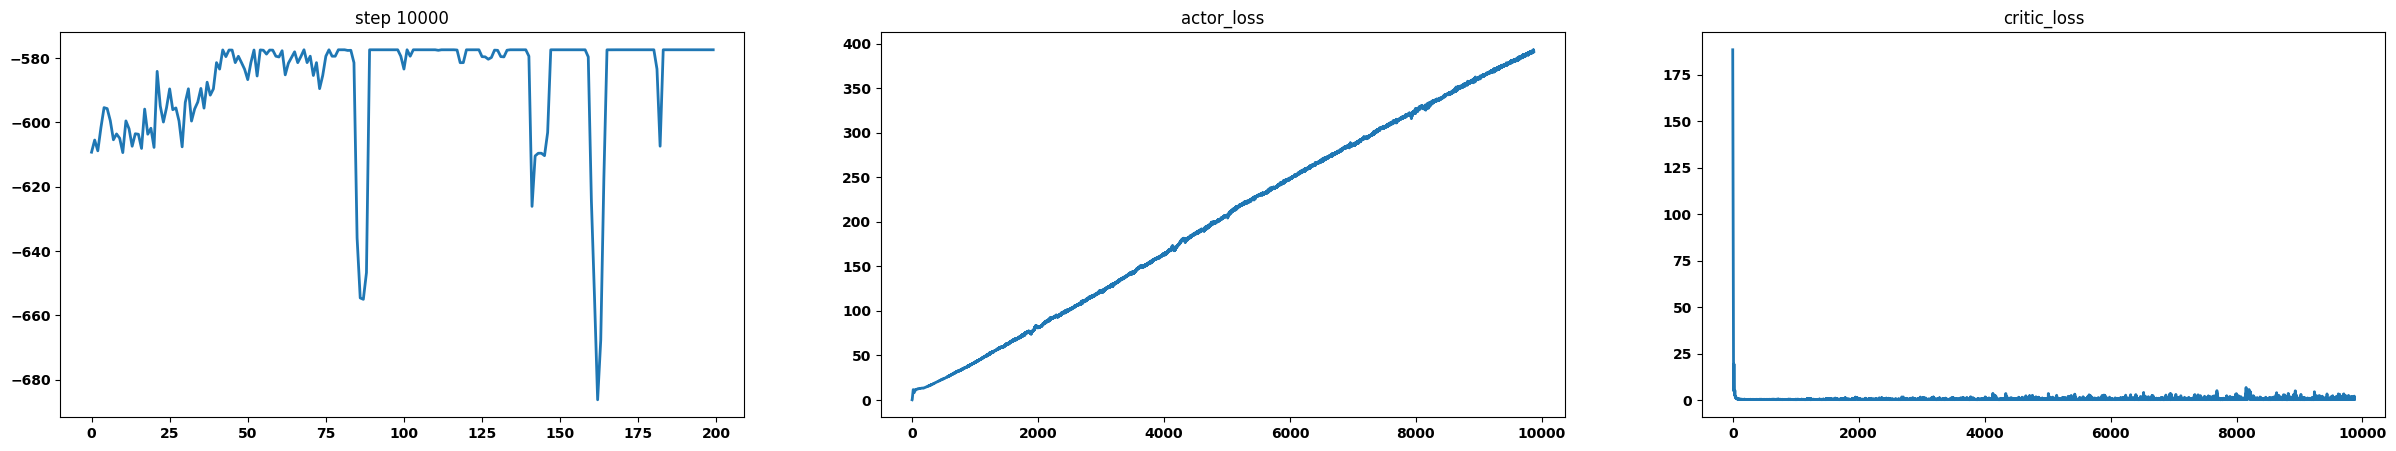

In [ ]:
# parameters
num_steps = 10000 # change this to 10000 for your own experiments
memory_size = 100000
batch_size = 128
noise_sigma = 2 # noise volume
noise_sigma_min = 0.01
noise_sigma_decay = 0.9995 # if 1 means no decay
initial_random_steps = 0
noise_type = 'truncnorm'

agent = DDPGAgent(
    env,
    CktGraph(),
    memory_size,
    batch_size,
    noise_sigma,
    noise_sigma_min,
    noise_sigma_decay,
    initial_random_steps=initial_random_steps,
    noise_type=noise_type,
)

agent.train(num_steps)

# """ Replay the best results """
# memory = agent.memory
# rews_buf = memory.rews_buf[:num_steps]
# best_design = np.argmax(rews_buf)
# best_action = memory.acts_buf[best_design]
# best_reward = np.max(rews_buf)
# agent.env.step(best_action) # run the simulations

### Pickle and view results

In [ ]:
import pickle
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')

""" Replay the best results """
memory = agent.memory
rews_buf = memory.rews_buf[:num_steps]
best_design = np.argmax(rews_buf)
best_action = memory.acts_buf[best_design]
best_reward = np.max(rews_buf)
agent.env.step(best_action) # run the simulations

ckt_hierarchy = CktGraph().ckt_hierarchy
results = OutputParser(CktGraph())
op_results = results.dcop('ldo_folded_cascode_tb_op')

# save agent's actor and critic network, and save reward buffer
save = True
if save == True:
    model_weight_actor = agent.actor.state_dict()
    save_name_actor = f"Actor_{CktGraph().__class__.__name__}_{date}_reward={best_reward:.2f}.pth"
    print("save name actor is")
    print(f"Actor_{CktGraph().__class__.__name__}_{date}_reward={best_reward:.2f}.pth")

    model_weight_critic = agent.critic.state_dict()
    save_name_critic = f"Critic_{CktGraph().__class__.__name__}_{date}_reward={best_reward:2f}.pth"
    print("model weight critic is")
    print(f"Critic_{CktGraph().__class__.__name__}_{date}_reward={best_reward:2f}.pth")

    torch.save(model_weight_actor, f'/content/ldo/saved_weights/{save_name_actor}')
    torch.save(model_weight_critic, f'/content/ldo/saved_weights/{save_name_critic}')
    print("Actor and Critic weights have been saved!")

    # save rews_buf
    # np.save(f'/content/ldo/saved_memories/rews_buf_{CktGraph().__class__.__name__}_{date}_reward={best_reward:.2f}', rews_buf)

    # print(f'/content/ldo/saved_memories/rews_buf_{CktGraph().__class__.__name__}_{date}_reward={best_reward:.2f}', rews_buf)

    np.save(f'/content/ldo/saved_memories/rews_buf_{CktGraph().__class__.__name__}', rews_buf)

    print(f'/content/ldo/saved_memories/rews_buf_{CktGraph().__class__.__name__}')
    print("reward buffers have been saved!")


action: [8.034339666366576e-06 1.0834787797927857e-06 9.958475947380066e-06
 2.416648197174072e-06 6.505783438682556e-06 7.431175756454469e-07
 4.067172348499298e-06 1.4514520096778871e-06 2.0407145142555235e-05
 1.668368036746979e-06 0.0010677851140499116 7.244324839115144e-07
 100.6479948759079 0.2342073917388916 0.8277079463005066 6.31572037935257
 17.006616681814194 277.19717502593994]
*** Simulations for Loop Stability, load regulation, DC and PSRR ***
*** Simulations Done! ***
self vdrop score is 
-4.987531604814104
Vdrop target is 600.0
| param                                 |     num | target   |
|---------------------------------------+---------+----------|
| Drop-out voltage (mV)                 |  600.39 | 600.0    |
| Load regulation (mV)                  |    1.13 | 24.0     |
| PSRR worst maxload (dB) < 10kHz       |    4.82 | -30.0    |
| PSRR worst maxload (dB) < 1MHz        |    4.82 | -20.0    |
| PSRR worst maxload (dB) > 1MHz        |   -0.00 | -5.0     |
| PSRR wo

In [ ]:
# memory = agent.memory
# rews_buf = memory.rews_buf[:num_steps]
# best_design = np.argmax(rews_buf)
# best_action = memory.acts_buf[best_design]
# best_reward = np.max(rews_buf)
# agent.env.step(best_action) # run the simulations

# ckt_hierarchy = CktGraph().ckt_hierarchy
# results = OutputParser(CktGraph())
# op_results = results.dcop('ldo_tb_op')
# print(f'/content/ldo/saved_memories/rews_buf_{CktGraph().__class__.__name__}')

In [ ]:
np.set_printoptions(threshold=np.inf)
print(best_design)
print(rews_buf)
print(rews_buf[29])
print(best_action)

2514
[-11.547782  -13.547847  -13.547783  -13.5478525 -11.547785  -13.547783
 -11.547772  -13.547834  -11.547789  -13.54783   -11.547768  -11.547758
 -13.547803  -11.547776  -11.547762  -11.547778  -13.547815  -13.547808
 -11.547776  -11.547783  -11.547762  -11.547773  -11.54777   -11.547777
 -13.547841  -11.5477705 -11.54778   -13.547847  -13.547839  -11.547782
 -11.547774  -11.547779  -11.566424  -13.704473  -11.547767  -11.5477705
 -11.64317   -11.547786  -11.739167  -11.547787  -13.547846  -12.835374
 -11.547757  -13.547854  -11.65933   -11.5477495 -11.547789  -11.5536785
 -11.547779  -11.547747  -11.547778  -11.547768  -13.54777   -13.547834
 -13.547778  -13.5478525 -13.547784  -11.547777  -11.547767  -11.547782
 -11.5477705 -11.547789  -11.547785  -11.547768  -11.547772  -11.547778
 -13.547837  -11.547781  -11.547773  -13.547794  -11.547758  -11.547846
 -11.547774  -11.547784  -13.547831  -11.547766  -11.547774  -11.547782
 -11.547778  -11.599118  -13.547791  -13.547842  -11.5847

### Plot reward buffer

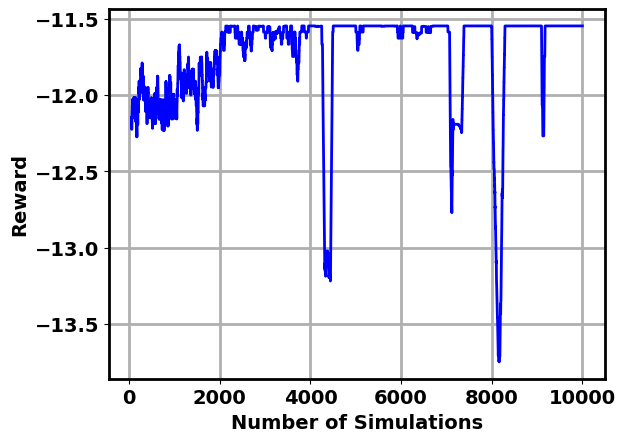

In [ ]:
""" Load reward buffer to plot reward vs simulations """
num_steps = 10000

with open('/content/ldo/saved_memories/rews_buf_GraphLDOFoldedCascode.npy', 'rb') as memory_file:
    rews_buf = np.load(memory_file)

rews_buf = rews_buf[:num_steps]

""" Result visualizations and save these as pictures """
# plot average reward
window = 50
avg_rewards=[]
for k in range(len(rews_buf)):
    if k >= window:
        avg_reward = np.mean(rews_buf[k-window:k])
    else:
        avg_reward = np.inf
    avg_rewards.append(avg_reward)

plt.figure('Reward')
plt.plot(avg_rewards, 'b')
plt.xlabel('Number of Simulations', fontweight='bold', fontsize=14)
plt.xticks(fontsize=14, weight='bold')
plt.ylabel('Reward', fontweight='bold', fontsize=14)
plt.yticks(fontsize=14, fontweight='bold')
plt.grid(linewidth=2)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)